In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [3]:
run = 11075
asic = 0
path      = "/home/vherrero/CALIBRATION_FILES/"
path_data = "/analysis/" + str(run) + "/hdf5/data/"
#path_data = "/home/vherrero/CALIBRATION_FILES/"

# DATA SELECTION

In [4]:
#filename = path_data + "calibration_tpulse_nocompressor_210713.h5"
filename = "/home/jmbenlloch/calibration/run2/tdc_asic0_run11285.h5"
channel = 63
tac     = 3
tpulse  = 359500
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
#coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# Two distributions
#print(np.std(data_fit['tfine'].to_numpy()))
if  np.std(data_fit['tfine'].to_numpy())> 10 :
    
    # Fit Left   
    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis)
    
    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis2)
    
    
else:
    # Usual case
    print('3')
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
    coeff_l = coeff_d = coeff
    coeff_err_l = coeff_err_d =coeff_err
    moda_d = moda_l = moda
    sigma_d = sigma_l = sigma
    chi_d = chi_l = chi
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        print('4')
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
        coeff_l = coeff_d = coeff
        coeff_err_l = coeff_err_d =coeff_err
        moda_d = moda_l = moda
        sigma_d = sigma_l = sigma
        chi_d = chi_l = chi
                    
print(i,ch,tc,moda_l,sigma_l,chi_l)
print(i,ch,tc,moda_d,sigma_d,chi_d)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [5]:
fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

<IPython.core.display.Javascript object>

TypeError: `bins` must be an integer, a string, or an array

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [6]:
#filename = path_data + "calibration_tpulse_nocompressor_210713.h5"  #ASIC + "_tdc_tpulse.h5"
filename = "/home/jmbenlloch/calibration/run2/tdc_asic0_run11285.h5"

channels = range(0,64)
tacs = range(0,4)
        
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:

                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                values,bins = np.histogram(data_fit['tfine'],rango_fit)
                peak = bins[np.argmax(values)]
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 10 :
                
                        # Fit Left   
                    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_l,sigma_l,chi_l = [np.min(data_fit_sel['tfine']),1,0]
                    else:    
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_d,sigma_d,chi_d = [np.min(data_fit_sel['tfine']),1,0]
                    else:
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    # First mu and sigma are the most probable
                    if peak > (rango_fit/2.0 + np.min(data_fit['tfine'])):
                        a,b,c,d,e = coeff_l,coeff_err_l,moda_l,sigma_l,chi_l
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = coeff_d,coeff_err_d,moda_d,sigma_d,chi_d
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = a,b,c,d,e
                        
                
                else:
                    # Usual case
                    print('3')
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False) 
                    coeff_l = coeff_d = coeff
                    coeff_err_l = coeff_err_d =coeff_err
                    moda_d = moda_l = moda
                    sigma_d = sigma_l = sigma
                    chi_d = chi_l = chi
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        print('4')
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                        coeff_l = coeff_d = coeff
                        coeff_err_l = coeff_err_d = coeff_err
                        moda_d = moda_l = moda
                        sigma_d = sigma_l = sigma
                        chi_d = chi_l = chi
                        
                print(i,ch,tc,moda_l,sigma_l,chi_l,moda_d,sigma_d,chi_d)               
                res.append([ch,tc,i,moda_l,np.abs(sigma_l),moda_d,np.abs(sigma_d)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma','mu2','sigma2'])
        

3
0 0 0 293.94999999983565 1.7902871323717804 0.0027755486271883742 293.94999999983565 1.7902871323717804 0.0027755486271883742
3
10 0 0 290.71099999981766 1.986124078857828 0.0018241607995863347 290.71099999981766 1.986124078857828 0.0018241607995863347
3
20 0 0 287.231999999829 1.7702292193220692 0.006333419097118629 287.231999999829 1.7702292193220692 0.006333419097118629
3
30 0 0 282.3199999998269 1.8253922677290901 0.020574648009189535 282.3199999998269 1.8253922677290901 0.020574648009189535
3
40 0 0 275.51599999982227 1.9538009070889166 0.005608480551232076 275.51599999982227 1.9538009070889166 0.005608480551232076
3
50 0 0 271.96099999981175 1.8800085702234284 0.0044761065222832215 271.96099999981175 1.8800085702234284 0.0044761065222832215
3
60 0 0 268.0179999998104 1.7947967015029305 0.0021924304325866197 268.0179999998104 1.7947967015029305 0.0021924304325866197
3
70 0 0 260.9700000000333 2.038780946579919 0.0034327199802751496 260.9700000000333 2.038780946579919 0.003432719

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 0 0 213.62600000003164 1.7498331634405897 nan 213.62600000003164 1.7498331634405897 nan
180 0 0 210.3170000000254 1.7102867611890484 0.003204971781334993 377.9999999999054 1.062234320561533 0.026819478788307906
190 0 0 207.9740000000142 1.1726695883881986 0.02080221688213743 377.6709999998659 1.6543414865944508 0.06835465873192918
3
200 0 0 369.3609999998496 1.8577238480539704 0.002932529255426734 369.3609999998496 1.8577238480539704 0.002932529255426734
3
210 0 0 365.80599999983906 1.8905710905635889 0.0023071078052925137 365.80599999983906 1.8905710905635889 0.0023071078052925137
3
220 0 0 362.5989999998203 1.7450347678685159 0.004541918667108621 362.5989999998203 1.7450347678685159 0.004541918667108621
3
230 0 0 355.15299999983085 1.9005763993673843 0.004419141486638304 355.15299999983085 1.9005763993673843 0.004419141486638304
3
240 0 0 351.12799999983145 1.9490774284004169 0.002202371194211542 351.12799999983145 1.9490774284004169 0.002202371194211542
3
250 0 0 347.30699999980

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
50 0 1 258.7700000000323 1.829316099822079 0.008165049706366488 258.7700000000323 1.829316099822079 0.008165049706366488
3
60 0 1 254.2860000000348 1.8552066408819181 0.0029648467244545226 254.2860000000348 1.8552066408819181 0.0029648467244545226
3
70 0 1 248.06900000003375 1.8652269769595111 0.002043321811117848 248.06900000003375 1.8652269769595111 0.002043321811117848
3
80 0 1 243.73600000003694 2.003010462909796 0.0036612482443900136 243.73600000003694 2.003010462909796 0.0036612482443900136
3
90 0 1 241.02800000003356 1.9609112180879273 0.0023672213407678585 241.02800000003356 1.9609112180879273 0.0023672213407678585
3
100 0 1 233.21200000003444 1.5223234893788302 0.008841277701419301 233.21200000003444 1.5223234893788302 0.008841277701419301
3
110 0 1 229.6570000000318 1.8622317328350573 0.002254959496282243 229.6570000000318 1.8622317328350573 0.002254959496282243
3
120 0 1 226.51600000004066 1.8450820766775347 0.0032315678864329733 226.51600000004066 1.8450820766775347 0.003

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 0 1 197.88100000002808 1.4616947094690198 0.009406356751590622 363.8639999999323 1.091287073415939 121.24682556951417
190 0 1 196.2670000000156 1.312810159946991 0.0074745989065155595 364.934999999836 1.848561770602341 0.02632538718112841
3
200 0 1 357.5409999998217 1.797680814983613 0.008912414238094449 357.5409999998217 1.797680814983613 0.008912414238094449
3
210 0 1 352.5439999998216 1.7496782813438747 0.010706641831392942 352.5439999998216 1.7496782813438747 0.010706641831392942
3
220 0 1 349.780999999816 1.9078392284523347 0.001540716668657158 349.780999999816 1.9078392284523347 0.001540716668657158
3
230 0 1 342.2219999998056 1.6909096728380988 0.018627743367728006 342.2219999998056 1.6909096728380988 0.018627743367728006
3
240 0 1 338.4489999998475 1.8110555838460627 0.13130545796658372 338.4489999998475 1.8110555838460627 0.13130545796658372
3
250 0 1 335.27699999985157 1.8658827618528495 0.0033952333734879533 335.27699999985157 1.8658827618528495 0.003395

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
60 0 2 253.216000000044 1.78269409712028 0.006267877144908905 253.216000000044 1.78269409712028 0.006267877144908905
3
70 0 2 246.7060000000368 1.9538761692064925 0.0042378692533185745 246.7060000000368 1.9538761692064925 0.0042378692533185745
3
80 0 2 242.09500000003388 1.9857542189537412 0.003762258423854578 242.09500000003388 1.9857542189537412 0.003762258423854578
3
90 0 2 238.02400000003354 1.770431344604491 0.014941967342183582 238.02400000003354 1.770431344604491 0.014941967342183582
3
100 0 2 230.77600000003235 1.7888391865546678 0.003023066374436318 230.77600000003235 1.7888391865546678 0.003023066374436318
3
110 0 2 227.55000000003605 1.7825645005240982 0.0030370195912396473 227.55000000003605 1.7825645005240982 0.0030370195912396473
3
120 0 2 223.60700000003155 1.7987955450171889 0.007234820069446938 223.60700000003155 1.7987955450171889 0.007234820069446938
3
130 0 2 220.78500000004195 1.8181603549858203 0.0021025955951727514 220.78500000004195 1.8181603549858203 0.002102

3
0 1 0 280.0709999998328 1.8367766721845329 0.0005953996524174214 280.0709999998328 1.8367766721845329 0.0005953996524174214
3
10 1 0 276.6079999998201 1.6776692309305186 0.0008069565983279017 276.6079999998201 1.6776692309305186 0.0008069565983279017
3
20 1 0 273.22499999982915 1.8727740177384657 0.0005043130861254442 273.22499999982915 1.8727740177384657 0.0005043130861254442
3
30 1 0 269.12299999983156 1.780685328760825 0.0003254717117704481 269.12299999983156 1.780685328760825 0.0003254717117704481
3
40 1 0 262.76900000003707 1.788224767684763 0.0008535842521630041 262.76900000003707 1.788224767684763 0.0008535842521630041
3
50 1 0 259.2170000000392 1.779696317748442 0.0005356519760704096 259.2170000000392 1.779696317748442 0.0005356519760704096
3
60 1 0 256.3220000000302 1.7466984319295185 0.00034882604871614976 256.3220000000302 1.7466984319295185 0.00034882604871614976
3
70 1 0 249.13200000003883 1.8691615366548378 0.0003809380955657202 249.13200000003883 1.8691615366548378 0.0

3
0 1 2 264.0839999998325 1.8337473069687569 0.0006385205469677701 264.0839999998325 1.8337473069687569 0.0006385205469677701
3
10 1 2 260.88300000003767 1.7336799751312157 0.0009366747121352825 260.88300000003767 1.7336799751312157 0.0009366747121352825
3
20 1 2 256.6390000000365 1.7685489323487908 0.0003811054688075781 256.6390000000365 1.7685489323487908 0.0003811054688075781
3
30 1 2 253.1830000000343 1.823576964281892 0.0004450556661325873 253.1830000000343 1.823576964281892 0.0004450556661325873
3
40 1 2 247.00900000003347 1.7304733706373974 0.00048395213748634463 247.00900000003347 1.7304733706373974 0.00048395213748634463
3
50 1 2 242.26500000002991 1.7461891121112325 0.0009159595677028774 242.26500000002991 1.7461891121112325 0.0009159595677028774
3
60 1 2 239.88300000003287 1.8531188352732177 0.0006340722294904577 239.88300000003287 1.8531188352732177 0.0006340722294904577
3
70 1 2 232.8350000000374 1.836944120662083 0.00046900445607028025 232.8350000000374 1.836944120662083 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


180 1 2 185.74800000002267 1.5215175142213957 0.0008491562922445399 342.0329999999283 1.0620492439937002 inf
190 1 2 184.07400000001945 1.2005313864381588 0.0024694903006077244 341.69799999986526 1.3480371935200373 0.004217739383666061
3
200 1 2 334.80799999981537 1.76513650569422 0.0006642028034480884 334.80799999981537 1.76513650569422 0.0006642028034480884
3
210 1 2 330.906999999813 1.727498831609541 0.0010932959437222145 330.906999999813 1.727498831609541 0.0010932959437222145
3
220 1 2 327.6609999998425 1.8516890067009497 0.0006349461798948739 327.6609999998425 1.8516890067009497 0.0006349461798948739
3
230 1 2 320.54899999984514 1.660681922139878 0.0018107740445283424 320.54899999984514 1.660681922139878 0.0018107740445283424
3
240 1 2 316.9519999998356 1.72065343228506 0.00032680829056165817 316.9519999998356 1.72065343228506 0.00032680829056165817
3
250 1 2 314.4659999998471 1.6689064727064924 0.0010726428501882334 314.4659999998471 1.6689064727064924 0.0010726428501882334
3
26

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240 1 3 318.13899999985483 1.7715774535071898 0.0010054297062157104 318.13899999985483 1.7715774535071898 0.0010054297062157104
3
250 1 3 314.9709999998588 1.6390062575267637 0.0006366809327092963 314.9709999998588 1.6390062575267637 0.0006366809327092963
3
Fit failure
4
260 1 3 312.0841962044439 1.4363864398752157 0.002340114200740343 312.0841962044439 1.4363864398752157 0.002340114200740343
3
270 1 3 306.3659999998258 1.6739275880287425 0.0003287021388536759 306.3659999998258 1.6739275880287425 0.0003287021388536759
3
280 1 3 302.8749999998138 1.7887269286221805 0.0006253170710369227 302.8749999998138 1.7887269286221805 0.0006253170710369227
3
290 1 3 298.91599999983646 1.858872575366164 0.000446165582562733 298.91599999983646 1.858872575366164 0.000446165582562733
3
300 1 3 292.1769999998303 1.7995274436778368 0.0001846853177056078 292.1769999998303 1.7995274436778368 0.0001846853177056078
3
310 1 3 288.8399999998146 1.8575368502279603 0.0005935615800426897 288.8399999998146 1.85753

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


210 2 1 334.88699999983714 1.8151617933129092 0.0007075299078300205 334.88699999983714 1.8151617933129092 0.0007075299078300205
3
220 2 1 331.65799999984256 1.802563147045566 0.0011256865005714238 331.65799999984256 1.802563147045566 0.0011256865005714238
3
230 2 1 324.69999999984157 1.837159095073632 0.0008562357190100948 324.69999999984157 1.837159095073632 0.0008562357190100948
3
240 2 1 320.9529999998356 1.7071565502269934 0.0007510690161669644 320.9529999998356 1.7071565502269934 0.0007510690161669644
3
250 2 1 317.0399999998335 1.646809649083643 0.0009067760071343962 317.0399999998335 1.646809649083643 0.0009067760071343962
3
260 2 1 314.1179999993824 1.6954580692608037 1.2130599942899976e+26 314.1179999993824 1.6954580692608037 1.2130599942899976e+26
3
270 2 1 307.50899999982244 1.7772785164987446 0.00036531736587135143 307.50899999982244 1.7772785164987446 0.00036531736587135143
3
280 2 1 304.5519999998214 1.7604021586155965 0.0006291088860945804 304.5519999998214 1.76040215861

3
170 2 3 189.3920000000353 1.776254532906116 0.0003645337037893333 189.3920000000353 1.776254532906116 0.0003645337037893333
Fitting Problems
180 2 3 186.21200000002966 1.5868734514523513 0.00011519099812161769 344.45499999994195 0.7770368891617236 344.62067305710013
190 2 3 184.13900000001976 1.203316415720143 0.0008813031936130383 344.9659999998589 1.4441513641683708 0.0011282550109029032
3
200 2 3 338.34099999985006 1.6937227378331168 0.0006760881601955122 338.34099999985006 1.6937227378331168 0.0006760881601955122
3
210 2 3 334.84499999983814 1.811800627905292 0.0018347545925594929 334.84499999983814 1.811800627905292 0.0018347545925594929
3
220 2 3 331.7879999998395 1.8004396049791644 0.0007224390573070187 331.7879999998395 1.8004396049791644 0.0007224390573070187
3
230 2 3 324.7669999997927 1.789615468421319 0.0007648903523071903 324.7669999997927 1.789615468421319 0.0007648903523071903
3
240 2 3 320.6349999998431 1.713349588001067 0.0009245673568184785 320.6349999998431 1.71334

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 3 1 276.8719999998375 1.910576209575268 0.0007427311875622229 276.8719999998375 1.910576209575268 0.0007427311875622229
3
10 3 1 273.1359999998076 1.8560048761623735 0.0007071122235070882 273.1359999998076 1.8560048761623735 0.0007071122235070882
3
20 3 1 268.95799999983547 1.7966407544010121 0.0007227774329253574 268.95799999983547 1.7966407544010121 0.0007227774329253574
3
30 3 1 265.722999999841 1.8347529279470969 0.0005119739600395985 265.722999999841 1.8347529279470969 0.0005119739600395985
3
40 3 1 258.64100000003646 1.8518566462471369 0.0019456662304584683 258.64100000003646 1.8518566462471369 0.0019456662304584683
3
50 3 1 254.94200000003792 1.738693180888859 0.0011129850683512018 254.94200000003792 1.738693180888859 0.0011129850683512018
3
60 3 1 251.61400000003158 1.96450456340591 0.0007391407312408439 251.61400000003158 1.96450456340591 0.0007391407312408439
3
70 3 1 243.90000000003772 1.985517920224172 0.0008040231030816199 243.90000000003772 1.985517920224172 0.0008040

360 3 2 276.9569999998355 1.8600329199872208 0.0006922840947393888 276.9569999998355 1.8600329199872208 0.0006922840947393888
3
0 3 3 276.8469999998381 1.869232367302068 0.0006868666864925396 276.8469999998381 1.869232367302068 0.0006868666864925396
3
10 3 3 272.257999999852 1.8628357644787341 0.0007650489289270505 272.257999999852 1.8628357644787341 0.0007650489289270505
3
20 3 3 269.03399999983367 1.7718253162279567 0.00031642904045763357 269.03399999983367 1.7718253162279567 0.00031642904045763357
3
30 3 3 265.20899999982953 1.7492397505436201 0.0015104465319592966 265.20899999982953 1.7492397505436201 0.0015104465319592966
3
40 3 3 258.2890000000348 1.8533702860593957 0.0005066503971702976 258.2890000000348 1.8533702860593957 0.0005066503971702976
3
50 3 3 254.71100000003682 1.7875399402212544 0.0006166170710515306 254.71100000003682 1.7875399402212544 0.0006166170710515306
3
60 3 3 251.04800000003843 1.918607683737247 0.0007540459974549272 251.04800000003843 1.918607683737247 0.00

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


270 3 3 317.86199999983774 1.6984995886736454 0.000617104263714541 317.86199999983774 1.6984995886736454 0.000617104263714541
3
280 3 3 314.77899999981605 1.7735038096078322 0.0006350882873320345 314.77899999981605 1.7735038096078322 0.0006350882873320345
3
290 3 3 310.99699999983454 1.827410265896905 0.00032971097455264885 310.99699999983454 1.827410265896905 0.00032971097455264885
3
300 3 3 304.38499999982537 1.9087129906860583 0.00027004539408825216 304.38499999982537 1.9087129906860583 0.00027004539408825216
3
310 3 3 300.9439999998358 1.888695236494643 0.001740451518105245 300.9439999998358 1.888695236494643 0.001740451518105245
3
320 3 3 298.0379999998099 2.035666840185743 0.0005438179764022418 298.0379999998099 2.035666840185743 0.0005438179764022418
3
330 3 3 290.17899999983024 1.8337017137318643 0.0004341923264279137 290.17899999983024 1.8337017137318643 0.0004341923264279137
3
340 3 3 286.11599999983173 1.7792974877112715 0.0006805256054146745 286.11599999983173 1.77929748771

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
220 4 0 348.2059999998296 1.7022988229469618 0.0015641201566064915 348.2059999998296 1.7022988229469618 0.0015641201566064915
3
230 4 0 341.3209999998269 1.8204020838575417 0.0007083309576730694 341.3209999998269 1.8204020838575417 0.0007083309576730694
3
240 4 0 337.3359999998265 1.8270661165190345 0.0010701535726444415 337.3359999998265 1.8270661165190345 0.0010701535726444415
3
250 4 0 333.8289999998385 1.6279086764731796 0.0011147750463440056 333.8289999998385 1.6279086764731796 0.0011147750463440056
3
260 4 0 330.41299999984835 1.6361065070870326 0.000656885398315886 330.41299999984835 1.6361065070870326 0.000656885398315886
3
270 4 0 324.6359999998431 1.679489999978824 0.0014058808595800519 324.6359999998431 1.679489999978824 0.0014058808595800519
3
280 4 0 321.7159999998412 1.815015020682965 0.001231319290778466 321.7159999998412 1.815015020682965 0.001231319290778466
3
290 4 0 318.1549999998308 1.7147767723876712 0.0008785623879148448 318.1549999998308 1.7147767723876712 0.00

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 4 1 188.1950000000248 1.4384882346634844 0.0012581694974530262 345.92799999993076 1.522951745360891 0.0006974724914352761
3
200 4 1 342.0930000007644 1.7155876238364471 nan 342.0930000007644 1.7155876238364471 nan
3
210 4 1 337.8969999998369 1.7342538190097134 0.001410873362922223 337.8969999998369 1.7342538190097134 0.001410873362922223
3
220 4 1 334.3969999998251 1.7209700579584017 0.0037583450950283235 334.3969999998251 1.7209700579584017 0.0037583450950283235
3
230 4 1 328.34999999984984 1.6893446684472129 0.0017832303818114846 328.34999999984984 1.6893446684472129 0.0017832303818114846
3
240 4 1 323.93899999985956 1.702898580018387 0.0018088729030616925 323.93899999985956 1.702898580018387 0.0018088729030616925
3
250 4 1 321.00499999983435 1.793471445937786 0.0010540266157064496 321.00499999983435 1.793471445937786 0.0010540266157064496
3
260 4 1 317.86099999983776 1.5794222936605935 0.001066714597316541 317.86099999983776 1.5794222936605935 0.001066714597316541
3
270 4 1 311.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


4 2 316.0149999998341 1.6442691161812815 0.0007687642968504467 316.0149999998341 1.6442691161812815 0.0007687642968504467
3
270 4 2 310.45499999984736 1.7300390509540349 0.0008760991110886841 310.45499999984736 1.7300390509540349 0.0008760991110886841
3
280 4 2 307.485999999823 1.7060630811687532 0.0007768861726411808 307.485999999823 1.7060630811687532 0.0007768861726411808
3
290 4 2 303.56599999984473 1.6430446165528836 0.0017008501144666524 303.56599999984473 1.6430446165528836 0.0017008501144666524
3
300 4 2 297.3939999998015 1.916894258454341 0.0013289413087633818 297.3939999998015 1.916894258454341 0.0013289413087633818
3
310 4 2 293.43999999982407 1.9837468988270532 0.0005485606704420167 293.43999999982407 1.9837468988270532 0.0005485606704420167
3
320 4 2 289.0779999998563 1.6867144366598021 0.0010419076779246564 289.0779999998563 1.6867144366598021 0.0010419076779246564
3
330 4 2 283.30899999982717 1.7168921150020369 0.0011454568516493593 283.30899999982717 1.7168921150020369 

3
170 5 0 215.34300000003984 1.9151944433893366 0.000994301499795385 215.34300000003984 1.9151944433893366 0.000994301499795385
Fitting Problems
180 5 0 212.24300000002503 1.6361626784022945 0.0010495235092650914 374.9709999999534 1.051297004481138 362.6578058814287
190 5 0 209.66900000001752 1.2909353926993428 0.001644770191632994 375.75899999984017 1.3484751814058369 0.03221091760613144
3
200 5 0 367.52899999982196 1.7235492507035948 0.00046953391424246066 367.52899999982196 1.7235492507035948 0.00046953391424246066
3
210 5 0 364.9519999998356 1.85796846449193 0.0004438496795214515 364.9519999998356 1.85796846449193 0.0004438496795214515
3
220 5 0 361.28399999982776 1.8520227589749394 0.000927002865454905 361.28399999982776 1.8520227589749394 0.000927002865454905
3
230 5 0 353.7779999998397 1.762933453308657 0.0011230896361951205 353.7779999998397 1.762933453308657 0.0011230896361951205
3
240 5 0 350.88599999983717 1.9012309236065563 0.0007289968080447328 350.88599999983717 1.9012309

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
220 5 1 347.2979999998511 1.7417378571207467 0.0006049105657845895 347.2979999998511 1.7417378571207467 0.0006049105657845895
3
230 5 1 339.77599999983977 1.8286595172978333 0.000386611515699177 339.77599999983977 1.8286595172978333 0.000386611515699177
3
240 5 1 337.1289999998314 1.7457539103958015 0.0011805472290029987 337.1289999998314 1.7457539103958015 0.0011805472290029987
3
250 5 1 332.9269999998362 1.59889609902717 0.00216045743053456 332.9269999998362 1.59889609902717 0.00216045743053456
3
260 5 1 330.1439999998547 1.785782059257093 0.0008218527638823807 330.1439999998547 1.785782059257093 0.0008218527638823807
3
270 5 1 323.56599999984473 1.7701437943085079 0.00042297184152718606 323.56599999984473 1.7701437943085079 0.00042297184152718606
3
280 5 1 320.11399999980813 1.9311291868726521 0.0009257268192651153 320.11399999980813 1.9311291868726521 0.0009257268192651153
3
290 5 1 316.8779999998137 1.7832050590978137 0.0010612163823966957 316.8779999998137 1.7832050590978137 0.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


290 5 2 315.7439999998405 1.8937334463142588 0.0006962456162052034 315.7439999998405 1.8937334463142588 0.0006962456162052034
3
300 5 2 308.61499999981993 2.0471712164815714 0.000925492368153397 308.61499999981993 2.0471712164815714 0.000925492368153397
3
310 5 2 305.68799999979456 2.058075762967648 0.0007100125363057665 305.68799999979456 2.058075762967648 0.0007100125363057665
3
320 5 2 302.37799999982553 1.902074806796495 0.00040570843205615676 302.37799999982553 1.902074806796495 0.00040570843205615676
3
330 5 2 294.17399999983036 1.8420291962579116 0.0006777709202141077 294.17399999983036 1.8420291962579116 0.0006777709202141077
3
340 5 2 291.01199999981054 1.880854520905122 0.0006561368128771342 291.01199999981054 1.880854520905122 0.0006561368128771342
3
350 5 2 287.3199999998269 1.869614218627405 0.00039969719042546063 287.3199999998269 1.869614218627405 0.00039969719042546063
3
360 5 2 280.6249999998197 1.8961036674370784 0.00037909739938042576 280.6249999998197 1.896103667437

3
300 6 0 307.2029999998533 1.8132667080201061 0.00042797758047963865 307.2029999998533 1.8132667080201061 0.00042797758047963865
3
310 6 0 303.3959999997778 1.9724599547027593 0.0005035692069035861 303.3959999997778 1.9724599547027593 0.0005035692069035861
3
320 6 0 299.76899999983993 1.9876272844880725 0.0006841741582186823 299.76899999983993 1.9876272844880725 0.0006841741582186823
3
330 6 0 293.3949999998015 1.930862787073605 0.0008389847484839784 293.3949999998015 1.930862787073605 0.0008389847484839784
3
340 6 0 289.94599999983575 1.867324515254652 0.00027886097907075196 289.94599999983575 1.867324515254652 0.00027886097907075196
3
350 6 0 286.11199999985547 1.8092483041219303 0.00033985574264941074 286.11199999985547 1.8092483041219303 0.00033985574264941074
3
360 6 0 278.4539999998474 1.863718284725315 0.0008004824893435793 278.4539999998474 1.863718284725315 0.0008004824893435793
3
0 6 1 270.6519999997954 1.7280589138563476 0.0005426747726524897 270.6519999997954 1.72805891385

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
210 6 1 338.7289999997936 1.7721610613033312 0.0005934616854865268 338.7289999997936 1.7721610613033312 0.0005934616854865268
3
220 6 1 335.485999999823 1.8422801415358538 0.0013623248542580448 335.485999999823 1.8422801415358538 0.0013623248542580448
3
230 6 1 328.1209999998316 1.7443043264996207 0.0003643143223970525 328.1209999998316 1.7443043264996207 0.0003643143223970525
3
240 6 1 325.4599999998236 1.773792570050537 0.00023867821808469322 325.4599999998236 1.773792570050537 0.00023867821808469322
3
250 6 1 321.34999999984984 1.6011770665072798 0.0009291670262623269 321.34999999984984 1.6011770665072798 0.0009291670262623269
3
260 6 1 318.93999999985954 1.745034159742548 0.0007357991328329807 318.93999999985954 1.745034159742548 0.0007357991328329807
3
270 6 1 312.23899999985247 1.6418220301231505 0.0006271365220920621 312.23899999985247 1.6418220301231505 0.0006271365220920621
3
280 6 1 308.85099999981435 1.8571627921849625 0.0005216062680950045 308.85099999981435 1.85716279218

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


300 6 2 299.19799999985344 1.859872383495264 0.0006537649273669543 299.19799999985344 1.859872383495264 0.0006537649273669543
3
310 6 2 294.6989999998416 1.9563830833052545 0.0009830493790286944 294.6989999998416 1.9563830833052545 0.0009830493790286944
3
320 6 2 290.9749999998114 1.9095067385657722 0.0001646804762877624 290.9749999998114 1.9095067385657722 0.0001646804762877624
3
330 6 2 285.49799999979905 1.9026040394894719 0.0003763842613701674 285.49799999979905 1.9026040394894719 0.0003763842613701674
3
340 6 2 281.8829999998609 1.802004557063945 0.0013188271463799343 281.8829999998609 1.802004557063945 0.0013188271463799343
3
350 6 2 277.8749999998374 1.8978719891391103 0.0007496905337054613 277.8749999998374 1.8978719891391103 0.0007496905337054613
3
360 6 2 270.70999999984133 1.773070432411263 0.0007917117364755105 270.70999999984133 1.773070432411263 0.0007917117364755105
3
0 6 3 268.25999999985197 1.798291602346856 0.0006486127237563897 268.25999999985197 1.798291602346856 0.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
240 6 3 322.35899999984963 1.7729871682080167 0.0002073980636574213 322.35899999984963 1.7729871682080167 0.0002073980636574213
3
250 6 3 319.32799999985036 1.726476198441749 0.0003753430949658816 319.32799999985036 1.726476198441749 0.0003753430949658816
3
260 6 3 315.87399999983745 1.6467600155931066 0.0009932308584348773 315.87399999983745 1.6467600155931066 0.0009932308584348773
3
270 6 3 310.3649999998022 1.6977512247136584 0.0007931349648874011 310.3649999998022 1.6977512247136584 0.0007931349648874011
3
280 6 3 306.40599999982487 1.8005355444950524 0.00022470542147625213 306.40599999982487 1.8005355444950524 0.00022470542147625213
3
290 6 3 303.1179999998317 2.0014649160304834 0.0008418027693693019 303.1179999998317 2.0014649160304834 0.0008418027693693019
3
300 6 3 295.4679999998234 1.8055961829493272 0.0003274159142554606 295.4679999998234 1.8055961829493272 0.0003274159142554606
3
310 6 3 292.0709999998328 1.9708761956648448 0.0014105080002149168 292.0709999998328 1.9708761

3
230 7 1 317.86699999986126 1.818865027740374 0.002619005339320616 317.86699999986126 1.818865027740374 0.002619005339320616
3
240 7 1 314.1849999998301 1.7845417057124968 0.0018477638870590214 314.1849999998301 1.7845417057124968 0.0018477638870590214
3
250 7 1 310.8299999998385 1.5031264759154581 0.011781919100623133 310.8299999998385 1.5031264759154581 0.011781919100623133
3
260 7 1 307.4249999998244 1.6901726486866055 0.003156503058603469 307.4249999998244 1.6901726486866055 0.003156503058603469
3
270 7 1 301.63699999984306 1.676654097406302 0.0019102582472579077 301.63699999984306 1.676654097406302 0.0019102582472579077
3
280 7 1 298.8319999998148 1.7747764226174025 0.0020843797172407194 298.8319999998148 1.7747764226174025 0.0020843797172407194
3
290 7 1 295.44499999982395 1.63389634297047 0.003748677935504665 295.44499999982395 1.63389634297047 0.003748677935504665
3
300 7 1 288.4459999998239 2.115654066919183 0.0030288909507755904 288.4459999998239 2.115654066919183 0.00302889

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280 7 2 299.91999999983636 1.7564456435840812 0.0049230279194537 299.91999999983636 1.7564456435840812 0.0049230279194537
3
290 7 2 296.2639999998519 1.702002367241693 0.00464687775304601 296.2639999998519 1.702002367241693 0.00464687775304601
3
300 7 2 289.93099999981246 2.074607045982498 0.004253582871674059 289.93099999981246 2.074607045982498 0.004253582871674059
3
310 7 2 286.018999999834 2.0047479995593656 0.0014399381391137392 286.018999999834 2.0047479995593656 0.0014399381391137392
3
320 7 2 281.7989999998156 1.721679488311754 0.0025629448058304234 281.7989999998156 1.721679488311754 0.0025629448058304234
3
330 7 2 275.7199999998411 1.7732395633552356 0.0021801258389900335 275.7199999998411 1.7732395633552356 0.0021801258389900335
3
340 7 2 270.88099999981364 1.7373947654800668 0.004185986862629886 270.88099999981364 1.7373947654800668 0.004185986862629886
3
350 7 2 267.5289999998456 1.8916816406878239 0.0031439821265854128 267.5289999998456 1.8916816406878239 0.00314398212658

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
290 8 0 332.6759999998185 2.0050192114883507 0.00034841501622740227 332.6759999998185 2.0050192114883507 0.00034841501622740227
3
300 8 0 325.0859999998088 1.9050599882569672 0.0004937332685279852 325.0859999998088 1.9050599882569672 0.0004937332685279852
3
310 8 0 321.5219999998221 2.14852775124015 0.0007422065875824015 321.5219999998221 2.14852775124015 0.0007422065875824015
3
320 8 0 317.9259999998362 1.8564795032463604 0.000664139956942861 317.9259999998362 1.8564795032463604 0.000664139956942861
3
330 8 0 309.9939999998346 1.8949157850460585 0.0009570373201182499 309.9939999998346 1.8949157850460585 0.0009570373201182499
3
340 8 0 308.11499999978446 2.0628280746980083 0.0009162286697246463 308.11499999978446 2.0628280746980083 0.0009162286697246463
3
350 8 0 303.7349999998171 1.938149714525675 0.0006353546298416824 303.7349999998171 1.938149714525675 0.0006353546298416824
3
360 8 0 296.7489999998404 1.8600233495433776 0.0006206920749695465 296.7489999998404 1.8600233495433776 0.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 8 1 198.23800000002024 1.157671260615136 0.004183150014503355 365.01399999983414 1.6187572713832743 0.007879216754864632
3
200 8 1 357.61799999981986 1.8693343574702381 0.001452821494420013 357.61799999981986 1.8693343574702381 0.001452821494420013
3
210 8 1 353.97999999983494 1.8731627865448612 0.0003222227162516562 353.97999999983494 1.8731627865448612 0.0003222227162516562
3
220 8 1 350.160999999807 1.7725454593143966 0.0008630872078583259 350.160999999807 1.7725454593143966 0.0008630872078583259
3
230 8 1 342.31999999980326 1.8838294400897853 0.0003251648095804632 342.31999999980326 1.8838294400897853 0.0003251648095804632
3
240 8 1 339.5719999998446 1.7612330316539742 0.0004107842175566516 339.5719999998446 1.7612330316539742 0.0004107842175566516
3
250 8 1 335.46399999984715 1.771832811685618 0.000812777045436889 335.46399999984715 1.771832811685618 0.000812777045436889
3
260 8 1 332.9049999998367 1.7787371935680294 0.0003518055138612789 332.9049999998367 1.7787371935680294 0

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 8 2 325.61999999984346 1.7295048123998187 0.0006405116610320532 325.61999999984346 1.7295048123998187 0.0006405116610320532
3
270 8 2 319.4129999998247 1.7013352124677952 0.0006574192115667115 319.4129999998247 1.7013352124677952 0.0006574192115667115
3
280 8 2 316.2179999998293 1.9346405700663274 0.0008257644419514215 316.2179999998293 1.9346405700663274 0.0008257644419514215
3
290 8 2 313.68099999981837 1.9573291354458353 0.0005260868090766204 313.68099999981837 1.9573291354458353 0.0005260868090766204
3
300 8 2 305.81899999983875 1.977564593367358 0.0004324052950844192 305.81899999983875 1.977564593367358 0.0004324052950844192
3
310 8 2 302.6619999998188 2.1241179959496153 0.0010035902070566702 302.6619999998188 2.1241179959496153 0.0010035902070566702
3
320 8 2 298.2459999998523 1.83077625504204 0.00028476743384206195 298.2459999998523 1.83077625504204 0.00028476743384206195
3
330 8 2 290.9829999998112 1.873712139529625 0.00038278119698082836 290.9829999998112 1.873712139529625

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 9 0 203.53700000002644 1.5687130848520436 nan 203.53700000002644 1.5687130848520436 nan
190 9 0 201.3800000000257 1.336325198789489 0.0012824962747900372 359.05199999992783 3.101663685240405 0.01683830514621874
3
200 9 0 355.03399999983367 1.7441856746941045 0.0005485196322174408 355.03399999983367 1.7441856746941045 0.0005485196322174408
3
210 9 0 351.23299999982896 1.798777647294548 0.0007410326131878624 351.23299999982896 1.798777647294548 0.0007410326131878624
3
220 9 0 347.8799999998373 1.7214540528711177 0.0011834465817359468 347.8799999998373 1.7214540528711177 0.0011834465817359468
3
230 9 0 341.4899999998229 1.7201398672772308 0.0001181970495879546 341.4899999998229 1.7201398672772308 0.0001181970495879546
3
240 9 0 337.85799999983783 1.7732453551329277 0.0008159309483990992 337.85799999983783 1.7732453551329277 0.0008159309483990992
3
250 9 0 333.57199999986824 1.6083196786868865 0.0002120206862924356 333.57199999986824 1.6083196786868865 0.0002120206862924356
3
260 9 0 3

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
240 9 1 326.43499999984783 1.7655906964745922 0.0004805218146733745 326.43499999984783 1.7655906964745922 0.0004805218146733745
3
250 9 1 322.7519999998167 1.6027265914263644 0.0002221928378010944 322.7519999998167 1.6027265914263644 0.0002221928378010944
3
260 9 1 319.0119999992903 1.584907660936498 5.142635562303717e+66 319.0119999992903 1.584907660936498 5.142635562303717e+66
3
270 9 1 313.1979999998298 1.7385775186091346 0.0006784194174969372 313.1979999998298 1.7385775186091346 0.0006784194174969372
3
280 9 1 309.26999999985173 1.717529621862898 0.0009035559398424295 309.26999999985173 1.717529621862898 0.0009035559398424295
3
290 9 1 306.04799999983334 1.8392783118207412 0.0008169785877650681 306.04799999983334 1.8392783118207412 0.0008169785877650681
3
300 9 1 299.0589999998331 2.031498150207927 0.0007764864310596622 299.0589999998331 2.031498150207927 0.0007764864310596622
3
310 9 1 296.11999999983163 1.9123667518300422 0.0006483031099578315 296.11999999983163 1.9123667518300

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
290 9 2 304.1139999998318 1.7112969728686926 0.0003681505379783369 304.1139999998318 1.7112969728686926 0.0003681505379783369
3
300 9 2 296.77399999981617 2.1666347963772483 0.0012607556238924758 296.77399999981617 2.1666347963772483 0.0012607556238924758
3
310 9 2 293.6089999998437 1.7984144031252332 0.0008540141840162565 293.6089999998437 1.7984144031252332 0.0008540141840162565
3
320 9 2 289.8789999998137 1.8267765024019025 0.0009412238618031942 289.8789999998137 1.8267765024019025 0.0009412238618031942
3
330 9 2 282.9839999998112 1.8353222360316188 0.00015217826730006041 282.9839999998112 1.8353222360316188 0.00015217826730006041
3
340 9 2 278.58499999982064 1.8373397046838422 0.0010329608298541982 278.58499999982064 1.8373397046838422 0.0010329608298541982
3
350 9 2 275.64199999984294 1.8240249967836053 0.00031649033147271175 275.64199999984294 1.8240249967836053 0.00031649033147271175
3
360 9 2 268.6689999998423 1.6396432806381962 0.0005427078691037963 268.6689999998423 1.63964

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 9 3 186.21500000002013 1.305934037020887 0.002661752427941831 347.99899999985814 2667.2438849973437 0.011891505147205422
3
200 9 3 341.4610000007566 1.7993633887697136 nan 341.4610000007566 1.7993633887697136 nan
3
210 9 3 337.4119999998011 1.760489416367831 0.00020872296560482342 337.4119999998011 1.760489416367831 0.00020872296560482342
3
220 9 3 333.2149999998294 1.7116411946610088 0.0002427015538698831 333.2149999998294 1.7116411946610088 0.0002427015538698831
3
230 9 3 327.3899999998489 1.75073666350259 0.00027199618610857646 327.3899999998489 1.75073666350259 0.00027199618610857646
3
240 9 3 323.84899999983804 1.6637266617678572 0.0009178363424598261 323.84899999983804 1.6637266617678572 0.0009178363424598261
3
250 9 3 320.51799999984587 1.6948406359186694 0.00040493555017422805 320.51799999984587 1.6948406359186694 0.00040493555017422805
3
260 9 3 316.5289999998456 1.675531713909157 0.00040430525008668046 316.5289999998456 1.675531713909157 0.00040430525008668046
3
270 9 3 3

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
280 10 0 326.24199999982875 1.9370457064089164 0.0004870465850344916 326.24199999982875 1.9370457064089164 0.0004870465850344916
3
290 10 0 323.70099999984154 1.8954584620769965 0.0006089883413806071 323.70099999984154 1.8954584620769965 0.0006089883413806071
3
300 10 0 315.3859999998017 2.1828031686095994 0.0009745197949181019 315.3859999998017 2.1828031686095994 0.0009745197949181019
3
310 10 0 312.6449999998192 2.042420162378465 0.00037240104241561097 312.6449999998192 2.042420162378465 0.00037240104241561097
3
320 10 0 309.8559999998379 1.941530965254722 0.00034419132588098657 309.8559999998379 1.941530965254722 0.00034419132588098657
3
330 10 0 302.3629999998259 1.8337779283539182 0.0003933053199713488 302.3629999998259 1.8337779283539182 0.0003933053199713488
3
340 10 0 298.018999999834 1.8987782031578662 0.00044974389708977373 298.018999999834 1.8987782031578662 0.00044974389708977373
3
350 10 0 294.37699999982556 1.8679090659433968 0.0006080387808176202 294.37699999982556 1.8

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
190 10 1 192.62100000002206 1.3602213479087557 0.0012680479991990777 352.5639999998921 1.3133913117721217 70.95561750398818
3
200 10 1 348.3209999998505 1.729655389177026 0.0017721635479216234 348.3209999998505 1.729655389177026 0.0017721635479216234
3
210 10 1 345.45399999982374 1.8879467590555528 0.0003379495848548924 345.45399999982374 1.8879467590555528 0.0003379495848548924
3
220 10 1 342.2559999998284 1.7408250156170084 0.0006182981039686734 342.2559999998284 1.7408250156170084 0.0006182981039686734
3
230 10 1 335.0019999998108 1.8193153637344082 0.0006416537737222883 335.0019999998108 1.8193153637344082 0.0006416537737222883
3
240 10 1 330.80399999981546 1.8486254338052122 0.0004069327170867383 330.80399999981546 1.8486254338052122 0.0004069327170867383
3
250 10 1 327.4289999998007 1.6424336405718407 0.00038881458724477036 327.4289999998007 1.6424336405718407 0.00038881458724477036
3
260 10 1 324.4119999998484 1.6141642222493071 0.0001226617151931564 324.4119999

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 10 2 316.39999999984866 1.7046233098462449 0.0005717647632181163 316.39999999984866 1.7046233098462449 0.0005717647632181163
3
280 10 2 312.935999999836 1.8967381177011873 0.00029864576271159944 312.935999999836 1.8967381177011873 0.00029864576271159944
3
290 10 2 309.5919999998205 1.963940699424256 0.0011236133105753114 309.5919999998205 1.963940699424256 0.0011236133105753114
3
300 10 2 302.0719999998091 2.1121215264018334 0.0003269712443972171 302.0719999998091 2.1121215264018334 0.0003269712443972171
3
310 10 2 299.35999999982596 2.0956275134034006 0.00041156466339430694 299.35999999982596 2.0956275134034006 0.00041156466339430694
3
320 10 2 295.8369999998147 1.9136626167231416 0.0005285748889917463 295.8369999998147 1.9136626167231416 0.0005285748889917463
3
330 10 2 288.47299999984693 1.8338309269668915 0.0004994911009034884 288.47299999984693 1.8338309269668915 0.0004994911009034884
3
340 10 2 284.3649999998022 1.9853887017287803 0.00030532201836953405 284.3649999998022 1.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 10 3 194.57500000002662 1.4862842104002407 0.0012793086850859878 356.8219999998623 1.8517298166158533 142.25980852413878
3
200 10 3 350.06099999983303 1.842171551353706 0.0005659030706411114 350.06099999983303 1.842171551353706 0.0005659030706411114
3
210 10 3 346.71599999981754 1.7947952753729488 0.0007087031619799105 346.71599999981754 1.7947952753729488 0.0007087031619799105
3
220 10 3 343.08399999985613 1.7399265456368709 0.00047678565134801163 343.08399999985613 1.7399265456368709 0.00047678565134801163
3
230 10 3 336.20799999982955 1.7346761722916908 0.00041522019867721075 336.20799999982955 1.7346761722916908 0.00041522019867721075
3
240 10 3 331.8639999998377 1.8406551827483144 0.001061654045290828 331.8639999998377 1.8406551827483144 0.001061654045290828
3
250 10 3 329.3059999998509 1.7337343506294833 0.00041530564070098877 329.3059999998509 1.7337343506294833 0.00041530564070098877
3
260 10 3 325.56899999984466 1.641586555754066 0.0003511593796123291 325.56899999984466 1.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 11 0 328.7599999998165 1.8882575443722538 0.00027410315172210205 328.7599999998165 1.8882575443722538 0.00027410315172210205
3
300 11 0 321.8709999998375 1.8984342560250886 0.0004388222750662806 321.8709999998375 1.8984342560250886 0.0004388222750662806
3
310 11 0 318.00199999978713 2.008305168042784 0.0019484758756389865 318.00199999978713 2.008305168042784 0.0019484758756389865
3
320 11 0 313.5089999998461 1.9492410638005242 0.0004935937360444902 313.5089999998461 1.9492410638005242 0.0004935937360444902
3
330 11 0 307.38199999982544 1.9372738269351855 0.0019589135906017967 307.38199999982544 1.9372738269351855 0.0019589135906017967
3
340 11 0 304.26199999980463 1.8988684480292632 0.0005654380947301934 304.26199999980463 1.8988684480292632 0.0005654380947301934
3
350 11 0 299.5819999998207 1.9918945259905478 0.0004368215619504906 299.5819999998207 1.9918945259905478 0.0004368215619504906
3
360 11 0 292.4789999998468 1.839333160307393 0.0014606497118366572 292.4789999998468 1.8393

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


230 11 1 338.5409999998453 1.8937480560980873 0.0004680556421070795 338.5409999998453 1.8937480560980873 0.0004680556421070795
3
240 11 1 334.56299999982116 1.837316401694943 0.000533145794550285 334.56299999982116 1.837316401694943 0.000533145794550285
3
250 11 1 330.86799999981395 1.7195004625125903 0.0010052766696592688 330.86799999981395 1.7195004625125903 0.0010052766696592688
3
260 11 1 328.0149999998341 1.7411779242955328 0.0005543864303646602 328.0149999998341 1.7411779242955328 0.0005543864303646602
3
270 11 1 321.6129999998436 1.7066329093606611 0.000569115220539816 321.6129999998436 1.7066329093606611 0.000569115220539816
3
280 11 1 318.1689999998305 1.8761735150053829 0.0002874844125989091 318.1689999998305 1.8761735150053829 0.0002874844125989091
3
290 11 1 314.8479999998144 1.8947455538103968 0.0005340635223025534 314.8479999998144 1.8947455538103968 0.0005340635223025534
3
300 11 1 307.27999999982785 1.9088283584240933 0.0012800285686809072 307.27999999982785 1.908828358

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 11 2 198.06600000003374 1.839648531345953 nan 198.06600000003374 1.839648531345953 nan
180 11 2 194.62400000002208 1.5144779385331186 0.0008163377542742172 362.6619999998661 1.2245564961630648 0.0028368487233478355
190 11 2 192.96600000001416 1.2452737645284129 0.004452422050631777 361.019999999834 1.9646929174332046 0.002522199717868428
3
200 11 2 353.4169999998246 1.7955556451411512 0.0005732316408790318 353.4169999998246 1.7955556451411512 0.0005732316408790318
3
210 11 2 349.30099999982735 1.8673482535993162 0.0005047562177593772 349.30099999982735 1.8673482535993162 0.0005047562177593772
3
220 11 2 346.21299999978214 1.7632052915146168 0.0007886904013911855 346.21299999978214 1.7632052915146168 0.0007886904013911855
3
230 11 2 338.9269999998362 1.9137663489674732 0.0005025835576084351 338.9269999998362 1.9137663489674732 0.0005025835576084351
3
240 11 2 335.2599999998283 1.7807331523211587 0.00038693092874142254 335.2599999998283 1.7807331523211587 0.00038693092874142254
3
250

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


210 11 3 348.68199999981834 1.8484073835102617 0.0002871512067159954 348.68199999981834 1.8484073835102617 0.0002871512067159954
3
220 11 3 346.019999999834 1.7835612957845053 0.0006030020865564729 346.019999999834 1.7835612957845053 0.0006030020865564729
3
230 11 3 337.90399999983674 1.8313793667677283 0.000709964416632588 337.90399999983674 1.8313793667677283 0.000709964416632588
3
240 11 3 334.00899999983426 1.8126757507206894 0.0007607680713423795 334.00899999983426 1.8126757507206894 0.0007607680713423795
3
250 11 3 330.42299999982447 1.7683856259881006 0.0017832187875461356 330.42299999982447 1.7683856259881006 0.0017832187875461356
3
260 11 3 327.0969999998558 1.6529767859972107 0.00045628337264941483 327.0969999998558 1.6529767859972107 0.00045628337264941483
3
270 11 3 320.49299999979917 1.7729474765348918 0.00028537015100531146 320.49299999979917 1.7729474765348918 0.00028537015100531146
3
280 11 3 317.0639999998093 1.8970798270257154 0.0002584768675294743 317.0639999998093 1

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
Fit failure
4
260 12 0 335.79920983406305 1.4696925548552682 0.0036461430251941893 335.79920983406305 1.4696925548552682 0.0036461430251941893
3
270 12 0 328.78499999983956 1.804946600094343 0.0017425763437193245 328.78499999983956 1.804946600094343 0.0017425763437193245
3
280 12 0 325.5349999998218 1.6010567865936356 0.011265862876289452 325.5349999998218 1.6010567865936356 0.011265862876289452
3
290 12 0 322.06199999980936 1.7157745971438758 0.004433740934004737 322.06199999980936 1.7157745971438758 0.004433740934004737
3
300 12 0 315.71599999981754 1.7305933298338039 0.002798827751607731 315.71599999981754 1.7305933298338039 0.002798827751607731
3
310 12 0 311.6949999998417 2.1444700116332736 0.0021312792349987546 311.6949999998417 2.1444700116332736 0.0021312792349987546
3
320 12 0 308.315999999827 2.081480712170907 0.00226094035229935 308.315999999827 2.081480712170907 0.00226094035229935
3
330 12 0 301.6799999998184 1.8763561677637934 0.0016248453241669198 301.6799999998184 1.8

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


220 12 1 336.00599999983433 1.6077551393089229 0.008926133326953734 336.00599999983433 1.6077551393089229 0.008926133326953734
3
230 12 1 329.1409999998075 1.8560507523688927 0.0019471822734885443 329.1409999998075 1.8560507523688927 0.0019471822734885443
3
240 12 1 325.5719999998446 1.6396561526514872 0.02477451316085958 325.5719999998446 1.6396561526514872 0.02477451316085958
3
250 12 1 321.9669999998589 1.595148955925119 0.003392870069739757 321.9669999998589 1.595148955925119 0.003392870069739757
3
260 12 1 319.3659999998258 1.6591005559506289 0.0019122264338949121 319.3659999998258 1.6591005559506289 0.0019122264338949121
3
270 12 1 312.5219999998221 1.8101404281336204 0.0020556831969078594 312.5219999998221 1.8101404281336204 0.0020556831969078594
3
280 12 1 308.91899999981274 1.8358249249913376 0.0019408928803951449 308.91899999981274 1.8358249249913376 0.0019408928803951449
3
290 12 1 305.7339999998171 1.6691957420357981 0.007897143454382992 305.7339999998171 1.6691957420357981

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


170 12 2 195.8720000000328 1.6661738207776717 nan 195.8720000000328 1.6661738207776717 nan
180 12 2 194.05700000002892 1.6083640982884049 0.0036016213443112615 352.1969999999244 0.6643445488644465 inf
190 12 2 191.0970000000148 1.1827217211630667 0.013682176221149011 350.65899999988983 2.686033374074919 0.013172193437820176
3
200 12 2 345.4989999998227 1.595472959411318 0.024565568573664702 345.4989999998227 1.595472959411318 0.024565568573664702
3
210 12 2 341.46299999984717 1.7214727200981987 0.0031197723654537795 341.46299999984717 1.7214727200981987 0.0031197723654537795
3
220 12 2 337.7699999998399 1.7495134518783448 0.0019513752384831154 337.7699999998399 1.7495134518783448 0.0019513752384831154
3
230 12 2 330.9879999998584 1.616230484819929 0.005836706334370195 330.9879999998584 1.616230484819929 0.005836706334370195
3
240 12 2 327.8149999998625 1.9111979451540995 0.002254217222400526 327.8149999998625 1.9111979451540995 0.002254217222400526
3
250 12 2 324.3099999998508 1.686452

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


210 12 3 343.98899999983473 1.8723575652277078 0.002416826190152049 343.98899999983473 1.8723575652277078 0.002416826190152049
3
220 12 3 340.48899999984656 1.6242396024184687 0.007525762448660777 340.48899999984656 1.6242396024184687 0.007525762448660777
3
230 12 3 333.1489999998073 1.820892690951522 0.002117357842341418 333.1489999998073 1.820892690951522 0.002117357842341418
3
240 12 3 328.8409999998146 1.8884882884501963 0.0017464358044303233 328.8409999998146 1.8884882884501963 0.0017464358044303233
3
Fit failure
4
250 12 3 325.6083135067843 1.4596482385045915 0.007872476655852185 325.6083135067843 1.4596482385045915 0.007872476655852185
3
260 12 3 322.63899999981936 1.6633379788618692 0.002777576451225368 322.63899999981936 1.6633379788618692 0.002777576451225368
3
270 12 3 316.69299999984173 1.683207371931034 0.0019646453692600064 316.69299999984173 1.683207371931034 0.0019646453692600064
3
280 12 3 313.1329999998313 1.8272990510793825 0.001974146913405808 313.1329999998313 1.82

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
280 13 0 326.8119999998389 1.816294571264953 0.0023429812591239958 326.8119999998389 1.816294571264953 0.0023429812591239958
3
290 13 0 322.4539999998001 2.110275623875971 0.0035620028857516815 322.4539999998001 2.110275623875971 0.0035620028857516815
3
300 13 0 315.3599999998023 2.0805109746482886 0.001764424048165402 315.3599999998023 2.0805109746482886 0.001764424048165402
3
310 13 0 312.344999999779 2.098999344542543 0.002423206510600445 312.344999999779 2.098999344542543 0.002423206510600445
3
320 13 0 308.73899999984064 1.913510570236826 0.007888522940871848 308.73899999984064 1.913510570236826 0.007888522940871848
3
330 13 0 301.7209999998174 1.9178792558012816 0.004600465171415352 301.7209999998174 1.9178792558012816 0.004600465171415352
3
340 13 0 298.10599999983197 1.9894216222518557 0.0018979477750185525 298.10599999983197 1.9894216222518557 0.0018979477750185525
3
350 13 0 294.8769999998374 1.7437492581865595 0.0018571747669686959 294.8769999998374 1.7437492581865595 0.00

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 13 1 189.36200000003993 1.4458622343223828 0.10898616952616473 349.9029999999077 0.8515434345637606 8.60954464186603
190 13 1 349.50899999982244 2.035656399399332 0.01959810900748345 186.9130000000139 1.1273133418077619 0.0018754321747505654
3
200 13 1 342.47299999975235 1.8139277995644592 0.08397364883403301 342.47299999975235 1.8139277995644592 0.08397364883403301
3
210 13 1 338.5879999997733 1.8185107470127302 0.0018306407948787899 338.5879999997733 1.8185107470127302 0.0018306407948787899
3
220 13 1 334.58899999982054 1.7330307872695554 0.002871347858577419 334.58899999982054 1.7330307872695554 0.002871347858577419
3
230 13 1 326.9489999998357 1.9248695724531402 0.0018195328894464692 326.9489999998357 1.9248695724531402 0.0018195328894464692
3
240 13 1 324.5409999998217 1.6514017646186274 0.02711332688762496 324.5409999998217 1.6514017646186274 0.02711332688762496
3
250 13 1 321.07499999985635 1.70914041406578 0.0026297761724726337 321.07499999985635 1.70914041406578 0.00262977

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


230 13 2 328.15299999983085 1.931036748695314 0.0037170673860580025 328.15299999983085 1.931036748695314 0.0037170673860580025
3
240 13 2 325.1819999998538 1.676176768771754 0.006246718872803613 325.1819999998538 1.676176768771754 0.006246718872803613
3
250 13 2 320.6929999998654 1.6425929646100417 0.003203663862566376 320.6929999998654 1.6425929646100417 0.003203663862566376
3
260 13 2 318.3899999998489 1.7620754162247443 0.002445963232457964 318.3899999998489 1.7620754162247443 0.002445963232457964
3
270 13 2 311.99199999983466 1.744928365503556 0.002315628684670095 311.99199999983466 1.744928365503556 0.002315628684670095
3
280 13 2 309.19499999978257 1.7218830152087554 1.6586960357513725 309.19499999978257 1.7218830152087554 1.6586960357513725
3
290 13 2 305.0029999998344 1.8145090462589646 0.0037190007844452805 305.0029999998344 1.8145090462589646 0.0037190007844452805
3
300 13 2 297.6029999998202 2.141103732020063 0.0020133109888102337 297.6029999998202 2.141103732020063 0.002013

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
320 13 3 290.88299999983724 1.955665607446525 0.0021660967874295944 290.88299999983724 1.955665607446525 0.0021660967874295944
3
330 13 3 284.92499999983625 1.603076479783555 0.007642836925873335 284.92499999983625 1.603076479783555 0.007642836925873335
3
340 13 3 280.4869999998466 1.86808905127888 0.006681034984825547 280.4869999998466 1.86808905127888 0.006681034984825547
3
350 13 3 277.03899999983355 1.8268805122213756 0.002155748845265456 277.03899999983355 1.8268805122213756 0.002155748845265456
3
360 13 3 269.85499999981425 1.672743042828106 0.005471450108562908 269.85499999981425 1.672743042828106 0.005471450108562908
3
0 14 0 294.92399999983627 1.809110931044145 0.0021106654443568146 294.92399999983627 1.809110931044145 0.0021106654443568146
3
10 14 0 290.95899999983544 1.84320183995215 0.0019249865555153864 290.95899999983544 1.84320183995215 0.0019249865555153864
3
20 14 0 288.51399999984596 1.7377826119674897 0.006102358620141642 288.51399999984596 1.7377826119674897 0.006

3
0 14 2 281.01299999983416 1.8939222101948645 0.0017646696686658434 281.01299999983416 1.8939222101948645 0.0017646696686658434
3
10 14 2 277.4669999998471 1.848865382479665 0.0018714414525279471 277.4669999998471 1.848865382479665 0.0018714414525279471
3
20 14 2 274.5169999998459 1.8646737867243504 0.0036659092451911636 274.5169999998459 1.8646737867243504 0.0036659092451911636
3
30 14 2 270.56899999979737 1.8054531855620617 0.0027623049897777855 270.56899999979737 1.8054531855620617 0.0027623049897777855
3
40 14 2 263.7340000000417 1.8297902646640325 0.003492104363271622 263.7340000000417 1.8297902646640325 0.003492104363271622
3
50 14 2 258.83500000003266 1.8286882000976372 0.001953497313490492 258.83500000003266 1.8286882000976372 0.001953497313490492
3
60 14 2 255.71400000003206 1.928060276578672 0.0009883419523479533 255.71400000003206 1.928060276578672 0.0009883419523479533
3
70 14 2 247.83000000004694 1.9819722098485217 0.00250809364682609 247.83000000004694 1.9819722098485217

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 14 3 203.28400000003478 1.7845803900821355 0.011935063470770554 368.41299999994294 0.9583960488189276 inf
180 14 3 199.32000000002063 1.3305232728615415 0.004035314977698362 368.78699999986316 1.4223147501659987 inf
190 14 3 364.8679999998376 2.376645643551723 0.010228377124432093 198.59600000001717 1.0046159433690063 0.04919884546091062
3
200 14 3 358.73599999981707 1.7755048185154323 0.0035999957284187905 358.73599999981707 1.7755048185154323 0.0035999957284187905
3
210 14 3 354.6339999998195 1.7860392617263892 0.0020244985696518565 354.6339999998195 1.7860392617263892 0.0020244985696518565
3
220 14 3 350.23599999985254 1.8734687914454708 0.0023869910406870793 350.23599999985254 1.8734687914454708 0.0023869910406870793
3
230 14 3 343.5739999998209 1.735102579319679 0.014243144584720563 343.5739999998209 1.735102579319679 0.014243144584720563
3
240 14 3 339.25499999982844 1.7375450836754223 0.006365087635949751 339.25499999982844 1.7375450836754223 0.006365087635949751
3
250 14 3 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
300 15 0 311.160999999807 1.9695920539972374 0.000372569963019745 311.160999999807 1.9695920539972374 0.000372569963019745
3
310 15 0 307.98399999983485 2.0722060970247975 0.0007407762409842153 307.98399999983485 2.0722060970247975 0.0007407762409842153
3
320 15 0 304.8519999998616 1.8095538658432004 0.00041051233199203285 304.8519999998616 1.8095538658432004 0.00041051233199203285
3
330 15 0 296.6329999998195 1.899823129363651 0.009259721031867165 296.6329999998195 1.899823129363651 0.009259721031867165
3
340 15 0 294.00899999983426 1.811572486221598 0.0014280841614500548 294.00899999983426 1.811572486221598 0.0014280841614500548
3
350 15 0 290.69799999981797 1.7844622919974842 0.0006992849890632977 290.69799999981797 1.7844622919974842 0.0006992849890632977
3
360 15 0 283.33199999985027 1.8104665181894364 0.0006993126600299619 283.33199999985027 1.8104665181894364 0.0006993126600299619
3
0 15 1 269.18699999983005 1.821321816223195 0.0004435943729097115 269.18699999983005 1.82132181

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
210 15 1 338.7359999998407 1.7121524476641876 0.000302967828194237 338.7359999998407 1.7121524476641876 0.000302967828194237
3
220 15 1 335.38299999984906 1.7640271436792014 0.0003963444698451309 335.38299999984906 1.7640271436792014 0.0003963444698451309
3
230 15 1 328.36499999982584 1.7078062842323163 0.004376336446132938 328.36499999982584 1.7078062842323163 0.004376336446132938
3
240 15 1 325.11299999985545 1.7770460128559213 0.0004685402247698114 325.11299999985545 1.7770460128559213 0.0004685402247698114
3
250 15 1 321.4849999998703 1.651988154950786 0.0007270213117193949 321.4849999998703 1.651988154950786 0.0007270213117193949
3
260 15 1 317.8539999998379 1.6009806521466383 0.0006011153138517296 317.8539999998379 1.6009806521466383 0.0006011153138517296
3
270 15 1 312.37499999984925 1.8031695056723418 0.00041674167519713 312.37499999984925 1.8031695056723418 0.00041674167519713
3
280 15 1 308.44999999982383 1.7610331490221323 0.0012235457858929977 308.44999999982383 1.7610331

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 15 2 313.161999999807 1.8035766147754744 0.0003351559681092298 313.161999999807 1.8035766147754744 0.0003351559681092298
3
280 15 2 310.1249999998315 1.7869218322424407 0.000592066939543125 310.1249999998315 1.7869218322424407 0.000592066939543125
3
290 15 2 306.08099999978526 1.9480671653835973 0.00029182988173478774 306.08099999978526 1.9480671653835973 0.00029182988173478774
3
300 15 2 298.69499999981804 1.9816012571347237 0.0006986828201642035 298.69499999981804 1.9816012571347237 0.0006986828201642035
3
310 15 2 295.484999999823 2.0726133549507804 0.0005047601811566373 295.484999999823 2.0726133549507804 0.0005047601811566373
3
320 15 2 292.851999999838 1.7352752114514067 2158327486.189593 292.851999999838 1.7352752114514067 2158327486.189593
3
330 15 2 284.8599999998378 1.9165758272231062 0.0006338447729456701 284.8599999998378 1.9165758272231062 0.0006338447729456701
3
340 15 2 282.27499999982797 1.837293889959553 0.0008396665088427398 282.27499999982797 1.837293889959553 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 15 3 189.30900000002057 1.5975150199821215 0.0020058470108139524 348.64299999991385 0.9661249861775987 116.64553457791857
190 15 3 187.80000000001814 1.0860512579416073 0.017574483103342926 350.0539999997386 2.0302012602364896 0.008812060083109164
3
200 15 3 342.0589999998567 1.706886068887183 0.000726249134821735 342.0589999998567 1.706886068887183 0.000726249134821735
3
210 15 3 337.78699999981586 1.656128240221954 0.0005018979581315259 337.78699999981586 1.656128240221954 0.0005018979581315259
3
220 15 3 334.34399999985 1.7418554239872224 0.0002596245494930085 334.34399999985 1.7418554239872224 0.0002596245494930085
3
230 15 3 328.2019999998297 1.7037006326758988 0.00016545107195925474 328.2019999998297 1.7037006326758988 0.00016545107195925474
3
240 15 3 324.77299999983984 1.82737402670085 0.0004687557192883346 324.77299999983984 1.82737402670085 0.0004687557192883346
3
250 15 3 320.5199999998458 1.6931774963120978 0.0006358167765941926 320.5199999998458 1.6931

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
260 16 0 325.60699999984377 1.6355599755332575 0.0028062821873550553 325.60699999984377 1.6355599755332575 0.0028062821873550553
3
270 16 0 318.061999999833 1.6581086489505015 0.004784098403721955 318.061999999833 1.6581086489505015 0.004784098403721955
3
280 16 0 315.1249999998315 1.7758559085330894 0.0002932339975007006 315.1249999998315 1.7758559085330894 0.0002932339975007006
3
290 16 0 311.6469999998428 1.7477162190776565 0.0002672700015685819 311.6469999998428 1.7477162190776565 0.0002672700015685819
3
300 16 0 305.11899999983166 1.9725816909749523 0.00043303107706656554 305.11899999983166 1.9725816909749523 0.00043303107706656554
3
310 16 0 301.42399999982445 1.7916619777295708 0.00045092088431570606 301.42399999982445 1.7916619777295708 0.00045092088431570606
3
320 16 0 296.681999999842 1.747259389341554 3.6784990669069155 296.681999999842 1.747259389341554 3.6784990669069155
3
330 16 0 290.5929999998441 1.949290408954049 0.0003016216403782674 290.5929999998441 1.949290408954

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 16 1 345.3969999998724 1.8535683298470826 0.0009180455396943874 186.04600000001932 1.1890052679549983 0.00046568202313498436
3
200 16 1 339.70399999984147 1.7706501977868239 0.0004663480172220099 339.70399999984147 1.7706501977868239 0.0004663480172220099
3
210 16 1 336.57599999982085 1.7355540757320542 0.0005864632617864397 336.57599999982085 1.7355540757320542 0.0005864632617864397
3
220 16 1 332.69199999984176 1.7297641235117036 0.00016959190381926257 332.69199999984176 1.7297641235117036 0.00016959190381926257
3
230 16 1 325.16499999983057 1.767818285704935 0.0003550367889618712 325.16499999983057 1.767818285704935 0.0003550367889618712
3
240 16 1 321.86899999983757 1.5895511647395193 0.0010464741847534917 321.86899999983757 1.5895511647395193 0.0010464741847534917
3
250 16 1 319.15599999985443 1.6472456543700253 0.0007375678376549225 319.15599999985443 1.6472456543700253 0.0007375678376549225
3
260 16 1 315.5199999998458 1.6515387627851719 0.0004923510276970129 315.51999999984

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 16 2 318.17599999985396 1.5780258262982898 0.0008628038000055792 318.17599999985396 1.5780258262982898 0.0008628038000055792
3
260 16 2 314.79999999986285 1.695195669109079 0.000462762359500748 314.79999999986285 1.695195669109079 0.000462762359500748
3
270 16 2 307.5839999998443 1.6919716572359216 0.0008935920208914824 307.5839999998443 1.6919716572359216 0.0008935920208914824
3
280 16 2 305.3249999998268 1.8628247396600535 0.0007304207481853781 305.3249999998268 1.8628247396600535 0.0007304207481853781
3
290 16 2 300.93299999983606 1.7988385567862244 0.0009060378195428513 300.93299999983606 1.7988385567862244 0.0009060378195428513
3
300 16 2 295.1229999998552 2.0279763642292985 0.001146110736969898 295.1229999998552 2.0279763642292985 0.001146110736969898
3
310 16 2 290.75799999981655 1.824456809936943 0.000383561206691259 290.75799999981655 1.824456809936943 0.000383561206691259
3
320 16 2 286.95899999983544 1.7198356765331584 0.00048311099889073264 286.95899999983544 1.71983567

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 16 3 187.86900000001847 1.5376022111004302 0.0035926945699931876 348.2359999999471 0.8415221785182045 347.26325235660863
190 16 3 346.59699999986765 1.7655023452870535 0.00939397862369465 186.1810000000152 0.8902781990085488 10.27000797277629
3
200 16 3 339.6089999998437 1.8000354572693846 0.001050036757361338 339.6089999998437 1.8000354572693846 0.001050036757361338
3
210 16 3 337.2839999998514 1.6972311866214933 0.00048314824652645206 337.2839999998514 1.6972311866214933 0.00048314824652645206
3
220 16 3 333.0159999998341 1.7224073530004056 0.0003519593569041775 333.0159999998341 1.7224073530004056 0.0003519593569041775
3
230 16 3 326.12099999985526 1.7241836375531656 0.0005975851449585284 326.12099999985526 1.7241836375531656 0.0005975851449585284
3
240 16 3 322.8299999998385 1.6674573278064677 0.0002762060229324937 322.8299999998385 1.6674573278064677 0.0002762060229324937
3
250 16 3 319.45599999984734 1.6245701460759807 0.0009817202925180332 319.45599999984734

90 17 1 220.10900000002917 1.5526127628796256 0.0017277030292680786 220.10900000002917 1.5526127628796256 0.0017277030292680786
3
100 17 1 213.2070000000344 1.7200694135340944 0.0003193613593620747 213.2070000000344 1.7200694135340944 0.0003193613593620747
3
110 17 1 210.42400000003545 1.5479076361929351 0.0009093080702768035 210.42400000003545 1.5479076361929351 0.0009093080702768035
3
120 17 1 206.81500000003254 1.6111332263816471 0.0020103539708512513 206.81500000003254 1.6111332263816471 0.0020103539708512513
3
130 17 1 203.6610000000318 1.7505045968938067 0.000831808753149042 203.6610000000318 1.7505045968938067 0.000831808753149042
3
140 17 1 196.4580000000356 1.6883678852798534 0.002269072464941745 196.4580000000356 1.6883678852798534 0.002269072464941745
3
150 17 1 193.3930000000353 1.712498774417145 0.00028283491408483396 193.3930000000353 1.712498774417145 0.00028283491408483396
3
160 17 1 190.12900000002927 1.6835178714231227 0.000481794609486174 190.12900000002927 1.6835178

3
110 17 3 208.44000000003075 1.6353637290838747 0.0005164576357254097 208.44000000003075 1.6353637290838747 0.0005164576357254097
3
120 17 3 205.27400000002996 1.502874704009232 0.0010247760293089993 205.27400000002996 1.502874704009232 0.0010247760293089993
3
130 17 3 202.02600000002877 1.7012331219993468 0.0009595746005351907 202.02600000002877 1.7012331219993468 0.0009595746005351907
3
140 17 3 195.53100000003118 1.6597274171333882 0.0002258494698871486 195.53100000003118 1.6597274171333882 0.0002258494698871486
3
150 17 3 191.7830000000324 1.6814791839835057 0.0001603166084766638 191.7830000000324 1.6814791839835057 0.0001603166084766638
3
160 17 3 188.67000000003662 1.7170394050314657 0.0005755393786828056 188.67000000003662 1.7170394050314657 0.0005755393786828056
Fitting Problems
170 17 3 181.51800000002635 1.6336583527465232 0.001146863601809521 337.40999999991936 0.7901751959882992 169.0009329802389
180 17 3 179.66000000001748 1.2290098190273644 0.005695262908216008 338.04399

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
210 17 3 325.20399999982965 1.665311797056324 0.0003944451293514609 325.20399999982965 1.665311797056324 0.0003944451293514609
3
220 17 3 320.8159999998388 1.6674936433339176 0.0009186955352075573 320.8159999998388 1.6674936433339176 0.0009186955352075573
3
230 17 3 313.5749999998445 1.754345316474902 0.00022975735434154772 313.5749999998445 1.754345316474902 0.00022975735434154772
3
240 17 3 310.34799999987354 1.6246659204434792 0.0001940412315771456 310.34799999987354 1.6246659204434792 0.0001940412315771456
3
250 17 3 307.314999999827 1.67053301642072 0.0005819194342392206 307.314999999827 1.67053301642072 0.0005819194342392206
3
260 17 3 304.8329999998384 1.6329023918966077 0.002899684452362811 304.8329999998384 1.6329023918966077 0.002899684452362811
3
270 17 3 297.7289999998409 1.7313003766136803 0.0005353770384674324 297.7289999998409 1.7313003766136803 0.0005353770384674324
3
280 17 3 294.1589999998307 1.7667694096239266 0.0005887196443047683 294.1589999998307 1.7667694096239

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


260 18 0 319.0959999998322 1.7091593984524063 0.007442437364827162 319.0959999998322 1.7091593984524063 0.007442437364827162
3
270 18 0 313.172999999854 1.7753422433353643 0.0018782643599129817 313.172999999854 1.7753422433353643 0.0018782643599129817
3
280 18 0 309.216999999853 1.7877266598545543 0.0012263278572225236 309.216999999853 1.7877266598545543 0.0012263278572225236
3
290 18 0 305.6229999998434 1.745858726748749 0.002431417016623021 305.6229999998434 1.745858726748749 0.002431417016623021
3
300 18 0 298.3619999998259 1.9668092620079194 0.0024991508538937677 298.3619999998259 1.9668092620079194 0.0024991508538937677
3
310 18 0 294.98599999981116 1.9370260027331154 0.0004398407977350723 294.98599999981116 1.9370260027331154 0.0004398407977350723
3
320 18 0 291.7229999998174 1.8868535212000779 0.0009357076323408193 291.7229999998174 1.8868535212000779 0.0009357076323408193
3
330 18 0 284.8199999998151 1.7067038096009766 0.0035600126938443166 284.8199999998151 1.7067038096009766 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
340 18 1 272.4879999998466 1.7680050855762273 0.0012533249680233359 272.4879999998466 1.7680050855762273 0.0012533249680233359
3
350 18 1 269.3329999998266 1.7475840308268902 0.0015516200809890498 269.3329999998266 1.7475840308268902 0.0015516200809890498
3
360 18 1 261.93500000003314 1.822957249568624 0.0007328567708782465 261.93500000003314 1.822957249568624 0.0007328567708782465
3
0 18 2 260.493000000031 1.6492456032616507 0.008022747515858733 260.493000000031 1.6492456032616507 0.008022747515858733
3
10 18 2 257.4770000000309 1.761422984950536 0.0016156167342989097 257.4770000000309 1.761422984950536 0.0016156167342989097
3
20 18 2 254.21500000003445 1.6118516122182296 0.0014580455991460612 254.21500000003445 1.6118516122182296 0.0014580455991460612
3
30 18 2 250.59500000003626 1.7248175654385298 0.002421708240497968 250.59500000003626 1.7248175654385298 0.002421708240497968
3
40 18 2 243.42200000003544 1.8166494484198392 0.000980708381829322 243.42200000003544 1.8166494484198392

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
230 18 2 318.3209999998269 1.8773716225774946 0.003391599442374902 318.3209999998269 1.8773716225774946 0.003391599442374902
3
240 18 2 314.8429999998382 1.6174298132322287 0.0015240573844094967 314.8429999998382 1.6174298132322287 0.0015240573844094967
3
250 18 2 312.5039999998462 1.6489742500888698 0.001092124401419152 312.5039999998462 1.6489742500888698 0.001092124401419152
3
260 18 2 308.8199999998387 1.6274539019900567 0.00389739082333642 308.8199999998387 1.6274539019900567 0.00389739082333642
3
270 18 2 302.71999999981745 1.8173498511045116 0.0011672441847602765 302.71999999981745 1.8173498511045116 0.0011672441847602765
3
280 18 2 299.18999999983 1.7055025120618157 0.0031482691521041196 299.18999999983 1.7055025120618157 0.0031482691521041196
3
290 18 2 295.98799999983476 1.7246979032856085 0.0010218360982876132 295.98799999983476 1.7246979032856085 0.0010218360982876132
3
300 18 2 288.52499999982206 1.8844920091356983 0.0013138338066798116 288.52499999982206 1.8844920091356

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


180 18 3 182.01300000001916 1.2880755986691883 0.0005330290531117487 341.18599999987737 1.4061796585416597 0.0027375778242532986
190 18 3 337.877999999861 1.7357712401293701 0.004758896513087685 181.3240000000111 0.9239324813476281 inf
3
200 18 3 331.1809999998302 1.801512879972654 0.0009408613133731079 331.1809999998302 1.801512879972654 0.0009408613133731079
3
210 18 3 328.53599999984544 1.6805143429628417 0.0010149670125074112 328.53599999984544 1.6805143429628417 0.0010149670125074112
3
220 18 3 324.4879999998466 1.6307183208016975 0.003434038722926099 324.4879999998466 1.6307183208016975 0.003434038722926099
3
230 18 3 317.2899999998276 1.8315917381650566 0.0013960661666067786 317.2899999998276 1.8315917381650566 0.0013960661666067786
3
240 18 3 314.6319999998432 1.6029439153825857 0.0018623525847636254 314.6319999998432 1.6029439153825857 0.0018623525847636254
3
250 18 3 311.26499999985185 1.5895360290339768 0.0009028570616279938 311.26499999985185 1.5895360290339768 0.0009028570

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 19 1 197.7960000000229 1.4557577627452256 0.0017767263598166075 356.4709999999179 1.1223373119323914 177.1387018807103
190 19 1 354.5599999998449 2.031824165141022 0.45498870219977855 195.81600000001345 1.0588392371840643 0.0031427230936457435
3
200 19 1 350.09799999983215 1.745337085717005 0.0006559530499423982 350.09799999983215 1.745337085717005 0.0006559530499423982
3
210 19 1 346.55299999984504 1.8176121625952728 0.0004334500924130786 346.55299999984504 1.8176121625952728 0.0004334500924130786
3
220 19 1 342.4629999998235 1.7466080583899035 0.0005463550645827657 342.4629999998235 1.7466080583899035 0.0005463550645827657
3
230 19 1 335.4629999998235 1.7822952250360111 0.00012629394761861469 335.4629999998235 1.7822952250360111 0.00012629394761861469
3
240 19 1 332.08399999980884 1.690813744745319 0.0005032734360669837 332.08399999980884 1.690813744745319 0.0005032734360669837
3
250 19 1 328.5589999998449 1.591355470758897 0.00042159786909499796 328.558999999844

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
240 19 2 331.34399999982634 1.6839969204483896 0.000174064644448506 331.34399999982634 1.6839969204483896 0.000174064644448506
3
250 19 2 328.9099999998366 1.5815770895072803 0.000681899212654039 328.9099999998366 1.5815770895072803 0.000681899212654039
3
260 19 2 325.1829999998538 1.6903133023578982 0.0007971956763633452 325.1829999998538 1.6903133023578982 0.0007971956763633452
3
270 19 2 318.5809999998444 1.7855084355031727 0.000403559304159476 318.5809999998444 1.7855084355031727 0.000403559304159476
3
280 19 2 315.3559999998024 1.8986322832230158 0.0002522161517164021 315.3559999998024 1.8986322832230158 0.0002522161517164021
3
290 19 2 311.89599999983693 1.9387109816243016 0.0005910768057045159 311.89599999983693 1.9387109816243016 0.0005910768057045159
3
300 19 2 306.0999999998321 1.9425573281863961 0.000632817869326997 306.0999999998321 1.9425573281863961 0.000632817869326997
3
310 19 2 301.12799999983145 1.900666716611349 0.0005760569062008708 301.12799999983145 1.9006667166

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


200 19 3 350.67999999984204 1.8357307091107442 0.00026314954595994746 350.67999999984204 1.8357307091107442 0.00026314954595994746
3
210 19 3 346.9049999998367 1.7453641899311296 0.0007332391602123153 346.9049999998367 1.7453641899311296 0.0007332391602123153
3
220 19 3 343.1119999998318 1.734148296042084 0.0015479790363014214 343.1119999998318 1.734148296042084 0.0015479790363014214
3
230 19 3 336.34299999982636 1.84417339165355 0.0004704753416296576 336.34299999982636 1.84417339165355 0.0004704753416296576
3
240 19 3 332.04799999983334 1.6829927647163128 0.00033251362272657337 332.04799999983334 1.6829927647163128 0.00033251362272657337
3
250 19 3 328.7949999998157 1.5975724401953382 0.000683141660460428 328.7949999998157 1.5975724401953382 0.000683141660460428
3
260 19 3 325.61799999981986 1.679110465906553 0.0003889724885075736 325.61799999981986 1.679110465906553 0.0003889724885075736
3
270 19 3 319.77899999981605 1.7782223856323456 0.0008116209369152064 319.77899999981605 1.77822

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
230 20 0 337.96699999983525 1.6786869376883362 0.0020106794626069666 337.96699999983525 1.6786869376883362 0.0020106794626069666
3
240 20 0 334.7789999998397 1.6617102687479075 0.00047601678796184405 334.7789999998397 1.6617102687479075 0.00047601678796184405
3
250 20 0 331.21499999985303 1.634804567024591 0.0009042526239830945 331.21499999985303 1.634804567024591 0.0009042526239830945
3
260 20 0 328.11199999985547 1.5331003710706907 0.0005991130883863374 328.11199999985547 1.5331003710706907 0.0005991130883863374
3
270 20 0 321.24299999978143 1.723382208959271 0.0007888329848697982 321.24299999978143 1.723382208959271 0.0007888329848697982
3
280 20 0 318.2779999998279 1.7535116561420028 0.0017974821415948855 318.2779999998279 1.7535116561420028 0.0017974821415948855
3
290 20 0 314.7009999998179 1.96238982202485 0.001661519916830669 314.7009999998179 1.96238982202485 0.001661519916830669
3
300 20 0 308.26499999985185 1.7423130890506258 0.0006785497766422238 308.26499999985185 1.74231

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
310 20 1 295.5609999998212 1.9046010914125122 0.001344316787056976 295.5609999998212 1.9046010914125122 0.001344316787056976
3
320 20 1 291.75799999981655 1.8833119605366695 0.00020882996671435015 291.75799999981655 1.8833119605366695 0.00020882996671435015
3
330 20 1 285.2819999998278 1.919610483662266 0.0011508792228634309 285.2819999998278 1.919610483662266 0.0011508792228634309
3
340 20 1 281.36399999982586 1.7672725713031137 0.0013809713226085002 281.36399999982586 1.7672725713031137 0.0013809713226085002
3
350 20 1 277.69099999977084 1.6653454619589743 0.002285439595300864 277.69099999977084 1.6653454619589743 0.002285439595300864
3
360 20 1 271.4319999998479 1.766065675881963 0.00035030440667060476 271.4319999998479 1.766065675881963 0.00035030440667060476
3
0 20 2 266.43999999982407 1.8199681507028096 0.000721766275926856 266.43999999982407 1.8199681507028096 0.000721766275926856
3
10 20 2 263.59099999984414 1.7277095495652728 0.0007983008394745974 263.59099999984414 1.727709

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
250 20 2 318.4889999998229 1.5907368560874389 0.0015475058096507623 318.4889999998229 1.5907368560874389 0.0015475058096507623
3
260 20 2 315.16499999983057 1.6413762857049328 0.0005812320704973955 315.16499999983057 1.6413762857049328 0.0005812320704973955
3
270 20 2 308.76499999984003 1.7392856982387 0.0004236979442254172 308.76499999984003 1.7392856982387 0.0004236979442254172
3
280 20 2 305.7559999998166 1.9267266172958584 0.0011233865719259251 305.7559999998166 1.9267266172958584 0.0011233865719259251
3
290 20 2 301.8499999998144 1.8980512591224088 0.0011585348305504686 301.8499999998144 1.8980512591224088 0.0011585348305504686
3
300 20 2 295.5049999998462 1.9167118835902341 0.0010586715903633046 295.5049999998462 1.9167118835902341 0.0010586715903633046
3
310 20 2 291.6599999998425 1.8591120338184497 0.0009496874179593507 291.6599999998425 1.8591120338184497 0.0009496874179593507
3
320 20 2 287.54399999979796 1.8257105774570994 0.0009585886837335085 287.54399999979796 1.8257105

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
0 21 0 295.7099999998177 1.9270388057387542 0.0017323483020322875 295.7099999998177 1.9270388057387542 0.0017323483020322875
3
10 21 0 292.1519999998309 1.718312569035822 0.0014966776799576205 292.1519999998309 1.718312569035822 0.0014966776799576205
3
20 21 0 287.7639999997691 1.8064936472946227 0.0013233017751685448 287.7639999997691 1.8064936472946227 0.0013233017751685448
3
30 21 0 283.56799999982104 1.9180128136921233 0.0006406693811557434 283.56799999982104 1.9180128136921233 0.0006406693811557434
3
40 21 0 277.5569999998213 1.9059123574215309 0.001971730312547736 277.5569999998213 1.9059123574215309 0.001971730312547736
3
50 21 0 273.16399999985424 1.8126109667436738 0.0006792694785129538 273.16399999985424 1.8126109667436738 0.0006792694785129538
3
60 21 0 269.85699999979056 1.9399860463164302 0.0005942970497205009 269.85699999979056 1.9399860463164302 0.0005942970497205009
3
70 21 0 261.4240000000402 2.090782560602776 0.0004772573556094282 261.4240000000402 2.090782560602776

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 21 1 278.13999999983116 1.8577973124934124 0.0009808242104085698 278.13999999983116 1.8577973124934124 0.0009808242104085698
3
10 21 1 274.41299999984835 1.8548985237557956 0.0011320496233241453 274.41299999984835 1.8548985237557956 0.0011320496233241453
3
20 21 1 270.91799999981276 1.8251762260248965 0.0009207067686947198 270.91799999981276 1.8251762260248965 0.0009207067686947198
3
30 21 1 267.10699999983194 1.8149205198970622 0.0010549764026155073 267.10699999983194 1.8149205198970622 0.0010549764026155073
3
40 21 1 259.9630000000333 2.0199558536434385 0.0010475984425798567 259.9630000000333 2.0199558536434385 0.0010475984425798567
3
50 21 1 256.6080000000363 1.8118559693263263 0.0015850235689949805 256.6080000000363 1.8118559693263263 0.0015850235689949805
3
60 21 1 252.588000000041 1.8662861120204024 0.0028331034371378793 252.588000000041 1.8662861120204024 0.0028331034371378793
3
70 21 1 244.14600000003412 2.156434508027354 0.0007615930428066287 244.14600000003412 2.156434508

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 21 1 198.26900000002516 1.7574008530124494 0.0018120131267903032 366.33599999989747 1.369386234136478 0.010053244786824933
180 21 1 196.4820000000214 1.0606533948280867 0.025691078554077262 365.36699999984944 1.7648769709293721 0.006253583113477984
3
190 21 1 360.4400000007947 1.6750675210899624 nan 360.4400000007947 1.6750675210899624 nan
3
200 21 1 353.05199999983324 1.8303642632251749 0.002592062604361991 353.05199999983324 1.8303642632251749 0.002592062604361991
3
210 21 1 350.9529999998356 1.8361494328189438 0.00115165028661872 350.9529999998356 1.8361494328189438 0.00115165028661872
3
220 21 1 346.70999999979404 1.8990945612583294 0.0009849060026461778 346.70999999979404 1.8990945612583294 0.0009849060026461778
3
230 21 1 338.9619999998117 1.8888272704873825 0.0009639214807235329 338.9619999998117 1.8888272704873825 0.0009639214807235329
3
240 21 1 336.5429999998453 1.680571802898263 0.005782245006916837 336.5429999998453 1.680571802898263 0.005782245006916837
3
250 21 1 331.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
250 21 2 334.24699999982863 1.7057039845240662 0.0007576515400327562 334.24699999982863 1.7057039845240662 0.0007576515400327562
3
260 21 2 330.7509999997694 1.709788322406971 0.001686935830569208 330.7509999997694 1.709788322406971 0.001686935830569208
3
270 21 2 324.75599999984024 1.9116087466854395 0.0006909106373810531 324.75599999984024 1.9116087466854395 0.0006909106373810531
3
280 21 2 320.6649999997951 1.9612738244108165 0.0006357103510867754 320.6649999997951 1.9612738244108165 0.0006357103510867754
3
290 21 2 316.4439999997767 1.8981017336799113 0.0011005888009120992 316.4439999997767 1.8981017336799113 0.0011005888009120992
3
300 21 2 308.7219999998174 2.0728994395265903 0.0005548185463628891 308.7219999998174 2.0728994395265903 0.0005548185463628891
3
310 21 2 304.6339999998195 2.210290919934909 0.0008542004389257496 304.6339999998195 2.210290919934909 0.0008542004389257496
3
320 21 2 301.9559999997882 1.9732519769507868 0.0009988778849727847 301.9559999997882 1.973251976

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320 21 3 299.8539999998143 2.037773789829726 0.0009305192347977447 299.8539999998143 2.037773789829726 0.0009305192347977447
3
330 21 3 292.89099999983705 1.887725365065735 0.0015455289346792717 292.89099999983705 1.887725365065735 0.0015455289346792717
3
340 21 3 289.21799999980567 1.9875657739171464 0.00036444379283582953 289.21799999980567 1.9875657739171464 0.00036444379283582953
3
350 21 3 285.01099999981056 1.8749132609373549 0.000782376579568401 285.01099999981056 1.8749132609373549 0.000782376579568401
3
360 21 3 277.73399999984076 1.830008483104847 0.001211321868541382 277.73399999984076 1.830008483104847 0.001211321868541382
3
0 22 0 277.104999999832 1.7994856920082147 0.0005289126792573952 277.104999999832 1.7994856920082147 0.0005289126792573952
3
10 22 0 273.3619999998259 1.6954565597786653 0.00035755892322166915 273.3619999998259 1.6954565597786653 0.00035755892322166915
3
20 22 0 269.3939999998488 1.7218829178978239 0.0005261065371998698 269.3939999998488 1.7218829178978

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 22 0 325.4869999998466 1.648694089884006 0.0005542993625528372 325.4869999998466 1.648694089884006 0.0005542993625528372
3
270 22 0 318.3509999998498 1.8171091925877012 0.0003684526934181049 318.3509999998498 1.8171091925877012 0.0003684526934181049
3
280 22 0 315.48699999982296 1.7779964646934876 0.000290092431899582 315.48699999982296 1.7779964646934876 0.000290092431899582
3
290 22 0 311.7059999998414 1.9191884147402023 0.0003482808526860577 311.7059999998414 1.9191884147402023 0.0003482808526860577
3
300 22 0 304.84499999979084 1.9943712377331768 0.0003455943394873536 304.84499999979084 1.9943712377331768 0.0003455943394873536
3
310 22 0 300.9419999998122 1.9893962145842745 0.00023394984830513852 300.9419999998122 1.9893962145842745 0.00023394984830513852
3
320 22 0 298.130999999855 1.7931674059379066 0.00016287931838996814 298.130999999855 1.7931674059379066 0.00016287931838996814
3
330 22 0 290.2279999998291 1.8826526656644085 0.0002883378668841945 290.2279999998291 1.8826526

160 22 2 194.493000000031 1.7690562590026973 0.0007219504733052089 194.493000000031 1.7690562590026973 0.0007219504733052089
170 22 2 187.03300000002403 1.6333706992946462 0.0011000629608021975 345.0439999999044 0.8220041663824806 0.00867668276209456
180 22 2 185.82900000001828 1.111388402516203 0.0028119564418138112 345.1709999998541 1.5437966960360345 0.035396152093654994
Fitting Problems
190 22 2 339.68999999986545 1.5390936374110396 0.03395819729763543 184.01300000000484 1.1435611287010388 inf
3
200 22 2 333.9609999998354 1.7859408599225326 0.00037362095400481185 333.9609999998354 1.7859408599225326 0.00037362095400481185
3
210 22 2 331.11999999983163 1.6907792775534227 0.0004349110656117463 331.11999999983163 1.6907792775534227 0.0004349110656117463
3
220 22 2 327.2199999998529 1.7190389231700645 0.00019277700985297048 327.2199999998529 1.7190389231700645 0.00019277700985297048
3
230 22 2 319.7179999998175 1.7150964542101157 0.0009077877234533835 319.7179999998175 1.71509645421011

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
290 22 2 297.7909999998394 1.9228503094281268 0.0008621729764536473 297.7909999998394 1.9228503094281268 0.0008621729764536473
3
300 22 2 290.28799999982766 1.9485342339406626 0.00042263145337865843 290.28799999982766 1.9485342339406626 0.00042263145337865843
3
310 22 2 286.66699999984235 2.0810313960303763 0.0009372118279315245 286.66699999984235 2.0810313960303763 0.0009372118279315245
3
320 22 2 283.5009999998226 1.7896541210671129 0.00039978136464834 283.5009999998226 1.7896541210671129 0.00039978136464834
3
330 22 2 276.3869999998253 1.7725403257665224 0.0008387812326906658 276.3869999998253 1.7725403257665224 0.0008387812326906658
3
340 22 2 274.04299999983346 1.9244555766104288 0.0004493434828998314 274.04299999983346 1.9244555766104288 0.0004493434828998314
3
350 22 2 269.82299999983866 1.8241509886245433 0.0002022191806747413 269.82299999983866 1.8241509886245433 0.0002022191806747413
3
360 22 2 263.2649999998282 1.7485235593994959 0.0003424187523655906 263.2649999998282 1.7

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 23 0 324.4859999998466 1.7415171488273065 0.0003058907144822243 324.4859999998466 1.7415171488273065 0.0003058907144822243
3
280 23 0 321.66699999984235 1.7488423409080347 0.0005835673627544319 321.66699999984235 1.7488423409080347 0.0005835673627544319
3
290 23 0 318.4419999998004 1.8628665259290604 0.0004363187777135614 318.4419999998004 1.8628665259290604 0.0004363187777135614
3
300 23 0 311.35399999980245 1.8599833245929773 0.00045818782975061645 311.35399999980245 1.8599833245929773 0.00045818782975061645
3
310 23 0 307.4789999997995 1.9993572487219162 0.0006291109873552635 307.4789999997995 1.9993572487219162 0.0006291109873552635
3
320 23 0 303.7769999998161 1.8106712901259545 0.0003632524404541122 303.7769999998161 1.8106712901259545 0.0003632524404541122
3
330 23 0 297.87799999983736 1.9389217341079947 0.0005974173659834784 297.87799999983736 1.9389217341079947 0.0005974173659834784
3
340 23 0 294.17599999980666 1.7665808764108641 0.0017380800166115894 294.17599999980666

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 23 1 193.654000000027 1.4046629884044386 0.0016613599593638998 352.11499999987905 1.9742917341972857 0.006383313045743155
Fitting Problems
190 23 1 348.5999999998676 1.6137037803883068 0.002191037940331214 189.63800000000782 1.1610521952399702 87.66267993206974
3
200 23 1 343.2559999998284 1.7126448908252296 0.0006150049529197598 343.2559999998284 1.7126448908252296 0.0006150049529197598
3
210 23 1 339.85799999983783 1.756111382163742 0.000980472031262746 339.85799999983783 1.756111382163742 0.000980472031262746
3
220 23 1 336.26699999982816 1.828990854859756 0.0005028220131122008 336.26699999982816 1.828990854859756 0.0005028220131122008
3
230 23 1 329.97999999983494 1.7013597435108385 0.00020741178979150036 329.97999999983494 1.7013597435108385 0.00020741178979150036
3
240 23 1 325.3069999998272 1.7309509858755177 0.00025775301958001697 325.3069999998272 1.7309509858755177 0.00025775301958001697
3
250 23 1 322.261999999781 1.6849254637713376 0.0008095054390865005 322.261999999781

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
330 23 2 283.8429999998382 1.8415357156852654 0.0005551975454390549 283.8429999998382 1.8415357156852654 0.0005551975454390549
3
340 23 2 279.68599999981825 1.6449636984070135 0.0017266635059397354 279.68599999981825 1.6449636984070135 0.0017266635059397354
3
350 23 2 275.9259999998362 1.9173597053525293 0.00040880305614425625 275.9259999998362 1.9173597053525293 0.00040880305614425625
3
360 23 2 269.5789999998208 1.790231327818163 0.00027436168368926274 269.5789999998208 1.790231327818163 0.00027436168368926274
3
0 23 3 268.80899999981534 1.754795409120873 0.000284300374872762 268.80899999981534 1.754795409120873 0.000284300374872762
3
10 23 3 265.0949999998559 1.8183987563314052 0.000490431641799085 265.0949999998559 1.8183987563314052 0.000490431641799085
3
20 23 3 261.26100000003464 1.7749887280387393 0.00040682652104525474 261.26100000003464 1.7749887280387393 0.00040682652104525474
3
30 23 3 258.1400000000341 1.6869249499782233 0.00028617779132016915 258.1400000000341 1.6869249

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


360 23 3 268.9099999998366 1.7974278337342184 0.00030821890422645025 268.9099999998366 1.7974278337342184 0.00030821890422645025
3
0 24 0 278.2489999998286 1.7334085543390207 0.01061730480786407 278.2489999998286 1.7334085543390207 0.01061730480786407
3
10 24 0 274.07699999983265 1.6472357515321754 0.006192830515646652 274.07699999983265 1.6472357515321754 0.006192830515646652
3
20 24 0 270.23799999982884 1.7822725766264869 0.0034711115194472246 270.23799999982884 1.7822725766264869 0.0034711115194472246
3
30 24 0 268.45399999982374 1.7043684685617309 0.005477766355022982 268.45399999982374 1.7043684685617309 0.005477766355022982
3
40 24 0 260.44200000003076 1.8568401465589057 0.0028216195833985045 260.44200000003076 1.8568401465589057 0.0028216195833985045
3
50 24 0 257.60100000003627 1.7805114727788394 0.003591582046908693 257.60100000003627 1.7805114727788394 0.003591582046908693
3
60 24 0 253.7280000000369 1.5472987160840983 0.01142577930459385 253.7280000000369 1.5472987160840983 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
270 24 0 319.5339999998455 1.7262290386824128 0.0057094851738737394 319.5339999998455 1.7262290386824128 0.0057094851738737394
3
280 24 0 316.90999999981295 1.9692339565877568 0.0020625082913347057 316.90999999981295 1.9692339565877568 0.0020625082913347057
3
290 24 0 313.3969999998251 1.878649901934992 0.008935382485112739 313.3969999998251 1.878649901934992 0.008935382485112739
3
300 24 0 305.6469999998192 1.882310642812172 0.0016461635340284813 305.6469999998192 1.882310642812172 0.0016461635340284813
3
310 24 0 303.24799999985225 1.878698720441593 0.0036258303114786354 303.24799999985225 1.878698720441593 0.0036258303114786354
3
320 24 0 298.4139999998247 1.9058546513448515 0.003835458564318941 298.4139999998247 1.9058546513448515 0.003835458564318941
3
330 24 0 291.3359999998502 1.96672512711421 0.004841331662718366 291.3359999998502 1.96672512711421 0.004841331662718366
3
340 24 0 288.92199999981267 1.7266100707937246 0.0021334242140710015 288.92199999981267 1.7266100707937246 

3
280 24 2 302.18799999983 1.942717659059933 0.0032750293157983255 302.18799999983 1.942717659059933 0.0032750293157983255
3
290 24 2 298.48399999977573 1.8715358429308775 0.0017883404982808014 298.48399999977573 1.8715358429308775 0.0017883404982808014
3
300 24 2 290.83399999981475 1.929999494404797 0.003589545244909333 290.83399999981475 1.929999494404797 0.003589545244909333
3
310 24 2 287.91399999981286 1.9348072406209849 0.0027386960648421088 287.91399999981286 1.9348072406209849 0.0027386960648421088
3
320 24 2 283.4109999998484 1.893263961808646 0.003702428618820299 283.4109999998484 1.893263961808646 0.003702428618820299
3
330 24 2 276.54699999982154 1.9588568867529805 0.0031002082608891906 276.54699999982154 1.9588568867529805 0.0031002082608891906
3
340 24 2 274.1119999998318 1.700205142573672 0.014787451653732284 274.1119999998318 1.700205142573672 0.014787451653732284
3
350 24 2 269.91699999983643 1.7198439102348113 0.006004063896872346 269.91699999983643 1.7198439102348113

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
300 25 0 310.32899999980305 2.1282427039780742 0.000817887685860371 310.32899999980305 2.1282427039780742 0.000817887685860371
3
310 25 0 306.9189999998364 2.0228166253307145 0.00035710960536672993 306.9189999998364 2.0228166253307145 0.00035710960536672993
3
320 25 0 302.45899999984726 1.8594623857626698 0.0004867981827983241 302.45899999984726 1.8594623857626698 0.0004867981827983241
3
330 25 0 296.33499999982655 1.9356788077005653 0.0005955198222339891 296.33499999982655 1.9356788077005653 0.0005955198222339891
3
340 25 0 292.82299999983866 1.6679239564738586 0.0003189359711653057 292.82299999983866 1.6679239564738586 0.0003189359711653057
3
350 25 0 289.82299999983866 1.7642093430513326 0.00042245739152022574 289.82299999983866 1.7642093430513326 0.00042245739152022574
3
360 25 0 282.1119999998318 1.6454926249598203 0.0010078852143268968 282.1119999998318 1.6454926249598203 0.0010078852143268968
3
0 25 1 271.36299999984954 1.693037193656935 0.0005835116822145821 271.3629999998495

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 25 1 319.34699999982627 1.673709255034273 0.00037358349682956087 319.34699999982627 1.673709255034273 0.00037358349682956087
3
270 25 1 313.21299999982944 1.6297820773961857 0.000791898888286344 313.21299999982944 1.6297820773961857 0.000791898888286344
3
280 25 1 309.96199999983537 1.7817755095862693 0.0005549634421406708 309.96199999983537 1.7817755095862693 0.0005549634421406708
3
290 25 1 305.89699999955315 1.8865837600641835 1528044.9590711463 305.89699999955315 1.8865837600641835 1528044.9590711463
3
300 25 1 298.5959999998204 2.099199941049026 0.0006132225827766942 298.5959999998204 2.099199941049026 0.0006132225827766942
3
310 25 1 295.8829999998136 2.034336957979177 0.0008866082446160349 295.8829999998136 2.034336957979177 0.0008866082446160349
3
320 25 1 291.60899999982007 1.8730682734170354 0.0005901141991621247 291.60899999982007 1.8730682734170354 0.0005901141991621247
3
330 25 1 284.976999999835 1.970630825118226 0.00018913449413333658 284.976999999835 1.9706308251182

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240 25 2 326.3569999998497 1.7636231411923065 8.645831516943889e-05 326.3569999998497 1.7636231411923065 8.645831516943889e-05
3
250 25 2 323.44199999984767 1.614329037949987 0.00041985486776618264 323.44199999984767 1.614329037949987 0.00041985486776618264
3
260 25 2 319.3569999998497 1.6100658336969595 0.000290851521369312 319.3569999998497 1.6100658336969595 0.000290851521369312
3
270 25 2 313.5709999998446 1.6383045801221678 0.001147133109308945 313.5709999998446 1.6383045801221678 0.001147133109308945
3
280 25 2 311.103999999832 1.7448865953298425 0.0003780157158409041 311.103999999832 1.7448865953298425 0.0003780157158409041
3
290 25 2 306.84199999981456 1.84848929940592 0.0004638436163173384 306.84199999981456 1.84848929940592 0.0004638436163173384
3
300 25 2 300.3739999998256 2.11858049463216 0.0010636400725878774 300.3739999998256 2.11858049463216 0.0010636400725878774
3
310 25 2 296.32699999982674 2.0416571058936785 0.0006607167939841429 296.32699999982674 2.0416571058936785 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 25 3 191.0320000000288 1.707926928383955 nan 191.0320000000288 1.707926928383955 nan
Fitting Problems
190 25 3 188.80700000002295 1.354457466800992 0.001682650955206419 347.35399999994434 1.1565635575929885 170.02208168585523
3
200 25 3 343.3779999998492 1.660171976320123 0.00010299552299954731 343.3779999998492 1.660171976320123 0.00010299552299954731
3
210 25 3 339.5909999998205 1.8171023985783001 0.0006679588624974586 339.5909999998205 1.8171023985783001 0.0006679588624974586
3
220 25 3 335.95499999983554 1.7229203443726187 0.00022212880172332768 335.95499999983554 1.7229203443726187 0.00022212880172332768
3
230 25 3 329.10599999983197 1.7274951952540794 0.0005182422589740244 329.10599999983197 1.7274951952540794 0.0005182422589740244
3
240 25 3 324.9139999998365 1.8029872960743405 0.00030394165361506134 324.9139999998365 1.8029872960743405 0.00030394165361506134
3
250 25 3 321.67499999984216 1.6259013655143144 0.0007937239920979508 321.67499999984216 1.6259013655143144 0.000793

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
280 26 0 312.93299999983606 1.7275024438718984 0.002009829158747487 312.93299999983606 1.7275024438718984 0.002009829158747487
3
290 26 0 310.1449999998074 1.8357791338722849 0.0012384552958753562 310.1449999998074 1.8357791338722849 0.0012384552958753562
3
300 26 0 303.73599999981707 1.876115173448077 0.00043561633306203547 303.73599999981707 1.876115173448077 0.00043561633306203547
3
310 26 0 299.54199999982166 2.0292348785403926 0.0007154405234500569 299.54199999982166 2.0292348785403926 0.0007154405234500569
3
320 26 0 296.3699999998257 1.8480976475250674 0.0007107073837852448 296.3699999998257 1.8480976475250674 0.0007107073837852448
3
330 26 0 288.80699999983904 1.778237234630402 0.0007999403535572806 288.80699999983904 1.778237234630402 0.0007999403535572806
3
340 26 0 286.21799999985296 1.772901646309376 0.0005432567582761222 286.21799999985296 1.772901646309376 0.0005432567582761222
3
350 26 0 282.9939999998346 1.8650231272255957 0.0003684960290935588 282.9939999998346 1.865

250 26 2 313.4929999998701 1.670507466654434 0.0005134501344008589 313.4929999998701 1.670507466654434 0.0005134501344008589
3
260 26 2 311.08399999985613 1.5292708439766558 0.008886733699956633 311.08399999985613 1.5292708439766558 0.008886733699956633
3
270 26 2 304.7789999998397 1.8117722008281554 0.0009550576756530335 304.7789999998397 1.8117722008281554 0.0009550576756530335
3
280 26 2 300.9479999998357 1.7044109708553414 0.0006711431425168298 300.9479999998357 1.7044109708553414 0.0006711431425168298
3
290 26 2 297.51099999984604 1.7282565884489418 0.0011581740792967743 297.51099999984604 1.7282565884489418 0.0011581740792967743
3
300 26 2 291.00799999981064 1.867287370787395 0.0011880272800412369 291.00799999981064 1.867287370787395 0.0011880272800412369
3
310 26 2 287.06899999983284 1.974469750761991 0.00030923563831349987 287.06899999983284 1.974469750761991 0.00030923563831349987
3
320 26 2 283.4619999998472 1.9324373404299446 0.0008090963455737555 283.4619999998472 1.9324373

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 26 3 187.67600000003188 1.6325680677704677 nan 187.67600000003188 1.6325680677704677 nan
180 26 3 184.25000000002507 1.6352616980867503 0.0014565741394727114 340.5709999999392 1.1233659836828955 0.003413394383635997
190 26 3 182.5790000000171 1.3122126074935918 0.001225093546875963 340.3929999998725 1.6435272243436743 0.0034535247864645644
3
200 26 3 333.39399999982516 1.7212658368781417 0.0007829277836922842 333.39399999982516 1.7212658368781417 0.0007829277836922842
3
210 26 3 329.16199999983064 1.841470822855886 0.0007145052454485441 329.16199999983064 1.841470822855886 0.0007145052454485441
3
220 26 3 326.18199999983017 1.6642776967906896 0.0007665769709510716 326.18199999983017 1.6642776967906896 0.0007665769709510716
3
230 26 3 320.0339999998573 1.7937099229314255 0.0010475587473292593 320.0339999998573 1.7937099229314255 0.0010475587473292593
3
240 26 3 315.85499999981425 1.6778583299674492 0.0009286991160393585 315.85499999981425 1.6778583299674492 0.0009286991160393585
3
2

3
80 27 1 237.0550000000337 1.830843368220923 0.0004528972835620885 237.0550000000337 1.830843368220923 0.0004528972835620885
3
90 27 1 233.75800000003227 1.7858296584607658 8.678579195867287e-05 233.75800000003227 1.7858296584607658 8.678579195867287e-05
3
100 27 1 226.52700000003117 1.758414534585855 0.00045198795615756225 226.52700000003117 1.758414534585855 0.00045198795615756225
3
110 27 1 222.9970000000334 1.7266762258163049 0.00029416273561166386 222.9970000000334 1.7266762258163049 0.00029416273561166386
3
120 27 1 219.48100000003095 1.5818783652095794 0.00028215734344953796 219.48100000003095 1.5818783652095794 0.00028215734344953796
3
130 27 1 217.25800000014448 1.7384973831433044 1.2566227283694855e+42 217.25800000014448 1.7384973831433044 1.2566227283694855e+42
3
140 27 1 210.00800000003824 1.672508501936591 0.00018162355181741178 210.00800000003824 1.672508501936591 0.00018162355181741178
3
150 27 1 206.82100000004212 1.7499321042042792 0.0010569415859310925 206.8210000000

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 27 1 190.7250000000178 1.1116470029992134 0.003778106573985847 354.2089999998532 1.5548135328751436 0.006535546063524078
3
200 27 1 346.0839999998325 1.6948889080435248 0.0004646893872082236 346.0839999998325 1.6948889080435248 0.0004646893872082236
3
210 27 1 342.37099999984935 1.7569001047766175 0.00030366019253629586 342.37099999984935 1.7569001047766175 0.00030366019253629586
3
220 27 1 340.00099999983445 1.7675245741757046 0.00022760367335002328 340.00099999983445 1.7675245741757046 0.00022760367335002328
3
230 27 1 332.52999999982194 1.858710000308697 0.00034659042747513735 332.52999999982194 1.858710000308697 0.00034659042747513735
3
240 27 1 329.2799999998515 1.7279902045040871 0.0007340438820393823 329.2799999998515 1.7279902045040871 0.0007340438820393823
3
250 27 1 325.12799999983145 1.6288224948733625 0.0004894114589145449 325.12799999983145 1.6288224948733625 0.0004894114589145449
3
260 27 1 322.3929999998252 1.7217901818756196 0.00021640910078543196 322.3929999998252 

100 27 3 227.85800000003275 1.793297557138958 0.00042426511030086437 227.85800000003275 1.793297557138958 0.00042426511030086437
3
110 27 3 224.31700000003494 1.6614713749329046 0.0008628956330926231 224.31700000003494 1.6614713749329046 0.0008628956330926231
3
120 27 3 220.8020000000277 1.5457054086319835 0.0005519509194625608 220.8020000000277 1.5457054086319835 0.0005519509194625608
3
130 27 3 217.91600000003302 1.7783069440402277 0.0004688868749884377 217.91600000003302 1.7783069440402277 0.0004688868749884377
3
140 27 3 210.81500000003254 1.6039443793247534 0.0007654297911023408 210.81500000003254 1.6039443793247534 0.0007654297911023408
3
150 27 3 207.34000000003505 1.7878644999867745 0.0004107274230572468 207.34000000003505 1.7878644999867745 0.0004107274230572468
3
160 27 3 204.3490000000351 1.6971906718753622 0.0002857562468105625 204.3490000000351 1.6971906718753622 0.0002857562468105625
3
170 27 3 196.64200000003171 1.7076976988756714 nan 196.64200000003171 1.707697698875671

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
230 27 3 333.69499999981804 1.8235152678118298 0.000336358424845514 333.69499999981804 1.8235152678118298 0.000336358424845514
3
240 27 3 330.1259999998315 1.6810604434924028 0.00020994017618133654 330.1259999998315 1.6810604434924028 0.00020994017618133654
3
250 27 3 325.57799999984445 1.6337599636279903 0.00017814487033081453 325.57799999984445 1.6337599636279903 0.00017814487033081453
3
260 27 3 323.64499999984287 1.7466460868144638 0.000876275795808331 323.64499999984287 1.7466460868144638 0.000876275795808331
3
270 27 3 315.78499999983956 1.7130072517567707 0.0004095201973822481 315.78499999983956 1.7130072517567707 0.0004095201973822481
3
280 27 3 312.70099999984154 1.848251038668658 0.0001922579977921264 312.70099999984154 1.848251038668658 0.0001922579977921264
3
290 27 3 309.95199999981196 1.7594270935942262 0.0005844798586799113 309.95199999981196 1.7594270935942262 0.0005844798586799113
3
300 27 3 302.7229999998174 2.0370836134218355 0.0003686518024769662 302.7229999998174

3
140 28 1 211.39300000003053 1.702100450285399 0.00032668295493929513 211.39300000003053 1.702100450285399 0.00032668295493929513
3
150 28 1 208.59200000003148 1.6597790514949435 0.0003887624938671802 208.59200000003148 1.6597790514949435 0.0003887624938671802
3
160 28 1 204.85300000003272 1.7348720066859917 0.00031789537507179134 204.85300000003272 1.7348720066859917 0.00031789537507179134
3
170 28 1 197.28500000003 1.7253950084214962 nan 197.28500000003 1.7253950084214962 nan
180 28 1 194.51100000002154 1.6320525043111769 0.0004496918911383511 354.9989999998818 4489.953643060182 75.63868549671231
190 28 1 192.1650000000151 1.15939753917246 0.00017525890143184914 353.67799999986573 1.5954165633237736 0.00860095901489816
3
200 28 1 346.2779999997806 1.710636354272267 0.008522586222382358 346.2779999997806 1.710636354272267 0.008522586222382358
3
210 28 1 343.33199999985027 1.794660055864637 0.0014326987281399577 343.33199999985027 1.794660055864637 0.0014326987281399577
3
220 28 1 338

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
360 28 1 273.2519999998285 1.7501335201555908 0.00023915372107628183 273.2519999998285 1.7501335201555908 0.00023915372107628183
3
0 28 2 273.80199999983915 1.7865474177298677 9.520958674766989e-05 273.80199999983915 1.7865474177298677 9.520958674766989e-05
3
10 28 2 269.9229999998363 1.7607435449535456 0.0005993516111239671 269.9229999998363 1.7607435449535456 0.0005993516111239671
3
20 28 2 266.65299999981903 1.8493915096487 0.0006785883613087388 266.65299999981903 1.8493915096487 0.0006785883613087388
3
30 28 2 262.60700000003635 1.7789299250935455 0.0005361082899002339 262.60700000003635 1.7789299250935455 0.0005361082899002339
3
40 28 2 256.17000000003424 1.9502471772646257 0.0005104869976201733 256.17000000003424 1.9502471772646257 0.0005104869976201733
3
50 28 2 252.68300000003669 1.8667087737606307 0.00027404598086569796 252.68300000003669 1.8667087737606307 0.00027404598086569796
3
60 28 2 249.94600000003317 1.6740224778988986 0.0001404583866536031 249.94600000003317 1.67402

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
250 28 2 324.66599999984237 1.5651680098336724 0.0004330945103259438 324.66599999984237 1.5651680098336724 0.0004330945103259438
3
260 28 2 322.6679999998423 1.5637902071269432 0.00026477360272009946 322.6679999998423 1.5637902071269432 0.00026477360272009946
3
270 28 2 314.97199999983513 1.790691789164002 0.0002858588980900309 314.97199999983513 1.790691789164002 0.0002858588980900309
3
280 28 2 312.0799999998326 1.8405217938237481 0.0003817066789365801 312.0799999998326 1.8405217938237481 0.0003817066789365801
3
290 28 2 308.82499999981496 1.7493518105599808 0.00042716306652008115 308.82499999981496 1.7493518105599808 0.00042716306652008115
3
300 28 2 301.7549999998166 2.0758129951500277 0.0007011943216397456 301.7549999998166 2.0758129951500277 0.0007011943216397456
3
310 28 2 297.92099999983634 2.0683125556331197 0.00026716615134868304 297.92099999983634 2.0683125556331197 0.00026716615134868304
3
320 28 2 294.5789999998444 1.8591491539969243 0.35215507251344563 294.5789999998444

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


190 28 3 189.61000000001724 1.12666737570426 0.0015951953468563587 350.80399999986275 1.6100585934462328 0.0035929845857010285
3
200 28 3 344.35799999984965 1.6209894092573045 0.000893343159775548 344.35799999984965 1.6209894092573045 0.000893343159775548
3
210 28 3 340.4169999998246 1.7874442016613237 0.0007040709859310377 340.4169999998246 1.7874442016613237 0.0007040709859310377
3
220 28 3 336.54899999984514 1.825268252650913 0.0003022063548032314 336.54899999984514 1.825268252650913 0.0003022063548032314
3
230 28 3 329.63099999981955 1.714317655797169 0.00035137725283039236 329.63099999981955 1.714317655797169 0.00035137725283039236
3
240 28 3 326.63699999984306 1.8469379880453172 0.0002452311133675137 326.63699999984306 1.8469379880453172 0.0002452311133675137
3
250 28 3 322.9839999998585 1.570169273440052 0.00019829923717832793 322.9839999998585 1.570169273440052 0.00019829923717832793
3
260 28 3 319.45099999984745 1.5768883467954833 0.00035644118332440084 319.45099999984745 1.57

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 29 0 208.5750000000314 1.7385854241387984 nan 208.5750000000314 1.7385854241387984 nan
180 29 0 204.29000000002048 1.4792958140058632 0.0008928011521051335 374.00299999985805 1.129992846056735 0.02395309876627262
190 29 0 371.6589999998662 2.0684999358088234 0.007970219595043447 203.143000000015 1.0319947530426374 0.011661160155454476
3
200 29 0 364.62399999984336 1.7791597129565033 0.0002673653282488635 364.62399999984336 1.7791597129565033 0.0002673653282488635
3
210 29 0 360.9639999998353 1.8707885879980368 0.0003421580715277522 360.9639999998353 1.8707885879980368 0.0003421580715277522
3
220 29 0 357.8259999998386 1.8296559703770845 0.0008971441481641392 357.8259999998386 1.8296559703770845 0.0008971441481641392
3
230 29 0 350.062999999833 1.8983967808595885 0.0005624826893749853 350.062999999833 1.8983967808595885 0.0005624826893749853
3
240 29 0 346.30199999982733 1.8487154965077337 0.000956106237689595 346.30199999982733 1.8487154965077337 0.000956106237689595
3
250 29 0 342

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 29 1 328.63799999979574 1.6085770797479033 0.0015288222447990916 328.63799999979574 1.6085770797479033 0.0015288222447990916
3
270 29 1 321.59099999979685 1.9392732743241152 0.0005072674388960464 321.59099999979685 1.9392732743241152 0.0005072674388960464
3
280 29 1 317.7229999998174 1.957331305901441 0.0005641362636996307 317.7229999998174 1.957331305901441 0.0005641362636996307
3
290 29 1 313.6399999997957 1.8747935258592243 0.0004998741576531519 313.6399999997957 1.8747935258592243 0.0004998741576531519
3
300 29 1 307.4669999997998 2.142167860171776 0.000585765138511474 307.4669999997998 2.142167860171776 0.000585765138511474
3
310 29 1 303.80699999979174 2.089955578954981 0.00035651008576445406 303.80699999979174 2.089955578954981 0.00035651008576445406
3
320 29 1 298.9289999998125 1.913443589298095 0.0003980888258349564 298.9289999998125 1.913443589298095 0.0003980888258349564
3
330 29 1 291.515999999775 1.8825423058496271 0.0009546318615449429 291.515999999775 1.8825423058496

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 29 2 192.13700000001975 1.3797138489397238 0.00030621678291489594 361.1219999998789 1.3959783718735927 0.053116733520596815
190 29 2 358.0519999998569 2.066546384810859 0.0034528042576686476 190.88500000001378 1.2580882533496425 0.0011999018249932143
3
200 29 2 352.0269999998102 1.8185639293211433 0.0005596816369952932 352.0269999998102 1.8185639293211433 0.0005596816369952932
3
210 29 2 348.5149999998223 1.7699276903793189 0.0007469694382159024 348.5149999998223 1.7699276903793189 0.0007469694382159024
3
220 29 2 344.1269999998078 1.8125527167007884 0.0008906307906883841 344.1269999998078 1.8125527167007884 0.0008906307906883841
3
230 29 2 337.5409999998217 1.8920212010627102 0.0003284454936583307 337.5409999998217 1.8920212010627102 0.0003284454936583307
3
240 29 2 333.34799999982624 1.7461186918083507 0.000591411899782254 333.34799999982624 1.7461186918083507 0.000591411899782254
3
250 29 2 329.74299999984055 1.650873881036153 0.0014536780352014938 329.74299999984055 1.650873881

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 29 3 310.781999999816 1.9699701974188168 0.0007470125664717894 310.781999999816 1.9699701974188168 0.0007470125664717894
3
300 29 3 304.05399999980955 2.10376913299952 0.00026330757833919387 304.05399999980955 2.10376913299952 0.00026330757833919387
3
310 29 3 300.4289999998243 2.1682237005789564 0.0008720134534869374 300.4289999998243 2.1682237005789564 0.0008720134534869374
3
320 29 3 295.43399999984786 2.0157013281859926 0.0004219579606315302 295.43399999984786 2.0157013281859926 0.0004219579606315302
3
330 29 3 288.6059999997965 1.7703010116075213 0.000984724784175719 288.6059999997965 1.7703010116075213 0.000984724784175719
3
340 29 3 285.2079999998059 1.9453370880306935 0.0006378201490219134 285.2079999998059 1.9453370880306935 0.0006378201490219134
3
350 29 3 281.7879999997922 2.0065075993310115 0.0005576829339407059 281.7879999997922 2.0065075993310115 0.0005576829339407059
3
360 29 3 274.43699999982414 1.7685385616827982 0.0011273701311095763 274.43699999982414 1.768538561

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 30 0 339.2809999998515 1.649959089253481 0.00016865831008496405 339.2809999998515 1.649959089253481 0.00016865831008496405
3
260 30 0 335.7269999998173 1.7087970697956945 0.0005020339702782419 335.7269999998173 1.7087970697956945 0.0005020339702782419
3
270 30 0 329.2849999998514 1.6948085109852769 0.0005543799595135867 329.2849999998514 1.6948085109852769 0.0005543799595135867
3
280 30 0 325.5209999998458 1.7943786371905412 0.0006252102494024871 325.5209999998458 1.7943786371905412 0.0006252102494024871
3
290 30 0 322.48999999979924 1.8591442890859569 0.00037784827700100445 322.48999999979924 1.8591442890859569 0.00037784827700100445
3
300 30 0 315.25299999980484 1.9845785223076138 0.00043471074474832653 315.25299999980484 1.9845785223076138 0.00043471074474832653
3
310 30 0 312.09499999978493 2.0251326515521053 0.00038913768644407586 312.09499999978493 2.0251326515521053 0.00038913768644407586
3
320 30 0 307.8439999998145 1.8998863388504847 0.00028325001222000834 307.843999999814

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 30 1 193.22400000002494 1.4630334440133033 0.000334737905707976 352.0539999999278 0.94809570885778 176.2789372017522
190 30 1 191.9710000000142 1.036608455694262 0.009967473263439124 352.7349999998644 2.0511923907280685 0.0033167471469538676
3
200 30 1 345.5309999998219 1.730670726898271 0.0005731628539576684 345.5309999998219 1.730670726898271 0.0005731628539576684
3
210 30 1 342.3269999998031 1.6742163913617585 0.0005263512715363782 342.3269999998031 1.6742163913617585 0.0005263512715363782
3
220 30 1 339.00099999983445 1.7369560773299488 0.00015068019621500772 339.00099999983445 1.7369560773299488 0.00015068019621500772
3
230 30 1 332.42599999984805 1.756120318838051 0.0002782683766075634 332.42599999984805 1.756120318838051 0.0002782683766075634
3
240 30 1 327.27399999980435 1.657759084014914 0.0011899431301824366 327.27399999980435 1.657759084014914 0.0011899431301824366
3
250 30 1 324.69899999986524 1.6559654154820873 0.0003265619835633059 324.69899999986524 

160 30 3 203.11500000003875 1.7076712412947053 0.0003879145574289537 203.11500000003875 1.7076712412947053 0.0003879145574289537
3
170 30 3 196.11100000003395 1.7943832113035023 nan 196.11100000003395 1.7943832113035023 nan
Fitting Problems
180 30 3 192.10200000002914 1.4660461724593286 0.0016592982439199385 351.98399999992944 0.937319967623437 176.271861198465
190 30 3 191.04700000001932 1.136141406818788 0.0007632590087111989 352.3249999998741 1.9143280701094787 0.004969588661972884
3
200 30 3 345.5749999998445 1.7401921380030323 0.00041904169706930206 345.5749999998445 1.7401921380030323 0.00041904169706930206
3
210 30 3 341.5509999998451 1.755110297525355 0.000267568203585215 341.5509999998451 1.755110297525355 0.000267568203585215
3
220 30 3 338.062999999833 1.6999789889818928 0.0013808654219679363 338.062999999833 1.6999789889818928 0.0013808654219679363
3
230 30 3 331.427999999848 1.801177574040284 0.00029310151732651077 331.427999999848 1.801177574040284 0.00029310151732651077


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 30 3 315.2079999998059 1.703254661032545 0.00030445598518870614 315.2079999998059 1.703254661032545 0.00030445598518870614
3
280 30 3 311.61299999982 1.7813507172794714 0.001095094194494842 311.61299999982 1.7813507172794714 0.001095094194494842
3
290 30 3 308.202999999806 1.92056021925912 0.0009767926054527385 308.202999999806 1.92056021925912 0.0009767926054527385
3
300 30 3 300.8879999998135 2.002999754112927 0.0004058282681086564 300.8879999998135 2.002999754112927 0.0004058282681086564
3
310 30 3 297.43699999982414 1.9391992116191876 0.0002958139455427528 297.43699999982414 1.9391992116191876 0.0002958139455427528
3
320 30 3 293.55899999982125 1.9900227130025137 0.0006341840088802791 293.55899999982125 1.9900227130025137 0.0006341840088802791
3
330 30 3 286.96199999983537 1.781332594020266 0.0009462895722169018 286.96199999983537 1.781332594020266 0.0009462895722169018
3
340 30 3 283.2789999998042 1.9042507194336438 0.00041398542646036937 283.2789999998042 1.9042507194336438

Fitting Problems
190 31 1 371.70599999979413 2.3217125724467076 0.004558789890029637 202.88200000001376 0.9220760836313037 101.8719436349006
3
200 31 1 364.36999999977843 1.922491250380446 0.0011637335776965277 364.36999999977843 1.922491250380446 0.0011637335776965277
3
210 31 1 360.472999999776 1.8099071040791175 0.00040246982193082806 360.472999999776 1.8099071040791175 0.00040246982193082806
3
220 31 1 356.8049999998391 1.828143432638076 0.0006735462496545185 356.8049999998391 1.828143432638076 0.0006735462496545185
3
230 31 1 349.43699999982414 1.9404510021835493 0.0003096527193475075 349.43699999982414 1.9404510021835493 0.0003096527193475075
3
240 31 1 345.9309999998361 1.721095930992539 0.001470822658411132 345.9309999998361 1.721095930992539 0.001470822658411132
3
250 31 1 342.54399999984525 1.6189195941188292 0.0011404902347264575 342.54399999984525 1.6189195941188292 0.0011404902347264575
3
260 31 1 339.8109999998153 1.8084479048951412 0.0005643425880010388 339.8109999998153

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 31 2 330.7509999998167 1.8436908382601715 0.0006548029508640001 330.7509999998167 1.8436908382601715 0.0006548029508640001
3
280 31 2 327.01199999981054 1.7676293526208677 0.0006631972548357324 327.01199999981054 1.7676293526208677 0.0006631972548357324
3
290 31 2 323.2259999998055 2.056996573673045 0.0007863242769232886 323.2259999998055 2.056996573673045 0.0007863242769232886
3
300 31 2 315.65099999979543 2.033156034077022 0.0005917085177965527 315.65099999979543 2.033156034077022 0.0005917085177965527
3
310 31 2 312.0989999998085 1.8731261982467506 0.0009574673624103858 312.0989999998085 1.8731261982467506 0.0009574673624103858
3
320 31 2 308.9279999998125 2.1764968914967677 0.0011072321533063718 308.9279999998125 2.1764968914967677 0.0011072321533063718
3
330 31 2 301.3619999998259 1.8725527279182252 0.0004428723951291622 301.3619999998259 1.8725527279182252 0.0004428723951291622
3
340 31 2 296.9279999998125 1.8946044980058017 0.00023530167812731238 296.9279999998125 1.894604

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190 31 3 369.18099999985384 2.347947863664415 0.0033219920521697873 201.58800000001713 1.0045983113992139 0.0024541258618878915
3
200 31 3 362.3369999998265 1.7791958518318944 0.0009192089260196383 362.3369999998265 1.7791958518318944 0.0009192089260196383
3
210 31 3 358.00499999983435 1.8693294550441395 0.000384090844430907 358.00499999983435 1.8693294550441395 0.000384090844430907
3
220 31 3 355.4759999998232 1.9037563744993775 0.0006627469148506891 355.4759999998232 1.9037563744993775 0.0006627469148506891
3
230 31 3 347.41299999984835 1.8442741084780487 0.0008153937727481837 347.41299999984835 1.8442741084780487 0.0008153937727481837
3
240 31 3 343.6889999998418 1.7808573980008535 0.000365232405038806 343.6889999998418 1.7808573980008535 0.000365232405038806
3
250 31 3 341.24999999982856 1.6576745844194927 0.00164321684698948 341.24999999982856 1.6576745844194927 0.00164321684698948
3
260 31 3 338.0959999998322 1.7572982154214571 0.0005895430008194631 338.0959999998322 1.7572982154

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170 32 0 206.8240000000278 1.6684564012290826 nan 206.8240000000278 1.6684564012290826 nan
180 32 0 203.80600000001817 1.366719987808729 0.0011871170873945039 364.69599999988895 1.4446709614956295 0.011327537702256857
190 32 0 362.17199999985405 2.043536444738861 0.005144866513324721 203.2880000000157 1.2061756150775942 0.0223264591597805
3
200 32 0 355.62199999981976 1.6846300013814373 0.00018710231015064553 355.62199999981976 1.6846300013814373 0.00018710231015064553
3
210 32 0 352.3519999998498 1.747972030036948 0.0002719277647214255 352.3519999998498 1.747972030036948 0.0002719277647214255
3
220 32 0 348.851999999838 1.7689188239996179 0.0007362321465836764 348.851999999838 1.7689188239996179 0.0007362321465836764
3
230 32 0 341.49499999982277 1.670772259192726 0.00042664198294469163 341.49499999982277 1.670772259192726 0.00042664198294469163
3
240 32 0 338.21399999985306 1.7623083275854827 0.000628625619511598 338.21399999985306 1.7623083275854827 0.000628625619511598
3
250 32 0 3

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
190 32 1 351.37499999984925 2.154320375105676 0.0042328530956691176 192.41700000001154 0.8842706326115878 192.14391070078688
3
200 32 1 345.3129999998034 1.6975563540025804 0.0008181598974028724 345.3129999998034 1.6975563540025804 0.0008181598974028724
3
210 32 1 341.63399999979583 1.7270447526422625 0.0011448694309543217 341.63399999979583 1.7270447526422625 0.0011448694309543217
3
220 32 1 338.74299999984055 1.7145240605289287 0.00023976212961482232 338.74299999984055 1.7145240605289287 0.00023976212961482232
3
230 32 1 330.88099999986093 1.6462071313368407 0.0009862868960863796 330.88099999986093 1.6462071313368407 0.0009862868960863796
3
240 32 1 328.4449999998476 1.748028446965296 0.000608182568257297 328.4449999998476 1.748028446965296 0.000608182568257297
3
250 32 1 324.83599999983835 1.6133865918272094 0.0007247441460068948 324.83599999983835 1.6133865918272094 0.0007247441460068948
3
260 32 1 322.0899999998087 1.6921218862711693 0.0011781568214317096 322.0899

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 32 2 323.64999999984275 1.6172838567943817 0.000538556007160703 323.64999999984275 1.6172838567943817 0.000538556007160703
3
260 32 2 320.0459999998334 1.6063981057927792 0.0005965072875773954 320.0459999998334 1.6063981057927792 0.0005965072875773954
3
270 32 2 313.2829999998514 1.8260020096073015 0.00033612149863266824 313.2829999998514 1.8260020096073015 0.00033612149863266824
3
280 32 2 310.5709999998446 1.7227618557835505 0.00013589777985248722 310.5709999998446 1.7227618557835505 0.00013589777985248722
3
290 32 2 306.6039999998202 1.9077291623680765 0.0002433278078906675 306.6039999998202 1.9077291623680765 0.0002433278078906675
3
300 32 2 300.38599999982534 1.8646474465168779 0.00014480377382731106 300.38599999982534 1.8646474465168779 0.00014480377382731106
3
310 32 2 296.7039999998178 2.0762128643684767 0.0005046019564297298 296.7039999998178 2.0762128643684767 0.0005046019564297298
3
320 32 2 293.4619999997999 2.005594615651581 0.0006830935569471261 293.4619999997999 2.00

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180 32 3 188.1490000000198 1.4049920831032707 0.00041806888556372896 348.12299999987886 1.264399186772626 0.0027286575182330977
Fitting Problems
190 32 3 345.6079999998674 2.3756564031489615 0.008020311644266975 185.85300000001362 0.8625720341788807 93.45715330474515
3
200 32 3 339.47599999984686 1.680621134201564 8.15753787201272e-05 339.47599999984686 1.680621134201564 8.15753787201272e-05
3
210 32 3 335.4139999998247 1.6850944530633443 0.0004793484344588212 335.4139999998247 1.6850944530633443 0.0004793484344588212
3
220 32 3 332.95299999981194 1.7774667604950025 0.0006662230422656305 332.95299999981194 1.7774667604950025 0.0006662230422656305
3
230 32 3 324.9489999998357 1.7097278146213657 0.00031791597427331035 324.9489999998357 1.7097278146213657 0.00031791597427331035
3
240 32 3 322.48099999984674 1.7454436773651711 0.00037189927254386624 322.48099999984674 1.7454436773651711 0.00037189927254386624
3
250 32 3 318.06499999983293 1.5941898703905926 0.00015495846029983003 318.06499

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 33 0 333.3619999998259 1.9402500591019203 0.00016286979669475238 333.3619999998259 1.9402500591019203 0.00016286979669475238
3
300 33 0 325.43699999982414 2.168779927115861 0.0005244968924248471 325.43699999982414 2.168779927115861 0.0005244968924248471
3
310 33 0 321.74999999981674 2.0522091959601387 0.00024534712317561747 321.74999999981674 2.0522091959601387 0.00024534712317561747
3
320 33 0 318.358999999826 1.9172036894540954 0.00025296689580206586 318.358999999826 1.9172036894540954 0.00025296689580206586
3
330 33 0 310.6719999998422 1.8413050121479948 0.00020850009082969622 310.6719999998422 1.8413050121479948 0.00020850009082969622
3
340 33 0 306.6239999998197 1.9702287924375548 0.00021346759995523033 306.6239999998197 1.9702287924375548 0.00021346759995523033
3
350 33 0 304.0109999998342 1.8699322216502805 0.00022921103666923628 304.0109999998342 1.8699322216502805 0.00022921103666923628
3
360 33 0 296.11999999983163 1.844630798420782 0.00020512108684830684 296.119999999831

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


200 33 1 364.2369999998052 1.753578095240046 0.000560694727089697 364.2369999998052 1.753578095240046 0.000560694727089697
3
210 33 1 360.257999999852 1.8179348714794927 0.00026028934389209414 360.257999999852 1.8179348714794927 0.00026028934389209414
3
220 33 1 356.9829999998112 1.8967888138015754 0.00023292531475001363 356.9829999998112 1.8967888138015754 0.00023292531475001363
3
230 33 1 349.4069999998012 1.8047980039160598 0.0005323174255920317 349.4069999998012 1.8047980039160598 0.0005323174255920317
3
240 33 1 346.0379999998336 1.803214692517755 0.0004086120171432284 346.0379999998336 1.803214692517755 0.0004086120171432284
3
250 33 1 342.70499999984145 1.7015362732626054 0.00013346012345894225 342.70499999984145 1.7015362732626054 0.00013346012345894225
3
260 33 1 339.29899999985105 1.6278387762641728 0.0001555629519378206 339.29899999985105 1.6278387762641728 0.0001555629519378206
3
270 33 1 332.15899999980707 1.824702009102754 0.0002071859957278489 332.15899999980707 1.824702

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


270 33 2 328.59699999982035 1.8284200508277253 0.0009991253242770158 328.59699999982035 1.8284200508277253 0.0009991253242770158
3
280 33 2 324.85499999981425 1.9758920799957331 0.00017595673947581655 324.85499999981425 1.9758920799957331 0.00017595673947581655
3
290 33 2 321.40699999982485 1.9510550376573927 0.00024194531695984618 321.40699999982485 1.9510550376573927 0.00024194531695984618
3
300 33 2 313.69599999979437 2.130443437792646 0.00023498268533995786 313.69599999979437 2.130443437792646 0.00023498268533995786
3
310 33 2 310.28499999982773 2.0215050512559265 0.00031769351578031925 310.28499999982773 2.0215050512559265 0.00031769351578031925
3
320 33 2 306.5899999997969 1.9625893057464414 0.0005047613967698618 306.5899999997969 1.9625893057464414 0.0005047613967698618
3
330 33 2 299.4539999998001 1.776957725437181 0.0005360855184812583 299.4539999998001 1.776957725437181 0.0005360855184812583
3
340 33 2 295.62599999981967 1.9420392562820366 0.0007435734416584284 295.6259999998

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
180 33 3 200.27700000002042 1.4887766463731789 0.0006393408252621621 367.95199999990655 1.0969873269453445 92.46841104946478
190 33 3 365.1649999998542 2.431650443173015 0.011919788926825766 199.22100000001538 1.0359946814036247 0.2507382869300328
3
200 33 3 359.91799999981276 1.780372790963677 0.00023702484821833868 359.91799999981276 1.780372790963677 0.00023702484821833868
3
210 33 3 356.00799999981064 1.84267100659556 0.000399678005892071 356.00799999981064 1.84267100659556 0.000399678005892071
3
220 33 3 352.84099999983823 1.862268416103574 0.00040327830698743636 352.84099999983823 1.862268416103574 0.00040327830698743636
3
230 33 3 344.5769999998445 1.8439125591258538 0.0001691877646962506 344.5769999998445 1.8439125591258538 0.0001691877646962506
3
240 33 3 341.08599999983244 1.7970612333930631 0.0003559561113221956 341.08599999983244 1.7970612333930631 0.0003559561113221956
3
250 33 3 337.4559999998237 1.6897316630337211 0.0002554298299118553 337.4559999998237 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


40 34 1 268.54599999982156 1.6526799086703043 0.001568900635451198 268.54599999982156 1.6526799086703043 0.001568900635451198
3
50 34 1 264.5769999998445 1.7732293484304453 0.002025418552435988 264.5769999998445 1.7732293484304453 0.002025418552435988
3
60 34 1 262.01800000004306 1.8559850247877432 0.0021910527439082655 262.01800000004306 1.8559850247877432 0.0021910527439082655
3
70 34 1 255.1370000000293 1.822129030000095 0.0010012766845338313 255.1370000000293 1.822129030000095 0.0010012766845338313
3
80 34 1 251.54700000003126 1.8417628468787615 0.0016239233673349775 251.54700000003126 1.8417628468787615 0.0016239233673349775
3
90 34 1 248.6620000000318 1.5195434454742245 0.0020043469776152207 248.6620000000318 1.5195434454742245 0.0020043469776152207
3
100 34 1 241.8480000000327 1.704063398161351 0.001955247962349224 241.8480000000327 1.704063398161351 0.001955247962349224
3
110 34 1 238.64900000003652 1.6384960722287996 0.002968610293664293 238.64900000003652 1.6384960722287996 0

3
0 34 3 282.9279999998362 1.6977524967068034 0.0022141282688519013 282.9279999998362 1.6977524967068034 0.0022141282688519013
3
10 34 3 279.7369999998407 1.716745245887941 0.0010834688034519402 279.7369999998407 1.716745245887941 0.0010834688034519402
3
20 34 3 276.7859999998159 1.8281556032702206 0.0011541952218182977 276.7859999998159 1.8281556032702206 0.0011541952218182977
3
30 34 3 273.50399999982255 1.708463076388984 0.001006281965568709 273.50399999982255 1.708463076388984 0.001006281965568709
3
40 34 3 266.6649999998424 1.8433214707054613 0.0015960675603899927 266.6649999998424 1.8433214707054613 0.0015960675603899927
3
50 34 3 262.6989999998416 1.8603350072548348 0.0027244428174257253 262.6989999998416 1.8603350072548348 0.0027244428174257253
3
60 34 3 259.4480000000308 1.7020792168979602 0.0018762076837463236 259.4480000000308 1.7020792168979602 0.0018762076837463236
3
70 34 3 253.29200000003482 1.765023939088987 0.0011202735744335712 253.29200000003482 1.765023939088987 0.0

300 35 0 339.1079999998319 2.031462628562872 0.000634824362605762 339.1079999998319 2.031462628562872 0.000634824362605762
3
310 35 0 336.2689999998281 1.9186249452122104 0.0006636685182314683 336.2689999998281 1.9186249452122104 0.0006636685182314683
3
320 35 0 332.83999999983826 1.852610740887648 9.658043721500094e-05 332.83999999983826 1.852610740887648 9.658043721500094e-05
3
330 35 0 325.8069999998154 1.913676405315155 0.00039761790213181555 325.8069999998154 1.913676405315155 0.00039761790213181555
3
340 35 0 321.9039999998131 1.881838317594508 0.00027261758837799884 321.9039999998131 1.881838317594508 0.00027261758837799884
3
350 35 0 317.77299999983984 2.0130061303352695 0.0001223161880259261 317.77299999983984 2.0130061303352695 0.0001223161880259261
3
360 35 0 310.5569999998213 1.8617158223695602 0.00022090211802932292 310.5569999998213 1.8617158223695602 0.00022090211802932292
3
0 35 1 295.19999999982974 1.8605560368436291 0.0010723615566103177 295.19999999982974 1.860556036

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240 35 1 351.44699999984755 1.6474194434705716 0.0005068398989152483 188.0 0.7456110106776592 inf
3
250 35 1 348.1609999998543 1.768663049691246 0.00019818776767493778 348.1609999998543 1.768663049691246 0.00019818776767493778
3
260 35 1 345.06899999978555 1.764574119408916 0.0005635477421314087 345.06899999978555 1.764574119408916 0.0005635477421314087
3
270 35 1 338.2059999998296 1.724916638548791 0.00010003416478463912 338.2059999998296 1.724916638548791 0.00010003416478463912
3
280 35 1 334.6249999998197 1.9097871461771756 0.00030718060490181727 334.6249999998197 1.9097871461771756 0.00030718060490181727
3
290 35 1 331.17199999980676 1.9721526847446562 0.00068386656933618 331.17199999980676 1.9721526847446562 0.00068386656933618
3
300 35 1 325.2629999998046 2.033401887678184 0.00044783251282336304 325.2629999998046 2.033401887678184 0.00044783251282336304
3
310 35 1 321.6679999998423 1.9438119468420885 0.0005591169344489976 321.6679999998423 1.9438119468420885 0.0005591169344489976

3
170 35 3 217.78100000003238 1.6269826882935354 0.00021020278799035828 217.78100000003238 1.6269826882935354 0.00021020278799035828
3
180 35 3 214.0340000000336 1.77227473247586 0.0002261931374649096 214.0340000000336 1.77227473247586 0.0002261931374649096
3
190 35 3 211.28300000003478 1.774338789308767 0.00019815964922592858 211.28300000003478 1.774338789308767 0.00019815964922592858
3
200 35 3 203.55900000003132 1.7098005063800716 0.0011226228988855268 203.55900000003132 1.7098005063800716 0.0011226228988855268
3
210 35 3 200.4120000000354 1.7406417910708714 0.00036048594834133034 200.4120000000354 1.7406417910708714 0.00036048594834133034
3
220 35 3 196.97600000002853 1.6073523476213627 0.0001296004456360192 196.97600000002853 1.6073523476213627 0.0001296004456360192
230 35 3 189.78100000001805 1.1487330091223251 0.00032846492729699466 352.76199999986375 1.411985715975658 0.0006819466117280219
240 35 3 350.61799999981986 1.7001041695105577 0.0018357152197809301 189.2420000000107 1.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
320 35 3 317.95599999981187 1.815396795251416 0.0001173541830869089 317.95599999981187 1.815396795251416 0.0001173541830869089
3
330 35 3 310.0189999998104 1.8757050896189256 0.0002613979390065422 310.0189999998104 1.8757050896189256 0.0002613979390065422
3
340 35 3 306.4679999998234 1.8488352017478948 0.0006396845637417538 306.4679999998234 1.8488352017478948 0.0006396845637417538
3
350 35 3 301.94199999983584 1.9506237756343852 0.00017741871774766763 301.94199999983584 1.9506237756343852 0.00017741871774766763
3
360 35 3 294.5339999998455 1.8427568580043168 0.00020806940089600142 294.5339999998455 1.8427568580043168 0.00020806940089600142
3
0 36 0 298.8899999998134 1.8852396095192567 0.0011375076858830577 298.8899999998134 1.8852396095192567 0.0011375076858830577
3
10 36 0 295.0089999998106 1.7649011540833797 0.0005559308530149734 295.0089999998106 1.7649011540833797 0.0005559308530149734
3
20 36 0 291.9289999998598 1.5631478969017096 0.006355642892715304 291.9289999998598 1.563147

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


300 36 0 326.37899999984916 1.7487610656728338 0.0011863830489435307 326.37899999984916 1.7487610656728338 0.0011863830489435307
3
310 36 0 323.2519999998285 2.001001519788065 0.0014796605914579122 323.2519999998285 2.001001519788065 0.0014796605914579122
3
320 36 0 320.04999999980964 2.0139755642569317 0.001982890558579676 320.04999999980964 2.0139755642569317 0.001982890558579676
3
330 36 0 312.485999999823 1.9723113057753079 0.001199252183613112 312.485999999823 1.9723113057753079 0.001199252183613112
3
340 36 0 308.6319999998195 1.830510576243563 0.0009334335901609236 308.6319999998195 1.830510576243563 0.0009334335901609236
3
350 36 0 305.46199999982355 1.9919582320738936 0.0013760721663288878 305.46199999982355 1.9919582320738936 0.0013760721663288878
3
360 36 0 298.1499999998546 1.8145173106738122 0.0012047280447666621 298.1499999998546 1.8145173106738122 0.0012047280447666621
3
0 36 1 287.86299999981406 1.8042429210237023 0.0015626671879031273 287.86299999981406 1.8042429210237

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 36 2 281.46999999982336 1.8082040659730925 0.0013466722574589777 281.46999999982336 1.8082040659730925 0.0013466722574589777
3
10 36 2 277.8289999998385 1.7515259212214325 0.001217283113972957 277.8289999998385 1.7515259212214325 0.001217283113972957
3
20 36 2 275.3379999998501 1.6876077653069013 0.0013205768913923856 275.3379999998501 1.6876077653069013 0.0013205768913923856
3
30 36 2 271.1499999998546 1.6150792803151883 0.0019784526391357126 271.1499999998546 1.6150792803151883 0.0019784526391357126
3
40 36 2 264.81199999986256 1.830459292664669 0.0013493958797782715 264.81199999986256 1.830459292664669 0.0013493958797782715
3
50 36 2 260.9150000000378 1.762991212123623 0.002241787905733122 260.9150000000378 1.762991212123623 0.002241787905733122
3
60 36 2 257.82500000003256 1.6370885875867092 0.0009520220443971014 257.82500000003256 1.6370885875867092 0.0009520220443971014
3
70 36 2 250.83800000003265 1.7508869333665213 0.0016967987810197669 250.83800000003265 1.7508869333665213

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
300 36 2 309.6559999998426 1.7793171474545815 0.0014408545400679076 309.6559999998426 1.7793171474545815 0.0014408545400679076
3
310 36 2 306.568999999821 1.9095160259417654 0.001245248458710903 306.568999999821 1.9095160259417654 0.001245248458710903
3
320 36 2 302.2119999998058 1.8656466831293514 0.0011848981129185777 302.2119999998058 1.8656466831293514 0.0011848981129185777
3
330 36 2 295.8009999998392 1.905087699224116 0.0005319355772285245 295.8009999998392 1.905087699224116 0.0005319355772285245
3
340 36 2 291.8149999998152 1.7219920314422303 0.000924740322042078 291.8149999998152 1.7219920314422303 0.000924740322042078
3
350 36 2 287.7229999998174 1.92461301223549 0.0006980786898690061 287.7229999998174 1.92461301223549 0.0006980786898690061
3
360 36 2 280.81099999983894 1.7832442626761946 0.0021878351318374706 280.81099999983894 1.7832442626761946 0.0021878351318374706
3
0 36 3 285.89999999983684 1.7841983621844415 0.0023813163654622816 285.89999999983684 1.7841983621844415 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 37 0 309.2449999997814 1.8844227159075777 0.003068995567212081 309.2449999997814 1.8844227159075777 0.003068995567212081
3
10 37 0 305.5329999997982 1.5823641529285548 0.016915307407233026 305.5329999997982 1.5823641529285548 0.016915307407233026
3
20 37 0 301.77399999986346 1.6968567185675356 0.0063454395515225295 301.77399999986346 1.6968567185675356 0.0063454395515225295
3
30 37 0 298.23999999985244 1.8512516440674056 0.0033836707954505787 298.23999999985244 1.8512516440674056 0.0033836707954505787
3
40 37 0 291.3569999998497 1.755542415475323 0.0036287876538321513 291.3569999998497 1.755542415475323 0.0036287876538321513
3
50 37 0 287.6699999998423 1.8728422667206912 0.0038429956278118868 287.6699999998423 1.8728422667206912 0.0038429956278118868
3
60 37 0 285.23499999980527 1.7720833869448673 21.184327474316476 285.23499999980527 1.7720833869448673 21.184327474316476
3
70 37 0 278.17699999980664 1.8213640019184687 0.008248703701889726 278.17699999980664 1.8213640019184687 0.00

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
290 37 0 344.8399999998146 1.924713623478857 0.00864878678871044 344.8399999998146 1.924713623478857 0.00864878678871044
3
300 37 0 337.2899999998276 1.774038414330459 0.0030983081563028484 337.2899999998276 1.774038414330459 0.0030983081563028484
3
310 37 0 334.03399999981 2.0357410947179755 0.0038819752078353116 334.03399999981 2.0357410947179755 0.0038819752078353116
3
320 37 0 330.6679999998423 1.8234027317320158 0.004863755426765272 330.6679999998423 1.8234027317320158 0.004863755426765272
3
330 37 0 323.9839999998112 2.042371585620445 0.0027804529103837117 323.9839999998112 2.042371585620445 0.0027804529103837117
3
340 37 0 320.8249999998386 1.6262221952764062 0.01169810030399865 320.8249999998386 1.6262221952764062 0.01169810030399865
3
350 37 0 316.94399999981215 2.029416719655354 0.005781467955807925 316.94399999981215 2.029416719655354 0.005781467955807925
3
360 37 0 308.8749999998374 1.8656515336392516 0.0035958552165710916 308.8749999998374 1.8656515336392516 0.0035958552

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
230 37 1 350.4329999998479 1.7005554762291943 2115.2688665983405 189.3270000000159 0.8534788469607802 63.70038729904209
Fitting Problems
240 37 1 346.64699999986647 1.6694603710772276 0.008630452395641986 188.88800000000424 0.6891984752474076 -171.1799484376533
3
250 37 1 343.8599999998378 1.8164798939626012 0.0032826411497921277 343.8599999998378 1.8164798939626012 0.0032826411497921277
3
Fit failure
4
260 37 1 340.5320129086238 1.4739432221428266 0.010080397494160696 340.5320129086238 1.4739432221428266 0.010080397494160696
3
270 37 1 333.83799999981466 1.8802495912769008 0.0028519880823341917 333.83799999981466 1.8802495912769008 0.0028519880823341917
3
280 37 1 331.6379999998194 1.7734317350043298 0.0032629111981386564 331.6379999998194 1.7734317350043298 0.0032629111981386564
3
290 37 1 327.74599999976954 1.8884652003312368 0.0038788435974896813 327.74599999976954 1.8884652003312368 0.0038788435974896813
3
300 37 1 321.2209999998529 1.6760938234890774 0.0436029342

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
30 37 3 281.91399999986015 1.7966036255618074 0.007502418760995508 281.91399999986015 1.7966036255618074 0.007502418760995508
3
40 37 3 275.7179999998175 1.768990312749054 0.021946210399704267 275.7179999998175 1.768990312749054 0.021946210399704267
3
50 37 3 271.48099999979945 1.7048976712369481 0.036185678036313194 271.48099999979945 1.7048976712369481 0.036185678036313194
3
60 37 3 268.45999999984724 1.7495906989980743 0.0043695379765932236 268.45999999984724 1.7495906989980743 0.0043695379765932236
3
70 37 3 260.80100000002767 1.5409289026580981 67216855.2823255 260.80100000002767 1.5409289026580981 67216855.2823255
3
80 37 3 258.6780000000319 1.7954873422365758 0.006250319215777272 258.6780000000319 1.7954873422365758 0.006250319215777272
3
90 37 3 255.56700000003136 1.6667303380520389 0.014289725946569982 255.56700000003136 1.6667303380520389 0.014289725946569982
3
100 37 3 247.27400000003473 1.7497949656905978 0.003369509654206248 247.27400000003473 1.7497949656905978 0.003369

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
290 37 3 327.83599999983835 1.93507669227126 0.002611449342610445 327.83599999983835 1.93507669227126 0.002611449342610445
3
300 37 3 321.25099999982854 1.6655430749309033 0.3004042110131676 321.25099999982854 1.6655430749309033 0.3004042110131676
3
310 37 3 317.6359999998431 2.0241761820044775 0.006474376554966892 317.6359999998431 2.0241761820044775 0.006474376554966892
3
320 37 3 315.5349999998218 1.9227406035349286 0.004297720031233713 315.5349999998218 1.9227406035349286 0.004297720031233713
3
330 37 3 307.1519999998545 1.9860075784576205 0.004774795577052775 307.1519999998545 1.9860075784576205 0.004774795577052775
3
340 37 3 304.41499999982466 1.984755287270718 0.00465531650581968 304.41499999982466 1.984755287270718 0.00465531650581968
3
350 37 3 300.7589999998165 1.7877030328578933 0.005385645444274786 300.7589999998165 1.7877030328578933 0.005385645444274786
3
360 37 3 292.62099999984343 1.824529996056022 0.002457865706685313 292.62099999984343 1.824529996056022 0.002457865

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


250 38 0 359.0229999998576 1.7053767766570516 0.0007322964256994533 197.30800000000625 0.8485796090409804 inf
3
260 38 0 355.9849999998112 1.716384741707656 0.0008140107282282184 355.9849999998112 1.716384741707656 0.0008140107282282184
3
270 38 0 349.0529999998332 1.7511193226203199 0.0009957353520202703 349.0529999998332 1.7511193226203199 0.0009957353520202703
3
280 38 0 345.6909999998418 1.7983991261400716 0.0006182503085898903 345.6909999998418 1.7983991261400716 0.0006182503085898903
3
290 38 0 342.61299999982 2.0099829310885116 0.0007380583740547966 342.61299999982 2.0099829310885116 0.0007380583740547966
3
300 38 0 335.67499999984216 1.7632307507207723 0.000341934778827683 335.67499999984216 1.7632307507207723 0.000341934778827683
3
310 38 0 332.5409999998217 1.8825558923643346 0.0004960359245187166 332.5409999998217 1.8825558923643346 0.0004960359245187166
3
320 38 0 329.4179999998246 1.9029962437543275 0.0006648916769594322 329.4179999998246 1.9029962437543275 0.0006648916769

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


0 38 2 295.1229999998079 1.7571153814565017 0.0013195861537090106 295.1229999998079 1.7571153814565017 0.0013195861537090106
3
10 38 2 290.97499999983506 1.8054927978648774 0.0006217447211214669 290.97499999983506 1.8054927978648774 0.0006217447211214669
3
20 38 2 287.4729999998233 1.743991053089428 0.0005494102604637352 287.4729999998233 1.743991053089428 0.0005494102604637352
3
30 38 2 283.7549999998166 1.733380820888117 0.0007492799418928794 283.7549999998166 1.733380820888117 0.0007492799418928794
3
40 38 2 276.89499999983695 1.7820323597807286 0.0007114231925566476 276.89499999983695 1.7820323597807286 0.0007114231925566476
3
50 38 2 274.40799999984847 1.7634309259474925 0.0003120598214917394 274.40799999984847 1.7634309259474925 0.0003120598214917394
3
60 38 2 269.86999999983755 1.8627846729899635 0.0010325563033166988 269.86999999983755 1.8627846729899635 0.0010325563033166988
3
70 38 2 262.4850000000357 1.968305380089749 0.0007493949608807598 262.4850000000357 1.968305380089749

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


360 38 3 293.17799999983026 1.7803826406014114 0.000719840314953104 293.17799999983026 1.7803826406014114 0.000719840314953104
3
0 39 0 308.77599999983977 1.7803378021419252 0.0010582754272933643 308.77599999983977 1.7803378021419252 0.0010582754272933643
3
10 39 0 304.6229999998434 1.8407662937500786 0.0014257771792970156 304.6229999998434 1.8407662937500786 0.0014257771792970156
3
20 39 0 301.09199999985594 1.7720871318920042 0.0016356229931413263 301.09199999985594 1.7720871318920042 0.0016356229931413263
3
30 39 0 297.9439999998358 1.792569960142565 0.0028899643603134736 297.9439999998358 1.792569960142565 0.0028899643603134736
3
40 39 0 291.1329999998313 1.799743882504334 0.0006894419661297789 291.1329999998313 1.799743882504334 0.0006894419661297789
3
50 39 0 286.78899999983946 1.847518684891801 0.0013772155817694586 286.78899999983946 1.847518684891801 0.0013772155817694586
3
60 39 0 283.5539999998214 1.739247938839683 0.0008448112891550392 283.5539999998214 1.739247938839683 0.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


270 39 0 349.7359999998407 1.6681544902575174 0.0027119561808249945 349.7359999998407 1.6681544902575174 0.0027119561808249945
3
280 39 0 346.95499999983554 1.7608690179460142 0.0010989424202550845 346.95499999983554 1.7608690179460142 0.0010989424202550845
3
290 39 0 342.6589999998189 1.7551090588963592 0.002442272763654597 342.6589999998189 1.7551090588963592 0.002442272763654597
3
300 39 0 335.6509999998427 1.7718912655039478 0.0010232321008017777 335.6509999998427 1.7718912655039478 0.0010232321008017777
3
310 39 0 333.6019999997966 1.7215796928513984 0.0007304343307279345 333.6019999997966 1.7215796928513984 0.0007304343307279345
3
320 39 0 330.1139999998318 2.0841016096867455 0.0009567059051108103 330.1139999998318 2.0841016096867455 0.0009567059051108103
3
330 39 0 323.05099999983327 1.7792214406900542 0.0024216949741613387 323.05099999983327 1.7792214406900542 0.0024216949741613387
3
340 39 0 319.5349999998218 1.9667854569955303 0.003067584415064537 319.5349999998218 1.96678545

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


1.841859129236614 0.0006516647706361114 311.81399999983887 1.841859129236614 0.0006516647706361114
3
340 39 1 307.71399999979394 1.976694881519208 0.0013028413198424805 307.71399999979394 1.976694881519208 0.0013028413198424805
3
350 39 1 304.97199999978784 1.972107169952238 0.0014257025510148321 304.97199999978784 1.972107169952238 0.0014257025510148321
3
360 39 1 297.01699999983407 1.8687159830808406 0.0017746035266913572 297.01699999983407 1.8687159830808406 0.0017746035266913572
3
0 39 2 294.7479999998168 1.8508715664001367 0.0012881034704387646 294.7479999998168 1.8508715664001367 0.0012881034704387646
3
10 39 2 290.6799999998184 1.8771412422356735 0.0007751459124102542 290.6799999998184 1.8771412422356735 0.0007751459124102542
3
20 39 2 287.2809999998515 1.7001773393899449 0.0008694268521137014 287.2809999998515 1.7001773393899449 0.0008694268521137014
3
30 39 2 284.2399999998288 1.7060642757495004 0.005493227007536195 284.2399999998288 1.7060642757495004 0.005493227007536195
3
4

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 39 3 293.66699999984235 1.7465259302446967 0.003671530687786204 293.66699999984235 1.7465259302446967 0.003671530687786204
3
10 39 3 289.4859999998466 1.7942634567654212 0.0006538041541187924 289.4859999998466 1.7942634567654212 0.0006538041541187924
3
20 39 3 285.49999999982265 1.7045666272393591 0.001190001507176549 285.49999999982265 1.7045666272393591 0.001190001507176549
3
30 39 3 282.8949999998133 1.7440445720741793 0.004770408131929994 282.8949999998133 1.7440445720741793 0.004770408131929994
3
40 39 3 275.4969999998227 1.7855087414392614 0.0018821084708971298 275.4969999998227 1.7855087414392614 0.0018821084708971298
3
50 39 3 272.08999999983234 1.8234618974692502 0.000992146202289771 272.08999999983234 1.8234618974692502 0.000992146202289771
3
60 39 3 268.5879999998442 1.7501014854371295 0.0008793218067014848 268.5879999998442 1.7501014854371295 0.0008793218067014848
3
70 39 3 262.14199999985476 1.8330167199710374 0.0009106124701468299 262.14199999985476 1.8330167199710374

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 39 3 327.5239999998457 1.7473659271929654 0.0016719318673410267 327.5239999998457 1.7473659271929654 0.0016719318673410267
3
300 39 3 321.08999999983234 1.772653789833906 0.000914723028746136 321.08999999983234 1.772653789833906 0.000914723028746136
3
310 39 3 318.3209999998269 1.7041608549539538 0.011734097582900834 318.3209999998269 1.7041608549539538 0.011734097582900834
3
320 39 3 314.37499999984925 1.973873729887088 0.0007010265590085264 314.37499999984925 1.973873729887088 0.0007010265590085264
3
330 39 3 307.2409999998288 1.8288401076913439 0.001649654359667926 307.2409999998288 1.8288401076913439 0.001649654359667926
3
340 39 3 303.4469999998239 1.8627014265998831 0.001427542913516493 303.4469999998239 1.8627014265998831 0.001427542913516493
3
350 39 3 300.2979999998511 1.9432592164100626 0.0021532919390185993 300.2979999998511 1.9432592164100626 0.0021532919390185993
3
360 39 3 293.10699999983194 1.7952872294259647 0.004240965632241346 293.10699999983194 1.7952872294259647

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETAL

170 40 1 222.1610000000342 1.7379040968731982 0.015351484873324129 222.1610000000342 1.7379040968731982 0.015351484873324129
3
180 40 1 218.29400000005393 1.826863388638724 nan 218.29400000005393 1.826863388638724 nan
3
190 40 1 214.50500000003584 1.882395101830476 0.005503639649548541 214.50500000003584 1.882395101830476 0.005503639649548541
3
200 40 1 208.00500000003822 1.6685464595038226 0.01080923129162742 208.00500000003822 1.6685464595038226 0.01080923129162742
3
210 40 1 203.94300000013342 1.898521310193386 nan 203.94300000013342 1.898521310193386 nan
3
220 40 1 202.0020000000382 1.7391523676439922 0.016456450177492945 202.0020000000382 1.7391523676439922 0.016456450177492945
230 40 1 194.23600000002023 1.2154527281095222 0.0030018236459973917 359.93299999983606 1.441061839534418 0.005313776018095525
240 40 1 357.61399999981995 1.5269425563446046 0.029952153104774223 193.23900000001547 0.9401183693269974 0.002908995332387836
3
250 40 1 354.1360000007742 1.7862596994147595 nan 35

180 40 3 213.68300000003669 1.7786494711195109 0.016212233352535906 213.68300000003669 1.7786494711195109 0.016212233352535906
3
190 40 3 209.90800000003298 1.8464436104809803 0.0024945598324351064 209.90800000003298 1.8464436104809803 0.0024945598324351064
3
200 40 3 202.8280000000326 1.575585083136005 0.011078688772259471 202.8280000000326 1.575585083136005 0.011078688772259471
3
210 40 3 198.68400000003192 1.8960804172645793 0.020554046123564297 198.68400000003192 1.8960804172645793 0.020554046123564297
3
220 40 3 197.5800000000362 1.9742296256324445 inf 197.5800000000362 1.9742296256324445 inf
230 40 3 188.982000000019 1.2440038230747712 0.005536527786541725 355.25099999987583 1.4123465862270201 0.0057084044366906535
240 40 3 352.4719999998233 1.6972093716714245 0.6422065796230597 188.45600000001173 2.4400124772445406 inf
3
250 40 3 349.0919999998323 1.7691791684884657 0.0036511866467997195 349.0919999998323 1.7691791684884657 0.0036511866467997195
3
260 40 3 346.1929999998299 1.77

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
300 40 3 325.6319999998432 1.8089907301430168 0.002503324310896256 325.6319999998432 1.8089907301430168 0.002503324310896256
3
310 40 3 322.5769999998208 1.923047805633565 0.002293213479472135 322.5769999998208 1.923047805633565 0.002293213479472135
3
320 40 3 318.53599999984544 1.8551670231565243 0.028309062461342214 318.53599999984544 1.8551670231565243 0.028309062461342214
3
330 40 3 311.486999999752 2.0954745070472245 0.0021727227843242078 311.486999999752 2.0954745070472245 0.0021727227843242078
3
340 40 3 307.50599999979886 1.939120180698901 0.0029709672968364336 307.50599999979886 1.939120180698901 0.0029709672968364336
3
350 40 3 303.0269999998102 1.963524605951771 0.007740285069992803 303.0269999998102 1.963524605951771 0.007740285069992803
3
360 40 3 297.22299999980555 1.9973927366845998 5112.520726365866 297.22299999980555 1.9973927366845998 5112.520726365866
3
0 41 0 310.77299999979255 1.7938151236780164 0.0008566208761106861 310.77299999979255 1.7938151236780164 0.000856

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 41 0 347.10099999980844 1.8005235551717689 0.00020220282647474106 347.10099999980844 1.8005235551717689 0.00020220282647474106
3
300 41 0 340.7309999998172 2.026735157724889 0.000395013684971348 340.7309999998172 2.026735157724889 0.000395013684971348
3
310 41 0 337.1569999998071 2.061918974903321 0.0006373121642511122 337.1569999998071 2.061918974903321 0.0006373121642511122
3
320 41 0 333.0949999998086 1.8178135114017109 0.00014950606859174547 333.0949999998086 1.8178135114017109 0.00014950606859174547
3
330 41 0 326.5019999997753 1.9374660088140765 0.0005189045030265952 326.5019999997753 1.9374660088140765 0.0005189045030265952
3
340 41 0 322.01199999981054 1.8847311706257923 0.000580471312531823 322.01199999981054 1.8847311706257923 0.000580471312531823
3
350 41 0 318.5369999998454 1.9175929253897461 0.00011991107230007677 318.5369999998454 1.9175929253897461 0.00011991107230007677
3
360 41 0 311.2559999998284 1.9045772975270805 0.00040088515206354006 311.2559999998284 1.904577

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240 41 2 352.9420000007971 1.7005947017649636 nan 352.9420000007971 1.7005947017649636 nan
3
250 41 2 349.54299999982163 1.7335009500499559 0.0002929204805079479 349.54299999982163 1.7335009500499559 0.0002929204805079479
3
260 41 2 345.86599999983764 1.6730153952602513 0.0004625575252267433 345.86599999983764 1.6730153952602513 0.0004625575252267433
3
270 41 2 339.5639999998448 1.774708947696363 0.00044146039124927887 339.5639999998448 1.774708947696363 0.00044146039124927887
3
280 41 2 335.9999999998345 1.8093591334090764 0.00036886395512983133 335.9999999998345 1.8093591334090764 0.00036886395512983133
3
290 41 2 332.3839999998254 1.787950560111409 0.0002199734557673169 332.3839999998254 1.787950560111409 0.0002199734557673169
3
300 41 2 325.54299999982163 1.98119513486177 0.00033903464217744067 325.54299999982163 1.98119513486177 0.00033903464217744067
3
310 41 2 321.8899999997898 2.0522394862481765 0.00038430998360698096 321.8899999997898 2.0522394862481765 0.00038430998360698096


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
340 41 3 307.5239999998221 1.898408339659347 0.000346130744390134 307.5239999998221 1.898408339659347 0.000346130744390134
3
350 41 3 304.2229999998292 1.9958292161814433 0.0002920469589746065 304.2229999998292 1.9958292161814433 0.0002920469589746065
3
360 41 3 296.315999999827 1.8695492468087302 0.00013707120352080647 296.315999999827 1.8695492468087302 0.00013707120352080647
3
0 42 0 297.47699999984684 1.854287192268733 0.000671212141155089 297.47699999984684 1.854287192268733 0.000671212141155089
3
10 42 0 293.94599999983575 1.7445027489755003 0.0003242123855910896 293.94599999983575 1.7445027489755003 0.0003242123855910896
3
20 42 0 291.0069999998343 1.7209442742322851 0.0006579806418967227 291.0069999998343 1.7209442742322851 0.0006579806418967227
3
30 42 0 287.8799999998373 1.808604810601553 0.00029683298548686997 287.8799999998373 1.808604810601553 0.00029683298548686997
3
40 42 0 279.96699999983525 1.7359896950524085 0.0005266467800621212 279.96699999983525 1.735989695052408

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


270 42 0 338.43799999984776 1.7686174414517888 0.0005871371676486177 338.43799999984776 1.7686174414517888 0.0005871371676486177
3
280 42 0 335.53499999984547 1.646666146731515 0.0005083908273421748 335.53499999984547 1.646666146731515 0.0005083908273421748
3
290 42 0 331.6719999998422 1.7341623543679014 0.0008554168006825629 331.6719999998422 1.7341623543679014 0.0008554168006825629
3
300 42 0 325.4289999998243 1.732156762057652 0.00011107873065656452 325.4289999998243 1.732156762057652 0.00011107873065656452
3
310 42 0 322.18299999983014 1.8274658794021457 0.0005085913052015532 322.18299999983014 1.8274658794021457 0.0005085913052015532
3
320 42 0 319.09899999983213 1.9697606604725735 0.0005941624465255094 319.09899999983213 1.9697606604725735 0.0005941624465255094
3
330 42 0 311.50799999982246 1.9353412190931356 0.00045409981457584045 311.50799999982246 1.9353412190931356 0.00045409981457584045
3
340 42 0 308.65699999981894 1.9430515294439445 0.0004898938021821405 308.65699999981894

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
350 42 1 291.5149999998223 1.796913117686307 0.0008994959156218453 291.5149999998223 1.796913117686307 0.0008994959156218453
3
360 42 1 284.14299999980744 1.7152932676740753 0.00025759078072173024 284.14299999980744 1.7152932676740753 0.00025759078072173024
3
0 42 2 283.3509999998025 1.8703071792815844 0.0006860802203727937 283.3509999998025 1.8703071792815844 0.0006860802203727937
3
10 42 2 279.9849999998348 1.678080532555075 0.0016524298447593714 279.9849999998348 1.678080532555075 0.0016524298447593714
3
20 42 2 276.7449999998405 1.7512118614983851 0.00032939957740677693 276.7449999998405 1.7512118614983851 0.00032939957740677693
3
30 42 2 273.2429999998287 1.8246254586440773 0.0004231590275644944 273.2429999998287 1.8246254586440773 0.0004231590275644944
3
40 42 2 265.3369999997792 1.6970092511848798 0.006385128390567254 265.3369999997792 1.6970092511848798 0.006385128390567254
3
50 42 2 262.52300000003595 1.8326328899812807 0.000591731864021672 262.52300000003595 1.8326328899812

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 42 2 324.12799999983145 1.7671656183668965 0.00022809720562682115 324.12799999983145 1.7671656183668965 0.00022809720562682115
3
280 42 2 320.8979999998369 1.5988998699903885 0.00117020293749603 320.8979999998369 1.5988998699903885 0.00117020293749603
3
290 42 2 317.553999999845 1.757692271091917 0.00015417927466192371 317.553999999845 1.757692271091917 0.00015417927466192371
3
300 42 2 310.6639999998424 1.707924800420888 0.0006504711771674707 310.6639999998424 1.707924800420888 0.0006504711771674707
3
310 42 2 307.86999999983755 1.8699982863574556 0.0004317221886186888 307.86999999983755 1.8699982863574556 0.0004317221886186888
3
320 42 2 304.9589999998118 1.9462310898787374 0.00025110790405720066 304.9589999998118 1.9462310898787374 0.00025110790405720066
3
330 42 2 296.7989999998156 1.9264275711805148 0.0007572266760582482 296.7989999998156 1.9264275711805148 0.0007572266760582482
3
340 42 2 293.76199999981645 1.9285442431274415 0.00031842926851526163 293.76199999981645 1.9285

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350 42 3 292.5049999998462 1.8024887944269137 0.00026511509307156625 292.5049999998462 1.8024887944269137 0.00026511509307156625
3
360 42 3 284.70099999984154 1.6943378122195836 0.00021259930554020398 284.70099999984154 1.6943378122195836 0.00021259930554020398
3
0 43 0 317.9549999998119 1.8722944699686104 0.0007109908496170064 317.9549999998119 1.8722944699686104 0.0007109908496170064
3
10 43 0 313.7169999998175 1.8973496147421267 0.0004992350149104628 313.7169999998175 1.8973496147421267 0.0004992350149104628
3
20 43 0 310.88699999983714 1.819569065418116 0.0008622440747023635 310.88699999983714 1.819569065418116 0.0008622440747023635
3
30 43 0 307.1379999998312 1.8869765128570615 0.0003606227030770384 307.1379999998312 1.8869765128570615 0.0003606227030770384
3
40 43 0 299.1759999998303 1.8770409825644425 0.0016698202894873124 299.1759999998303 1.8770409825644425 0.0016698202894873124
3
50 43 0 296.32299999982683 1.791346608374842 0.0009391053744903686 296.32299999982683 1.791346608

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
320 43 0 340.40699999982485 2.0835182515087154 0.0008254628239392264 340.40699999982485 2.0835182515087154 0.0008254628239392264
3
330 43 0 333.6709999998186 1.8887482771926365 0.00046247066351065775 333.6709999998186 1.8887482771926365 0.00046247066351065775
3
340 43 0 329.2619999998283 1.9912918925319754 0.0004205069309201931 329.2619999998283 1.9912918925319754 0.0004205069309201931
3
350 43 0 325.67999999984204 1.9606961183180454 0.00021818366707585305 325.67999999984204 1.9606961183180454 0.00021818366707585305
3
360 43 0 318.2269999998291 1.947272323603792 0.0010002352692182908 318.2269999998291 1.947272323603792 0.0010002352692182908
3
0 43 1 308.076999999809 1.8720354473370715 0.0004175683526144669 308.076999999809 1.8720354473370715 0.0004175683526144669
3
10 43 1 305.32699999982674 1.8757705288606696 0.00035250613854668936 305.32699999982674 1.8757705288606696 0.00035250613854668936
3
20 43 1 301.56699999982106 1.8137817171857893 0.00034941684022744433 301.56699999982106 1.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240 43 1 365.2889999998513 1.6345628854605359 0.0071259281830401274 198.3720000000161 1.1433020101713074 0.004120710682875954
3
250 43 1 363.2970000007988 1.7192542025364639 nan 363.2970000007988 1.7192542025364639 nan
3
260 43 1 359.22799999980543 1.651194852996996 0.0019965253561872688 359.22799999980543 1.651194852996996 0.0019965253561872688
3
270 43 1 351.46299999984717 1.822613304314805 0.0005943647391244783 351.46299999984717 1.822613304314805 0.0005943647391244783
3
280 43 1 348.97799999981135 1.9395077024710068 0.0009272117101903545 348.97799999981135 1.9395077024710068 0.0009272117101903545
3
290 43 1 346.00699999981066 1.8727086007060045 0.0006185735442319968 346.00699999981066 1.8727086007060045 0.0006185735442319968
3
300 43 1 337.91799999981276 2.067284214901496 0.000945159751200747 337.91799999981276 2.067284214901496 0.000945159751200747
3
310 43 1 334.6589999998189 2.0342096663414106 0.000688296361032397 334.6589999998189 2.0342096663414106 0.000688296361032397
3
320 4

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


300 43 2 333.9209999998127 2.0188044015213698 0.0009697526606042258 333.9209999998127 2.0188044015213698 0.0009697526606042258
3
310 43 2 330.59699999982035 2.1001786864887855 0.0005568278709793006 330.59699999982035 2.1001786864887855 0.0005568278709793006
3
320 43 2 327.25399999982847 2.113103274939862 0.0005462154674410003 327.25399999982847 2.113103274939862 0.0005462154674410003
3
330 43 2 319.6379999998194 1.821567580777654 0.0013263420600610229 319.6379999998194 1.821567580777654 0.0013263420600610229
3
340 43 2 315.0699999998328 1.9257576611393075 0.0012740872054685288 315.0699999998328 1.9257576611393075 0.0012740872054685288
3
350 43 2 312.4249999998008 2.0696038239284067 0.0008918175172789492 312.4249999998008 2.0696038239284067 0.0008918175172789492
3
360 43 2 303.9299999998125 1.8166989532789566 0.000601986265308491 303.9299999998125 1.8166989532789566 0.000601986265308491
3
0 43 3 305.8369999998383 1.8358540109896926 0.000284436106989724 305.8369999998383 1.83585401098969

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


360 43 3 305.9179999998364 1.852179724154504 0.0012771260876084053 305.9179999998364 1.852179724154504 0.0012771260876084053
3
0 44 0 300.96799999983523 1.7905481597802049 0.0010475610105408406 300.96799999983523 1.7905481597802049 0.0010475610105408406
3
10 44 0 297.6509999998191 1.772771887062695 0.002968841746395857 297.6509999998191 1.772771887062695 0.002968841746395857
3
20 44 0 293.77299999983984 1.5949211901857 0.0023308697540009513 293.77299999983984 1.5949211901857 0.0023308697540009513
3
30 44 0 289.9959999997873 1.6870462683866716 0.03361950570758481 289.9959999997873 1.6870462683866716 0.03361950570758481
3
40 44 0 283.5069999998225 1.6555269868700129 0.0015714774264436943 283.5069999998225 1.6555269868700129 0.0015714774264436943
3
50 44 0 279.9519999998356 1.793493061042194 0.0008990945425113838 279.9519999998356 1.793493061042194 0.0008990945425113838
3
60 44 0 275.97299999981146 1.7936718632878814 0.0006578164512792915 275.97299999981146 1.7936718632878814 0.0006578164

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 44 0 348.47899999982315 1.6251767795283243 0.0032601458789631257 348.47899999982315 1.6251767795283243 0.0032601458789631257
3
270 44 0 341.46999999982336 1.8413435931777782 0.0012685401100288327 341.46999999982336 1.8413435931777782 0.0012685401100288327
3
280 44 0 338.569999999821 1.609963389427103 0.0018581284375433088 338.569999999821 1.609963389427103 0.0018581284375433088
3
290 44 0 334.6849999998419 1.7724497634773946 0.00247540622409041 334.6849999998419 1.7724497634773946 0.00247540622409041
3
300 44 0 328.5139999998223 1.7015871819341086 0.0013101760644641757 328.5139999998223 1.7015871819341086 0.0013101760644641757
3
310 44 0 325.60399999984384 1.750826886897435 0.0009012574973195779 325.60399999984384 1.750826886897435 0.0009012574973195779
3
320 44 0 321.9829999998112 1.8191914705512846 0.0010826781749920605 321.9829999998112 1.8191914705512846 0.0010826781749920605
3
330 44 0 315.3629999998259 1.9609964689803516 0.0015191294257014415 315.3629999998259 1.9609964689803

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
320 44 1 310.4299999998243 1.8033738458975244 0.0013267319822278622 310.4299999998243 1.8033738458975244 0.0013267319822278622
3
330 44 1 303.57899999979713 1.8507374714466567 0.0012931042162901989 303.57899999979713 1.8507374714466567 0.0012931042162901989
3
340 44 1 299.5879999998442 1.8807837623901464 0.0017698058076666234 299.5879999998442 1.8807837623901464 0.0017698058076666234
3
350 44 1 296.7369999998407 1.920147229098871 0.0010465474068754664 296.7369999998407 1.920147229098871 0.0010465474068754664
3
360 44 1 289.3759999998492 1.7078960322912402 0.0031655414295233076 289.3759999998492 1.7078960322912402 0.0031655414295233076
3
0 44 2 288.2389999998288 1.7520980979786505 0.0019119562218373786 288.2389999998288 1.7520980979786505 0.0019119562218373786
3
10 44 2 283.95799999983547 1.7189829329384594 0.0015005559284741302 283.95799999983547 1.7189829329384594 0.0015005559284741302
3
20 44 2 280.1769999998303 1.7128667956180987 0.0009604556443773864 280.1769999998303 1.712866795

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 44 3 289.1479999998546 1.6708765262921992 0.0025704286185521687 289.1479999998546 1.6708765262921992 0.0025704286185521687
3
10 44 3 286.2239999998292 1.8021310460682816 0.001183024188272118 286.2239999998292 1.8021310460682816 0.001183024188272118
3
20 44 3 282.1779999998539 1.6835002049728596 0.0012910994726351606 282.1779999998539 1.6835002049728596 0.0012910994726351606
3
30 44 3 278.7029999998415 1.6315380381496816 0.0029046589354200488 278.7029999998415 1.6315380381496816 0.0029046589354200488
3
40 44 3 272.2719999998517 1.7531897413791864 0.0041951936996397045 272.2719999998517 1.7531897413791864 0.0041951936996397045
3
50 44 3 268.5219999998221 1.7385946462967858 0.002346074318108105 268.5219999998221 1.7385946462967858 0.002346074318108105
3
60 44 3 264.60699999984377 1.7222142122030906 0.0021111650229690645 264.60699999984377 1.7222142122030906 0.0021111650229690645
3
70 44 3 257.8930000000329 1.7727344615460408 0.0018239228753334125 257.8930000000329 1.7727344615460408 0

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 44 3 339.08200000074527 1.6178817629704552 nan 339.08200000074527 1.6178817629704552 nan
3
260 44 3 336.0699999998328 1.7307546749632658 0.0010726391042087027 336.0699999998328 1.7307546749632658 0.0010726391042087027
3
270 44 3 329.54899999984514 1.6470033725824773 0.002873255075119205 329.54899999984514 1.6470033725824773 0.002873255075119205
3
280 44 3 326.8709999998139 1.735666046037819 0.0009174359068473891 326.8709999998139 1.735666046037819 0.0009174359068473891
3
290 44 3 322.8399999998146 1.8716741278736186 0.0018960479675808601 322.8399999998146 1.8716741278736186 0.0018960479675808601
3
300 44 3 317.7099999998177 1.8293316723106448 0.0025615690741488746 317.7099999998177 1.8293316723106448 0.0025615690741488746
3
310 44 3 313.76199999981645 1.6580216821503042 0.003190834278188232 313.76199999981645 1.6580216821503042 0.003190834278188232
3
320 44 3 310.9229999998363 1.8249800874654047 0.0016223856482204483 310.9229999998363 1.8249800874654047 0.0016223856482204483
3
330 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
310 45 0 323.1399999998075 1.987727374766007 0.0004685749829597066 323.1399999998075 1.987727374766007 0.0004685749829597066
3
320 45 0 319.69599999984166 1.8418955315063517 0.0005710002127566343 319.69599999984166 1.8418955315063517 0.0005710002127566343
3
330 45 0 313.147999999831 1.7218265929079526 0.0006703804508138731 313.147999999831 1.7218265929079526 0.0006703804508138731
3
340 45 0 308.89799999981324 1.7543465854177325 0.0007989551850099537 308.89799999981324 1.7543465854177325 0.0007989551850099537
3
350 45 0 305.161999999807 1.9103461656487266 0.0004286358617964566 305.161999999807 1.9103461656487266 0.0004286358617964566
3
360 45 0 297.8559999998379 1.6340427714824153 0.0007302489136516687 297.8559999998379 1.6340427714824153 0.0007302489136516687
3
0 45 1 286.0099999995032 1.838138883155461 1.486749764784975e+16 286.0099999995032 1.838138883155461 1.486749764784975e+16
3
10 45 1 281.9109999998366 1.710317780026531 0.0003402692527446793 281.9109999998366 1.710317780026531

3
0 45 3 285.49799999979905 1.8463545178837513 0.0004821935818958913 285.49799999979905 1.8463545178837513 0.0004821935818958913
3
10 45 3 281.8959999998606 1.6902993392347236 0.0019291235519362975 281.8959999998606 1.6902993392347236 0.0019291235519362975
3
20 45 3 278.25499999982844 1.5964630429466076 0.0028074117879759576 278.25499999982844 1.5964630429466076 0.0028074117879759576
3
30 45 3 275.3799999998255 1.7705620198186423 0.0005951578089349288 275.3799999998255 1.7705620198186423 0.0005951578089349288
3
40 45 3 268.1919999998536 1.6679837234677426 0.00023380633354420753 268.1919999998536 1.6679837234677426 0.00023380633354420753
3
50 45 3 265.4989999998227 1.6815134167482086 0.0003721222540892557 265.4989999998227 1.6815134167482086 0.0003721222540892557
3
60 45 3 260.9540000000332 1.71265364940348 0.0010319850005675456 260.9540000000332 1.71265364940348 0.0010319850005675456
3
70 45 3 254.67400000003187 1.663229162793293 0.0005431177841301024 254.67400000003187 1.6632291627932

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
0 46 0 315.2799999998515 1.7903476255071678 0.0009509331632119043 315.2799999998515 1.7903476255071678 0.0009509331632119043
3
10 46 0 311.76199999981645 1.6934936954990059 0.0021475416052949042 311.76199999981645 1.6934936954990059 0.0021475416052949042
3
20 46 0 307.5769999998208 1.7160592395694607 0.0016872062642265637 307.5769999998208 1.7160592395694607 0.0016872062642265637
3
30 46 0 305.5019999998226 1.8610875294629607 0.0009734482802434253 305.5019999998226 1.8610875294629607 0.0009734482802434253
3
40 46 0 297.40799999984847 1.8226937734170057 0.0011208869587252452 297.40799999984847 1.8226937734170057 0.0011208869587252452
3
50 46 0 294.314999999827 1.8657609469695005 0.0014989573377224537 294.314999999827 1.8657609469695005 0.0014989573377224537
3
60 46 0 289.9899999998347 1.8558183857591328 0.0028671819780141964 289.9899999998347 1.8558183857591328 0.0028671819780141964
3
70 46 0 283.4959999998464 1.8858579237754747 0.0005829528052616989 283.4959999998464 1.88585792377547

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
310 46 0 340.7889999998158 1.9673483696868796 0.0011422254978481511 340.7889999998158 1.9673483696868796 0.0011422254978481511
3
320 46 0 337.0779999998326 1.9158434514262725 0.0013162467186990602 337.0779999998326 1.9158434514262725 0.0013162467186990602
3
330 46 0 330.44299999980035 1.986714380675848 0.002127543989876215 330.44299999980035 1.986714380675848 0.002127543989876215
3
340 46 0 326.0289999998338 2.0353045758640604 0.0007185200274479289 326.0289999998338 2.0353045758640604 0.0007185200274479289
3
350 46 0 323.0929999998086 2.059133860007332 0.0009837087824536234 323.0929999998086 2.059133860007332 0.0009837087824536234
3
360 46 0 315.32599999982676 1.9453393303868713 0.0009154142692534113 315.32599999982676 1.9453393303868713 0.0009154142692534113
3
0 46 1 301.46999999961054 1.7170183612621797 515518.41361860844 301.46999999961054 1.7170183612621797 515518.41361860844
3
10 46 1 297.306999999709 1.7643676073116201 4845.548680748895 297.306999999709 1.7643676073116201 4845.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 46 2 301.79399999983934 1.7155771941846072 0.0013994077980058661 301.79399999983934 1.7155771941846072 0.0013994077980058661
3
10 46 2 297.301999999851 1.79553754074995 0.002294345784114378 297.301999999851 1.79553754074995 0.002294345784114378
3
20 46 2 294.1119999998318 1.832579441152684 0.001329963278075824 294.1119999998318 1.832579441152684 0.001329963278075824
3
30 46 2 291.39199999984885 1.785654176906414 0.011020514659524012 291.39199999984885 1.785654176906414 0.011020514659524012
3
40 46 2 283.3459999998263 1.8723710853909226 0.0005860405430191004 283.3459999998263 1.8723710853909226 0.0005860405430191004
3
50 46 2 280.1809999998302 1.8525430562704317 0.0014585884210428514 280.1809999998302 1.8525430562704317 0.0014585884210428514
3
60 46 2 276.3459999998263 1.7304541255564723 0.0015336773260913308 276.3459999998263 1.7304541255564723 0.0015336773260913308
3
70 46 2 269.8339999997911 1.93798231759354 0.0020246342724663958 269.8339999997911 1.93798231759354 0.0020246342724

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
320 46 2 322.9259999998362 2.011881767350891 0.0017041236330466456 322.9259999998362 2.011881767350891 0.0017041236330466456
3
330 46 2 316.245999999805 1.9169761094569595 0.0007442205854798254 316.245999999805 1.9169761094569595 0.0007442205854798254
3
340 46 2 312.5169999998459 1.9832859308422544 0.004006109620803065 312.5169999998459 1.9832859308422544 0.004006109620803065
3
350 46 2 309.15799999983074 2.0904085199814495 0.0019453384137374644 309.15799999983074 2.0904085199814495 0.0019453384137374644
3
360 46 2 301.2859999998277 1.8655062124825537 0.0010201334666478168 301.2859999998277 1.8655062124825537 0.0010201334666478168
3
0 46 3 301.64399999981924 1.6979269263043548 0.0018983903079881972 301.64399999981924 1.6979269263043548 0.0018983903079881972
3
10 46 3 298.06499999983293 1.8685214616441743 0.0012939478788077108 298.06499999983293 1.8685214616441743 0.0012939478788077108
3
20 46 3 294.1629999997597 1.8468288328909483 0.007631462146722783 294.1629999997597 1.846828832890

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280 46 3 341.81499999983885 1.7344089208479276 0.0009569774465983072 341.81499999983885 1.7344089208479276 0.0009569774465983072
3
290 46 3 338.020999999834 1.8552629935101554 0.0009973061887178605 338.020999999834 1.8552629935101554 0.0009973061887178605
3
300 46 3 330.84299999981454 2.0538392560108907 0.00345437457202326 330.84299999981454 2.0538392560108907 0.00345437457202326
3
310 46 3 326.72399999981735 1.9156523313000462 0.0009458203618744318 326.72399999981735 1.9156523313000462 0.0009458203618744318
3
320 46 3 324.1509999998309 2.029481787332948 0.0012251269301760414 324.1509999998309 2.029481787332948 0.0012251269301760414
3
330 46 3 316.50899999982244 1.9205585393953029 0.0006903860433352048 316.50899999982244 1.9205585393953029 0.0006903860433352048
3
340 46 3 313.5219999998221 2.066763814757326 0.0012728759365941882 313.5219999998221 2.066763814757326 0.0012728759365941882
3
350 46 3 309.45499999980007 2.055834838841234 0.0015085351325942534 309.45499999980007 2.0558348388

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 47 1 297.19199999982993 1.7949486479276318 0.00040412554990718925 297.19199999982993 1.7949486479276318 0.00040412554990718925
3
10 47 1 294.2479999998286 1.8155251774689385 0.0003385179213386308 294.2479999998286 1.8155251774689385 0.0003385179213386308
3
20 47 1 290.3639999998495 1.6919148139584892 0.0016056142081751698 290.3639999998495 1.6919148139584892 0.0016056142081751698
3
30 47 1 287.29199999982757 1.827151943642381 0.0003742516257672267 287.29199999982757 1.827151943642381 0.0003742516257672267
3
40 47 1 279.78099999983965 1.7608043118261738 0.000686777868012447 279.78099999983965 1.7608043118261738 0.000686777868012447
3
50 47 1 276.0749999998327 1.7757653073171333 0.0003212178109620621 276.0749999998327 1.7757653073171333 0.0003212178109620621
3
60 47 1 273.5559999998213 1.9114681242595621 0.0010016075956778793 273.5559999998213 1.9114681242595621 0.0010016075956778793
3
70 47 1 265.6639999997951 1.7391058589933548 0.0006685640436602205 265.6639999997951 1.739105858993

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


310 47 1 322.6159999998199 2.0682193202719446 0.0006999329533637845 322.6159999998199 2.0682193202719446 0.0006999329533637845
3
320 47 1 320.13499999980763 2.0272663327111897 0.0004959465721982649 320.13499999980763 2.0272663327111897 0.0004959465721982649
3
330 47 1 312.3229999994012 1.9967159826635255 nan 312.3229999994012 1.9967159826635255 nan
3
340 47 1 309.6889999998418 1.8849906109702497 0.29675065482575536 309.6889999998418 1.8849906109702497 0.29675065482575536
3
350 47 1 304.95999999981177 1.9364698940768017 0.00034895858560087575 304.95999999981177 1.9364698940768017 0.00034895858560087575
3
360 47 1 297.4099999998248 1.8298445724508012 0.00032322682074418727 297.4099999998248 1.8298445724508012 0.00032322682074418727
3
0 47 2 293.86599999983764 1.7966206460513323 0.0006771813220210714 293.86599999983764 1.7966206460513323 0.0006771813220210714
3
10 47 2 290.1849999998301 1.7805179927470083 0.013901968733574915 290.1849999998301 1.7805179927470083 0.013901968733574915
3
20 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


10 47 3 293.41099999982475 1.8248872687762965 0.00037921325732651946 293.41099999982475 1.8248872687762965 0.00037921325732651946
3
20 47 3 289.1119999998082 1.7999660982049173 0.000469253770848333 289.1119999998082 1.7999660982049173 0.000469253770848333
3
30 47 3 286.5759999998445 1.7479822582571303 0.00038336016165346965 286.5759999998445 1.7479822582571303 0.00038336016165346965
3
40 47 3 279.47399999982326 1.7315708583769485 0.0008386345622302249 279.47399999982326 1.7315708583769485 0.0008386345622302249
3
50 47 3 275.60799999984374 1.762644041503723 0.00026093076612047195 275.60799999984374 1.762644041503723 0.00026093076612047195
3
60 47 3 273.2049999998296 1.869649003753907 0.00019305748984013027 273.2049999998296 1.869649003753907 0.00019305748984013027
3
70 47 3 264.78599999983953 1.8064447775367716 0.0005785162465697103 264.78599999983953 1.8064447775367716 0.0005785162465697103
3
80 47 3 261.94000000003314 1.756888322456576 0.0002552759858122973 261.94000000003314 1.756888

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320 47 3 319.1509999998309 2.054421073979972 0.0008618086639896709 319.1509999998309 2.054421073979972 0.0008618086639896709
3
330 47 3 311.8589999998378 1.9309835966734916 0.0005060458079719558 311.8589999998378 1.9309835966734916 0.0005060458079719558
3
340 47 3 308.5779999998208 1.9425884849796526 0.00031025751777358435 308.5779999998208 1.9425884849796526 0.00031025751777358435
3
350 47 3 303.65599999981896 1.953642268838186 0.00015289799886758398 303.65599999981896 1.953642268838186 0.00015289799886758398
3
360 47 3 297.16099999983066 1.8665366453242438 0.0006580495545570906 297.16099999983066 1.8665366453242438 0.0006580495545570906
3
0 48 0 298.4999999998463 1.6621081735432768 0.0011038811601806178 298.4999999998463 1.6621081735432768 0.0011038811601806178
3
10 48 0 294.5459999998452 1.6100107083021977 0.0028063461860323618 294.5459999998452 1.6100107083021977 0.0028063461860323618
3
20 48 0 292.30199999982733 1.8204973416424757 0.0005666735827585124 292.30199999982733 1.8204973

3
260 48 1 329.7539999998403 1.5922150515185702 0.004209552944389446 329.7539999998403 1.5922150515185702 0.004209552944389446
3
270 48 1 322.58099999977344 1.8038727090815825 0.0019705997584005953 322.58099999977344 1.8038727090815825 0.0019705997584005953
3
280 48 1 320.07299999973816 1.632525076906521 64.30485160022907 320.07299999973816 1.632525076906521 64.30485160022907
3
290 48 1 315.88199999983726 1.766582323079688 0.001644127774552286 315.88199999983726 1.766582323079688 0.001644127774552286
3
300 48 1 310.3869999998253 1.7605067725911925 0.0016679382752181479 310.3869999998253 1.7605067725911925 0.0016679382752181479
3
310 48 1 306.97599999978775 1.881768340825147 0.0015589730224731875 306.97599999978775 1.881768340825147 0.0015589730224731875
3
320 48 1 303.94799999981205 1.8976803163059786 0.0007193820358478365 303.94799999981205 1.8976803163059786 0.0007193820358478365
3
330 48 1 295.6469999998428 1.9145260867981684 0.0011006437041784175 295.6469999998428 1.914526086798168

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320 48 2 305.4039999998249 1.8188524012456855 0.000705729940758535 305.4039999998249 1.8188524012456855 0.000705729940758535
3
330 48 2 298.1439999998074 1.917273016343715 0.0009383523981232463 298.1439999998074 1.917273016343715 0.0009383523981232463
3
340 48 2 294.9519999998356 1.8685690665951098 0.0009021389088193033 294.9519999998356 1.8685690665951098 0.0009021389088193033
3
350 48 2 290.5939999998204 1.743325967201796 0.0026502242435430742 290.5939999998204 1.743325967201796 0.0026502242435430742
3
360 48 2 284.71199999981764 1.6428165161929085 0.0009003809733298902 284.71199999981764 1.6428165161929085 0.0009003809733298902
3
0 48 3 282.21599999987666 1.6765257804121774 0.0005711429496698102 282.21599999987666 1.6765257804121774 0.0005711429496698102
3
10 48 3 279.09799999983215 1.6856505622185431 0.0005844687078020547 279.09799999983215 1.6856505622185431 0.0005844687078020547
3
20 48 3 275.23899999985247 1.7319348891968886 0.0015764850115119718 275.23899999985247 1.73193488919

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 49 0 299.6379999998667 1.7204733254243012 0.000436146836303834 299.6379999998667 1.7204733254243012 0.000436146836303834
3
10 49 0 295.96399999985897 1.8575681275383205 0.000611089869561377 295.96399999985897 1.8575681275383205 0.000611089869561377
3
20 49 0 292.6849999998419 1.6970040980860934 0.0007812951155231665 292.6849999998419 1.6970040980860934 0.0007812951155231665
3
30 49 0 288.85999999981414 1.5912536152528176 0.0008998623488221779 288.85999999981414 1.5912536152528176 0.0008998623488221779
3
40 49 0 282.09799999983215 1.7674715635113174 0.0006395338266518895 282.09799999983215 1.7674715635113174 0.0006395338266518895
3
50 49 0 278.17699999985393 1.7587818674354645 0.0003884968810326526 278.17699999985393 1.7587818674354645 0.0003884968810326526
3
60 49 0 275.2989999998274 1.8620118793507123 0.00045969520886399883 275.2989999998274 1.8620118793507123 0.00045969520886399883
3
70 49 0 268.2959999998511 1.7195390438569382 0.0003302889357693764 268.2959999998511 1.7195390438

3
270 49 1 330.60299999984386 1.7670275503350648 0.0006061839253136876 330.60299999984386 1.7670275503350648 0.0006061839253136876
3
280 49 1 326.81099999983894 1.8702938219391714 0.0009903477457754455 326.81099999983894 1.8702938219391714 0.0009903477457754455
3
290 49 1 323.35599999982605 1.8552206312486799 0.0005741050647211721 323.35599999982605 1.8552206312486799 0.0005741050647211721
3
300 49 1 318.1099999998082 1.6972880150934624 0.0004286333012800529 318.1099999998082 1.6972880150934624 0.0004286333012800529
3
310 49 1 314.2259999998291 1.8905718650747285 0.0007483939051653826 314.2259999998291 1.8905718650747285 0.0007483939051653826
3
320 49 1 311.1329999998313 2.059002847594883 0.0009716461823612494 311.1329999998313 2.059002847594883 0.0009716461823612494
3
330 49 1 303.1309999998077 1.8510748984894487 0.00031661442522170946 303.1309999998077 1.8510748984894487 0.00031661442522170946
3
340 49 1 300.39799999982506 1.898022253643492 0.0004521274941055787 300.39799999982506 1.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


0 49 3 289.53399999982184 1.6693857129106233 0.0014801565850792262 289.53399999982184 1.6693857129106233 0.0014801565850792262
3
10 49 3 285.78499999983956 1.8495721082227168 0.0003632404344584575 285.78499999983956 1.8495721082227168 0.0003632404344584575
3
20 49 3 283.0669999998329 1.6770164606705227 0.0004102220110629212 283.0669999998329 1.6770164606705227 0.0004102220110629212
3
30 49 3 279.30299999985095 1.6456386764880981 0.0005561072975325827 279.30299999985095 1.6456386764880981 0.0005561072975325827
3
40 49 3 272.4649999998235 1.81092417452505 0.0005187213231968623 272.4649999998235 1.81092417452505 0.0005187213231968623
3
50 49 3 268.81699999981515 1.6803169378552216 0.0003547667589848029 268.81699999981515 1.6803169378552216 0.0003547667589848029
3
60 49 3 265.65999999981887 1.828901052422899 0.00069756943100329 265.65999999981887 1.828901052422899 0.00069756943100329
3
70 49 3 258.77600000003713 1.760959732844386 0.000515093382136273 258.77600000003713 1.760959732844386 0.

330 50 0 322.5439999998216 1.8672455493768514 0.0006354889118306325 322.5439999998216 1.8672455493768514 0.0006354889118306325
3
340 50 0 319.0159999998341 1.9097551583247803 0.0008318759808864864 319.0159999998341 1.9097551583247803 0.0008318759808864864
3
350 50 0 315.03399999981 2.0023876548574657 0.0006154764047950867 315.03399999981 2.0023876548574657 0.0006154764047950867
3
360 50 0 308.118999999808 1.6520049710071876 0.007271444076470514 308.118999999808 1.6520049710071876 0.007271444076470514
3
0 50 1 295.39599999980146 1.8536289144962927 0.0005180618041894905 295.39599999980146 1.8536289144962927 0.0005180618041894905
3
10 50 1 292.69299999984173 1.7218605479526274 0.0012940933366971594 292.69299999984173 1.7218605479526274 0.0012940933366971594
3
20 50 1 288.14699999985464 1.627614829663426 0.002218529585588169 288.14699999985464 1.627614829663426 0.002218529585588169
3
30 50 1 285.10499999980834 1.7486724228093682 0.0013638536939380547 285.10499999980834 1.7486724228093682 0

60 50 3 268.6469999998428 1.6869862903969608 0.0010630810946850794 268.6469999998428 1.6869862903969608 0.0010630810946850794
3
70 50 3 261.4410000000307 1.7740059036400448 0.0008525249139025599 261.4410000000307 1.7740059036400448 0.0008525249139025599
3
80 50 3 258.18800000002955 1.7228509572195518 0.0008816570023507609 258.18800000002955 1.7228509572195518 0.0008816570023507609
3
90 50 3 254.55400000003607 1.8163264735349258 0.0008252178392325221 254.55400000003607 1.8163264735349258 0.0008252178392325221
3
100 50 3 247.9260000000283 1.6088515700661299 0.0010696723399734266 247.9260000000283 1.6088515700661299 0.0010696723399734266
3
110 50 3 244.8340000000374 1.738771520168012 0.0007882801014453463 244.8340000000374 1.738771520168012 0.0007882801014453463
3
120 50 3 241.0140000000335 1.8765683436129201 0.0008776047215027935 241.0140000000335 1.8765683436129201 0.0008776047215027935
3
130 50 3 237.50100000003104 1.785152373000178 0.0007476792364356035 237.50100000003104 1.7851523730

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 51 1 324.6279999998196 1.8327384423896917 0.0002670195009027305 324.6279999998196 1.8327384423896917 0.0002670195009027305
3
10 51 1 320.8899999998134 1.8754445983012964 0.00046933251005632615 320.8899999998134 1.8754445983012964 0.00046933251005632615
3
20 51 1 317.7279999998409 1.7487043466165275 0.0003385257085575736 317.7279999998409 1.7487043466165275 0.0003385257085575736
3
30 51 1 314.5859999998206 1.9150254898659773 0.0005128269428311374 314.5859999998206 1.9150254898659773 0.0005128269428311374
3
40 51 1 306.568999999821 1.841651726784808 0.0006737545909697928 306.568999999821 1.841651726784808 0.0006737545909697928
3
50 51 1 303.47499999982324 1.8266712003162076 0.0006479707684370685 303.47499999982324 1.8266712003162076 0.0006479707684370685
3
60 51 1 298.9699999998352 1.9472851550377162 0.00027244677184835284 298.9699999998352 1.9472851550377162 0.00027244677184835284
3
70 51 1 291.88899999981345 1.8413746865513307 0.0005298136184229596 291.88899999981345 1.841374686551

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
10 51 2 316.55299999984504 1.8270456630709253 0.0013916832104610604 316.55299999984504 1.8270456630709253 0.0013916832104610604
3
20 51 2 312.9849999998112 1.8002248953633708 0.00022431663374402082 312.9849999998112 1.8002248953633708 0.00022431663374402082
3
30 51 2 309.7969999998156 1.892900871876786 0.00179792092245034 309.7969999998156 1.892900871876786 0.00179792092245034
3
40 51 2 302.34299999982636 1.80294603280989 0.00032704174120566816 302.34299999982636 1.80294603280989 0.00032704174120566816
3
50 51 2 298.2789999998279 1.81667057396097 0.00015813567961534653 298.2789999998279 1.81667057396097 0.00015813567961534653
3
60 51 2 294.7759999998161 1.9395252903773963 0.00020385022502236887 294.7759999998161 1.9395252903773963 0.00020385022502236887
3
70 51 2 286.58999999984417 1.8648613696777365 0.000478708202588953 286.58999999984417 1.8648613696777365 0.000478708202588953
3
80 51 2 284.91699999983643 1.7834564344875121 0.0004253087687420187 284.91699999983643 1.783456434487512

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
310 51 2 346.05399999980955 2.061942824879859 0.0005344062882478814 346.05399999980955 2.061942824879859 0.0005344062882478814
3
320 51 2 343.68199999981834 1.931060518844334 0.0002191584021726481 343.68199999981834 1.931060518844334 0.0002191584021726481
3
330 51 2 335.51699999982225 2.0372737619547183 0.0004213810416392516 335.51699999982225 2.0372737619547183 0.0004213810416392516
3
340 51 2 331.7449999997932 1.9053416247206012 0.001121905438513076 331.7449999997932 1.9053416247206012 0.001121905438513076
3
350 51 2 327.6699999998423 1.902308294005642 0.00030876597052409996 327.6699999998423 1.902308294005642 0.00030876597052409996
3
360 51 2 320.8019999998155 1.9655023528401778 0.0001370563936038937 320.8019999998155 1.9655023528401778 0.0001370563936038937
3
0 51 3 321.3379999998265 1.7860233088480062 0.00016804492207670964 321.3379999998265 1.7860233088480062 0.00016804492207670964
3
10 51 3 317.43199999982426 1.8448877287798338 0.0006895448514136114 317.43199999982426 1.844887

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 52 0 319.6639999998424 1.7308389020918737 0.001542402340758673 319.6639999998424 1.7308389020918737 0.001542402340758673
3
10 52 0 315.3839999998254 1.7392784921715212 0.000707332806761312 315.3839999998254 1.7392784921715212 0.000707332806761312
3
20 52 0 311.1259999998315 1.7370366718061436 0.00202522913077345 311.1259999998315 1.7370366718061436 0.00202522913077345
3
30 52 0 309.3359999998502 1.7797420040667102 0.0009776532216149777 309.3359999998502 1.7797420040667102 0.0009776532216149777
3
40 52 0 301.6469999998428 1.6764863281941607 0.0002706207482828667 301.6469999998428 1.6764863281941607 0.0002706207482828667
3
50 52 0 298.9399999998359 1.8242614265624995 0.0007554148166512853 298.9399999998359 1.8242614265624995 0.0007554148166512853
3
60 52 0 294.9059999998367 1.7968457991079247 0.0009150579829983763 294.9059999998367 1.7968457991079247 0.0009150579829983763
3
70 52 0 287.4859999998466 1.7969696264325055 0.0007689983659532311 287.4859999998466 1.7969696264325055 0.00076

310 52 1 328.9859999998348 2.073784820295489 0.0010577758742029866 328.9859999998348 2.073784820295489 0.0010577758742029866
3
320 52 1 325.98799999983476 1.8161307180287662 0.001260550463444033 325.98799999983476 1.8161307180287662 0.001260550463444033
3
330 52 1 319.35599999982605 1.899505361272721 0.0004706381354178206 319.35599999982605 1.899505361272721 0.0004706381354178206
3
340 52 1 315.5119999997514 1.7883106210022899 0.11951350311693906 315.5119999997514 1.7883106210022899 0.11951350311693906
3
350 52 1 311.56599999979744 1.7480260675024162 0.01467485197898965 311.56599999979744 1.7480260675024162 0.01467485197898965
3
360 52 1 305.51599999982227 1.8261881135346676 0.0014111122233096119 305.51599999982227 1.8261881135346676 0.0014111122233096119
3
0 52 2 307.12399999983154 1.7176133275292877 0.0007403387208350662 307.12399999983154 1.7176133275292877 0.0007403387208350662
3
10 52 2 302.7419999998406 1.8044532791533494 0.0006097838262138505 302.7419999998406 1.8044532791533494

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


340 52 2 317.2019999998297 1.7995133017774623 0.0005922421249727225 317.2019999998297 1.7995133017774623 0.0005922421249727225
3
350 52 2 312.6769999998421 1.7426663677322765 0.0006182803521811447 312.6769999998421 1.7426663677322765 0.0006182803521811447
3
360 52 2 305.9899999998347 1.745582055851689 0.0012217905316015047 305.9899999998347 1.745582055851689 0.0012217905316015047
3
0 52 3 305.062999999833 1.7101902675664564 0.0018657204418210385 305.062999999833 1.7101902675664564 0.0018657204418210385
3
10 52 3 301.49999999982265 1.7256419255079294 0.0009036428042704097 301.49999999982265 1.7256419255079294 0.0009036428042704097
3
20 52 3 297.9979999998345 1.775143568871602 0.00015809285112155684 297.9979999998345 1.775143568871602 0.00015809285112155684
3
30 52 3 295.0759999998327 1.6623231447188478 0.0012501633924842245 295.0759999998327 1.6623231447188478 0.0012501633924842245
3
40 52 3 287.41399999984833 1.7301197017745353 0.0008067553860459792 287.41399999984833 1.730119701774535

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290 53 0 329.6979999998416 1.7712447390400616 0.0008014664620165702 329.6979999998416 1.7712447390400616 0.0008014664620165702
3
300 53 0 323.56999999984464 1.8312564009544718 0.0009668555984490168 323.56999999984464 1.8312564009544718 0.0009668555984490168
3
310 53 0 320.3949999998015 1.749359366878881 0.000317735275678971 320.3949999998015 1.749359366878881 0.000317735275678971
3
320 53 0 316.8329999998384 1.7393866708170704 0.0005329166136917455 316.8329999998384 1.7393866708170704 0.0005329166136917455
3
330 53 0 309.39599999984875 1.7678694846053047 0.00021997665989498537 309.39599999984875 1.7678694846053047 0.00021997665989498537
3
340 53 0 307.2029999998297 1.937237002262932 0.0006359719919534286 307.2029999998297 1.937237002262932 0.0006359719919534286
3
350 53 0 303.00099999983445 1.7455854996236775 0.0008242049565740896 303.00099999983445 1.7455854996236775 0.0008242049565740896
3
360 53 0 296.47599999984686 1.6866529980755358 0.00035855176268205404 296.47599999984686 1.6866

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
320 53 1 307.7689999998163 1.7703143690162022 0.0004004990181687994 307.7689999998163 1.7703143690162022 0.0004004990181687994
3
330 53 1 300.73899999984064 1.7797488611040573 0.00031823793838356613 300.73899999984064 1.7797488611040573 0.00031823793838356613
3
340 53 1 296.92599999938693 1.8531713960625555 nan 296.92599999938693 1.8531713960625555 nan
3
350 53 1 294.1959999998062 1.6829991777242352 0.0008530588096893404 294.1959999998062 1.6829991777242352 0.0008530588096893404
3
360 53 1 286.9389999998359 1.704946561613434 0.00019825411630560426 286.9389999998359 1.704946561613434 0.00019825411630560426
3
0 53 2 280.9809999998349 1.6439252443046126 0.00015644719632710842 280.9809999998349 1.6439252443046126 0.00015644719632710842
3
10 53 2 276.6509999998191 1.7154888253858427 0.00023795090688997884 276.6509999998191 1.7154888253858427 0.00023795090688997884
3
20 53 2 273.97999999983494 1.6213889937674462 0.0003082347295758325 273.97999999983494 1.6213889937674462 0.0003082347295758

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
90 53 2 244.64300000002694 1.5939074978565058 0.0009374385150280139 244.64300000002694 1.5939074978565058 0.0009374385150280139
3
100 53 2 237.90000000002817 1.6144499506781385 0.0007026881390173184 237.90000000002817 1.6144499506781385 0.0007026881390173184
3
110 53 2 234.5110000000311 1.5814045385058322 0.0008178143592276663 234.5110000000311 1.5814045385058322 0.0008178143592276663
3
120 53 2 231.1140000000292 1.6374381615468903 0.0008625333608108804 231.1140000000292 1.6374381615468903 0.0008625333608108804
3
130 53 2 227.71600000003207 1.7318868256687392 0.0005128885084399789 227.71600000003207 1.7318868256687392 0.0005128885084399789
3
140 53 2 220.68900000003194 1.7254672949150254 0.00033780690305690303 220.68900000003194 1.7254672949150254 0.00033780690305690303
3
150 53 2 218.11000000003395 1.679496771466498 0.00027158645467077 218.11000000003395 1.679496771466498 0.00027158645467077
3
160 53 2 214.31300000003492 1.705551566269007 0.0004644443060792547 214.31300000003492 1.7

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fit failure
4
240 53 2 176.69119617127402 1.493566173173672 nan 176.69119617127402 1.493566173173672 nan
250 53 2 174.80200000002293 1.3798032862378014 0.0009506247274863036 328.3039999998746 1.1897875381038774 0.0019133998736865381
260 53 2 325.4499999998475 1.553460932029586 0.002421366952414158 173.2690000000156 1.1563995318744118 0.008834248225089443
3
270 53 2 320.7289999998409 1.7116667210685754 0.00014171165989682865 320.7289999998409 1.7116667210685754 0.00014171165989682865
3
280 53 2 317.26799999982813 1.7300019367377257 0.0003832222623503944 317.26799999982813 1.7300019367377257 0.0003832222623503944
3
290 53 2 313.8049999998391 1.8348569536171548 0.0005110011811558913 313.8049999998391 1.8348569536171548 0.0005110011811558913
3
300 53 2 307.3279999998267 1.8053265455640535 0.0006157824141217534 307.3279999998267 1.8053265455640535 0.0006157824141217534
3
310 53 2 304.4039999998249 1.744241506959165 0.00067028872000723 304.4039999998249 1.744241506959165 0.00067028872000723


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
300 53 3 308.90299999983677 1.7938957875958865 0.0004398896020687377 308.90299999983677 1.7938957875958865 0.0004398896020687377
3
310 53 3 305.45199999984743 1.7622934035721183 0.0006031125461342303 305.45199999984743 1.7622934035721183 0.0006031125461342303
3
320 53 3 302.47999999984677 1.7650981328228732 0.0007562629076016501 302.47999999984677 1.7650981328228732 0.0007562629076016501
3
330 53 3 295.4309999998243 1.776307031488365 0.0003159650599973762 295.4309999998243 1.776307031488365 0.0003159650599973762
3
340 53 3 292.10999999983187 1.8531072133064868 0.0003003168000228156 292.10999999983187 1.8531072133064868 0.0003003168000228156
3
350 53 3 289.47799999982317 1.6603277513730823 0.0005887356264846572 289.47799999982317 1.6603277513730823 0.0005887356264846572
3
360 53 3 281.5509999998451 1.7561514565080862 0.0003555404144198438 281.5509999998451 1.7561514565080862 0.0003555404144198438
3
0 54 0 316.8399999998146 1.8018060531209863 0.0002049507309417257 316.8399999998146 1.8

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


240 54 1 192.69000000002717 1.440271185600038 0.0008191651736222668 352.0909999999269 0.6761697700433549 inf
250 54 1 189.6370000000317 1.3173946362812836 10.135768670901532 351.86799999986124 1.4029938668017556 0.003624661013561823
260 54 1 349.59299999986774 1.509043311392992 0.0002959612368936316 188.5080000000263 1.2316604876092079 67.6265967481055
3
270 54 1 343.4469999998239 1.6689272949638532 0.00044095105921865816 343.4469999998239 1.6689272949638532 0.00044095105921865816
3
280 54 1 339.3519999998025 1.849548929219652 0.00030836932992068893 339.3519999998025 1.849548929219652 0.00030836932992068893
3
290 54 1 335.69299999984173 1.7892078844727772 0.0003536963428745472 335.69299999984173 1.7892078844727772 0.0003536963428745472
3
300 54 1 328.9039999998131 1.8289989991435236 0.0004633713099269544 328.9039999998131 1.8289989991435236 0.0004633713099269544
3
310 54 1 325.77099999981624 1.9809270360962432 0.0006345527346589809 325.77099999981624 1.9809270360962432 0.00063455273465

Fitting Problems
240 54 3 193.60000000002196 1.469568982672032 0.0005784705155737153 352.85799999995606 0.9074910570323329 inf
250 54 3 191.5810000000171 1.2840158623055276 0.0013647416894762936 353.50299999986987 1.4410023558515381 0.003035111269984799
260 54 3 350.90499999986037 1.5265941100288665 0.00040102361812373435 190.46200000001176 1.1184079589301275 0.0021071573432052473
3
270 54 3 345.1739999998067 1.7378549534643395 0.0003068444598400192 345.1739999998067 1.7378549534643395 0.0003068444598400192
3
280 54 3 340.4639999998235 1.8603315470025716 0.0004503933408513529 340.4639999998235 1.8603315470025716 0.0004503933408513529
3
290 54 3 337.9109999998602 1.7447192698349807 0.0002521844789313789 337.9109999998602 1.7447192698349807 0.0002521844789313789
3
300 54 3 330.8479999997908 1.9015876601870216 0.00040132293963690644 330.8479999997908 1.9015876601870216 0.00040132293963690644
3
310 54 3 326.992999999811 1.9499557674451147 0.00044909663679275417 326.992999999811 1.949955767

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
0 55 0 315.47699999984684 1.8160619171707324 0.0033254832887287464 315.47699999984684 1.8160619171707324 0.0033254832887287464
3
10 55 0 312.5749999998209 1.7025897858991117 0.0018429974151795727 312.5749999998209 1.7025897858991117 0.0018429974151795727
3
20 55 0 308.1699999998541 1.680625936874375 0.008289614994263655 308.1699999998541 1.680625936874375 0.008289614994263655
3
30 55 0 304.4329999998479 1.7827915180792149 0.0027079486793672885 304.4329999998479 1.7827915180792149 0.0027079486793672885
3
40 55 0 298.1289999998078 1.6865646377529622 0.001834160428113534 298.1289999998078 1.6865646377529622 0.001834160428113534
3
50 55 0 294.6889999998418 1.638589006708706 0.00190867642569541 294.6889999998418 1.638589006708706 0.00190867642569541
3
60 55 0 290.8049999998391 1.8927760213623845 0.002167243281649829 290.8049999998391 1.8927760213623845 0.002167243281649829
3
70 55 0 283.57399999984455 1.7511048344226172 0.04720113386835975 283.57399999984455 1.7511048344226172 0.047201133

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 55 0 363.10499999985564 1.5956136609464695 5319578.421474913 203.11100000001485 1.2075811895731878 0.011076393439785816
3
270 55 0 357.11999999983163 1.7551542559822504 0.004265765468087605 357.11999999983163 1.7551542559822504 0.004265765468087605
3
280 55 0 354.6049999998438 1.7089823342167145 0.0019294692113520603 354.6049999998438 1.7089823342167145 0.0019294692113520603
3
290 55 0 351.0459999998334 1.8950713853945402 0.0035842508671579784 351.0459999998334 1.8950713853945402 0.0035842508671579784
3
300 55 0 343.9389999998359 1.8489715594194112 0.0028145458567831595 343.9389999998359 1.8489715594194112 0.0028145458567831595
3
310 55 0 339.45499999984736 1.9201279541179224 0.004163425961429522 339.45499999984736 1.9201279541179224 0.004163425961429522
3
320 55 0 337.7079999998414 1.708871393334229 0.0028725304422756344 337.7079999998414 1.708871393334229 0.0028725304422756344
3
330 55 0 329.5059999998225 1.9717222054118817 0.00236691606874992 329.5059999998225 1.9717222054118817

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 55 1 350.63399999979583 1.6344578850360114 0.004452597017900562 190.44000000001643 1.1122905854482898 0.12018369014230294
3
270 55 1 343.8719999997429 1.697287559998422 9410.627435363234 343.8719999997429 1.697287559998422 9410.627435363234
3
280 55 1 340.63899999981936 1.8132977035961113 0.003574738811483656 340.63899999981936 1.8132977035961113 0.003574738811483656
3
290 55 1 336.4799999998231 1.9359193703251392 0.002315083379613059 336.4799999998231 1.9359193703251392 0.002315083379613059
3
300 55 1 331.8149999997679 1.8216096988011234 0.0026911180008993914 331.8149999997679 1.8216096988011234 0.0026911180008993914
3
310 55 1 327.10299999973745 1.876262911380748 0.005339734007286604 327.10299999973745 1.876262911380748 0.005339734007286604
3
320 55 1 323.36799999982577 1.7214176868887414 0.04900887177593411 323.36799999982577 1.7214176868887414 0.04900887177593411
3
330 55 1 317.218999999782 1.97570102187498 0.0018294427275409395 317.218999999782 1.97570102187498 0.0018294427275

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
270 55 2 342.60199999982024 1.6124301299955064 0.05875216903146249 342.60199999982024 1.6124301299955064 0.05875216903146249
3
280 55 2 339.0389999998572 1.7292668912886002 0.005282474012615035 339.0389999998572 1.7292668912886002 0.005282474012615035
3
290 55 2 335.60499999982017 1.8718543620431352 0.0018859784403459927 335.60499999982017 1.8718543620431352 0.0018859784403459927
3
300 55 2 328.79299999983937 1.7902878590642644 0.0018248472263534717 328.79299999983937 1.7902878590642644 0.0018248472263534717
3
310 55 2 325.0559999998095 1.917115040071739 0.002125216883196438 325.0559999998095 1.917115040071739 0.002125216883196438
3
320 55 2 322.2349999998289 1.714537695478248 0.004432487762241832 322.2349999998289 1.714537695478248 0.004432487762241832
3
330 55 2 314.892999999837 2.026833409575283 0.0026444560344905336 314.892999999837 2.026833409575283 0.0026444560344905336
3
340 55 2 311.3899999998016 1.9435771999602152 0.0019532648756664193 311.3899999998016 1.9435771999602152 0.

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280 56 0 361.1149999998081 1.8816186496095642 0.0009514997629457241 361.1149999998081 1.8816186496095642 0.0009514997629457241
3
290 56 0 357.99199999983466 1.907010321896065 0.0005853997277199861 357.99199999983466 1.907010321896065 0.0005853997277199861
3
300 56 0 351.04399999983343 1.8818540550999563 0.001624223409538826 351.04399999983343 1.8818540550999563 0.001624223409538826
3
310 56 0 348.15999999980704 2.134776594030732 0.0004805561914604321 348.15999999980704 2.134776594030732 0.0004805561914604321
3
320 56 0 343.485999999823 1.9583993860783109 0.000853862514780165 343.485999999823 1.9583993860783109 0.000853862514780165
3
330 56 0 336.7759999998161 1.7595573709103354 285110821.6497612 336.7759999998161 1.7595573709103354 285110821.6497612
3
340 56 0 332.7279999998409 1.831502843813074 0.0007681984648962642 332.7279999998409 1.831502843813074 0.0007681984648962642
3
350 56 0 329.2329999998053 1.8840427518489336 0.0005268866990111733 329.2329999998053 1.8840427518489336 0.0005

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


270 56 1 351.8200000007679 1.7821685755772292 nan 351.8200000007679 1.7821685755772292 nan
3
280 56 1 347.73399999984076 1.929082930361971 0.0010283641359891632 347.73399999984076 1.929082930361971 0.0010283641359891632
3
290 56 1 344.96099999976445 1.954024891693677 0.0007131450509747025 344.96099999976445 1.954024891693677 0.0007131450509747025
3
300 56 1 338.1639999998306 1.851838622089553 0.0005751708514741954 338.1639999998306 1.851838622089553 0.0005751708514741954
3
310 56 1 334.7749999997925 2.1308385631448274 0.0006277466774192888 334.7749999997925 2.1308385631448274 0.0006277466774192888
3
320 56 1 330.21399999980576 1.9627482025784009 0.0004945972674013196 330.21399999980576 1.9627482025784009 0.0004945972674013196
3
330 56 1 323.8819999997663 1.8151477360264388 0.01748044073587158 323.8819999997663 1.8151477360264388 0.01748044073587158
3
340 56 1 319.1149999998554 1.851298952226353 0.0014378024629544755 319.1149999998554 1.851298952226353 0.0014378024629544755
3
350 56 1 3

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320 56 2 330.17899999983024 1.9702355360246386 0.0007000669568640318 330.17899999983024 1.9702355360246386 0.0007000669568640318
3
330 56 2 322.42599999980075 1.7848683199989341 0.004092817646428138 322.42599999980075 1.7848683199989341 0.004092817646428138
3
340 56 2 319.2699999998281 1.8015753617559578 0.0006934561207754977 319.2699999998281 1.8015753617559578 0.0006934561207754977
3
350 56 2 314.7069999998414 1.9199968387007258 0.000779983778265043 314.7069999998414 1.9199968387007258 0.000779983778265043
3
360 56 2 309.0789999998326 1.9141011539680315 0.0010879263647510593 309.0789999998326 1.9141011539680315 0.0010879263647510593
3
0 56 3 310.3549999998261 1.892663909179147 0.0007701050835103075 310.3549999998261 1.892663909179147 0.0007701050835103075
3
10 56 3 306.34399999982634 1.7319525917550354 0.0011647424084289914 306.34399999982634 1.7319525917550354 0.0011647424084289914
3
20 56 3 303.14499999983104 1.7556326144603454 0.0013557441199461293 303.14499999983104 1.75563261446

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


360 56 3 310.1309999998077 1.8618309959397052 0.0011115144064730912 310.1309999998077 1.8618309959397052 0.0011115144064730912
3
0 57 0 295.8669999998376 1.5557621503425108 0.0019635838676226643 295.8669999998376 1.5557621503425108 0.0019635838676226643
3
10 57 0 292.1579999998544 1.6183307513546406 0.0007389281629130443 292.1579999998544 1.6183307513546406 0.0007389281629130443
3
20 57 0 289.37699999982556 1.674210234223405 0.0010398408220068404 289.37699999982556 1.674210234223405 0.0010398408220068404
3
30 57 0 285.8389999998619 1.5688062471781596 0.007900264135411353 285.8389999998619 1.5688062471781596 0.007900264135411353
3
40 57 0 279.596999999844 1.7467596904414493 0.0028265217212805234 279.596999999844 1.7467596904414493 0.0028265217212805234
3
50 57 0 275.6889999998418 1.5890167230753873 0.0035294287036510543 275.6889999998418 1.5890167230753873 0.0035294287036510543
3
60 57 0 271.7849999998632 1.6028123073823055 0.0008281747690228781 271.7849999998632 1.6028123073823055 0.00

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


10 57 1 282.0159999998341 1.5930354431901408 0.002010187062038669 282.0159999998341 1.5930354431901408 0.002010187062038669
3
20 57 1 279.9859999998348 1.7681941265001995 0.009814404369552908 279.9859999998348 1.7681941265001995 0.009814404369552908
3
30 57 1 276.0949999998559 1.5513760027771988 0.0017401073519353126 276.0949999998559 1.5513760027771988 0.0017401073519353126
3
40 57 1 269.4549999998237 1.6972589899655333 0.0010091731910207209 269.4549999998237 1.6972589899655333 0.0010091731910207209
3
50 57 1 265.89899999983686 1.5792571085134643 0.0031661056356346055 265.89899999983686 1.5792571085134643 0.0031661056356346055
3
60 57 1 262.6729999998422 1.6429091561897347 0.0007598545796937188 262.6729999998422 1.6429091561897347 0.0007598545796937188
3
70 57 1 255.85300000002795 1.5783517039379877 0.007875418916631722 255.85300000002795 1.5783517039379877 0.007875418916631722
3
80 57 1 252.9660000000285 1.5721110686681896 0.0008680510428262928 252.9660000000285 1.5721110686681896 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 57 1 178.2020000000153 1.2225202859383288 0.004612209553606525 330.62199999986706 1.2343115458198166 0.020460960091951568
3
270 57 1 325.40100000071334 1.5197903481642416 nan 325.40100000071334 1.5197903481642416 nan
3
280 57 1 321.38199999982544 1.7068798979599997 0.004258892026299069 321.38199999982544 1.7068798979599997 0.004258892026299069
3
290 57 1 318.61099999984367 1.7355082894327047 0.002104182587960263 318.61099999984367 1.7355082894327047 0.002104182587960263
3
300 57 1 312.38399999984904 1.8908651020826064 0.0008199099790489759 312.38399999984904 1.8908651020826064 0.0008199099790489759
3
310 57 1 309.1319999998077 1.7821193460477671 0.0014184311946816726 309.1319999998077 1.7821193460477671 0.0014184311946816726
3
320 57 1 305.31999999985055 1.7724477410517996 0.0027137434463758163 305.31999999985055 1.7724477410517996 0.0027137434463758163
3
330 57 1 299.52299999984575 1.8665214842247033 0.001960451485742099 299.52299999984575 1.8665214842247033 0.001960451485742099
3

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
270 57 2 322.91400000070627 1.6233895379128551 nan 322.91400000070627 1.6233895379128551 nan
3
280 57 2 320.2239999998292 1.7678557728464424 0.002746894280625612 320.2239999998292 1.7678557728464424 0.002746894280625612
3
290 57 2 316.81299999981525 1.6154377941167062 0.0017269083011209707 316.81299999981525 1.6154377941167062 0.0017269083011209707
3
300 57 2 310.58099999982073 1.8105339904931135 0.0014467720565368263 310.58099999982073 1.8105339904931135 0.0014467720565368263
3
310 57 2 306.90799999983665 1.7715991105091484 0.0013662258755387307 306.90799999983665 1.7715991105091484 0.0013662258755387307
3
320 57 2 303.2089999998532 1.863810189427287 0.0014365219135723804 303.2089999998532 1.863810189427287 0.0014365219135723804
3
330 57 2 296.1549999998308 1.80401252906574 0.0021535261017041865 296.1549999998308 1.80401252906574 0.0021535261017041865
3
340 57 2 294.00399999981073 1.827476232814923 0.0008304092080783707 294.00399999981073 1.827476232814923 0.0008304092080783707
3
35

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
290 58 0 331.34799999982624 1.7726833972690517 0.00023263253724794273 331.34799999982624 1.7726833972690517 0.00023263253724794273
3
300 58 0 325.36899999982575 1.7683042381882923 0.0003570602687001092 325.36899999982575 1.7683042381882923 0.0003570602687001092
3
310 58 0 321.6159999998199 1.7987944381559882 0.0004300871054548652 321.6159999998199 1.7987944381559882 0.0004300871054548652
3
320 58 0 318.69599999984166 1.866085840510238 0.0007756639850397464 318.69599999984166 1.866085840510238 0.0007756639850397464
3
330 58 0 311.8159999998388 1.8030243030510302 0.0003726891053308065 311.8159999998388 1.8030243030510302 0.0003726891053308065
3
340 58 0 308.58799999982057 1.7614018996928191 0.00010229842329809161 308.58799999982057 1.7614018996928191 0.00010229842329809161
3
350 58 0 304.7409999998406 1.8196610927400083 0.0001677883883899845 304.7409999998406 1.8196610927400083 0.0001677883883899845
3
360 58 0 298.08599999983244 1.7926927459727822 0.0006794026943586303 298.085999999832

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
290 58 1 319.70999999984133 1.6646134402313304 0.0011300475712348683 319.70999999984133 1.6646134402313304 0.0011300475712348683
3
300 58 1 311.75799999981655 1.8313202877669617 0.0005618695686709653 311.75799999981655 1.8313202877669617 0.0005618695686709653
3
310 58 1 309.3639999998495 1.7604489424361087 0.00013753721647645357 309.3639999998495 1.7604489424361087 0.00013753721647645357
3
320 58 1 306.4309999998479 1.9280369174080016 0.0007476309181830144 306.4309999998479 1.9280369174080016 0.0007476309181830144
3
330 58 1 299.8859999998135 1.782370024695713 0.000705121271836925 299.8859999998135 1.782370024695713 0.000705121271836925
3
340 58 1 295.47499999982324 1.79473975965501 0.000164485380544313 295.47499999982324 1.79473975965501 0.000164485380544313
3
350 58 1 291.52299999984575 1.832558817352901 0.0001891659774739766 291.52299999984575 1.832558817352901 0.0001891659774739766
3
360 58 1 284.724999999841 1.6681367408796572 0.0003838167957068879 284.724999999841 1.66813674087

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350 58 2 291.1419999998311 1.8732806744917243 0.0003419385756577749 291.1419999998311 1.8732806744917243 0.0003419385756577749
3
360 58 2 284.33299999985024 1.6707382740620713 0.0012535691640915031 284.33299999985024 1.6707382740620713 0.0012535691640915031
3
0 58 3 287.2029999998297 1.6735357508452704 0.00029698464200470745 287.2029999998297 1.6735357508452704 0.00029698464200470745
3
10 58 3 284.3379999998265 1.7398205112526686 0.00022071984895066503 284.3379999998265 1.7398205112526686 0.00022071984895066503
3
20 58 3 281.08499999983246 1.7648483964331096 0.00020936244397435543 281.08499999983246 1.7648483964331096 0.00020936244397435543
3
30 58 3 277.2959999998511 1.801576492504129 0.0005071024707704446 277.2959999998511 1.801576492504129 0.0005071024707704446
3
40 58 3 270.6899999998418 1.6323207205199166 0.001305778725327592 270.6899999998418 1.6323207205199166 0.001305778725327592
3
50 58 3 267.56899999984466 1.7247790513737051 0.00023794113280019763 267.56899999984466 1.7247790

310 59 0 348.14499999983104 2.102537734077138 0.0007145235590701407 348.14499999983104 2.102537734077138 0.0007145235590701407
3
320 59 0 344.21799999980567 1.8291345132439283 0.0006798816921724116 344.21799999980567 1.8291345132439283 0.0006798816921724116
3
330 59 0 336.7729999998162 1.9718125611704385 0.0009408300437966821 336.7729999998162 1.9718125611704385 0.0009408300437966821
3
340 59 0 333.53799999982175 1.9760701228852386 0.0008705758035417362 333.53799999982175 1.9760701228852386 0.0008705758035417362
3
350 59 0 329.47199999979966 1.8117069564136181 0.000888131456601602 329.47199999979966 1.8117069564136181 0.000888131456601602
3
360 59 0 321.81099999979165 1.8059206779429098 0.0004446788729774835 321.81099999979165 1.8059206779429098 0.0004446788729774835
3
0 59 1 305.64999999984275 1.8965648054750341 0.0007800190174182574 305.64999999984275 1.8965648054750341 0.0007800190174182574
3
10 59 1 302.26899999980446 1.853622550312252 0.0007244657938718473 302.26899999980446 1.853

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
310 59 1 332.1719999998304 2.176057775460496 0.0008744131041476103 332.1719999998304 2.176057775460496 0.0008744131041476103
3
320 59 1 327.40199999982497 1.9202937856960602 0.0006480809957778955 327.40199999982497 1.9202937856960602 0.0006480809957778955
3
330 59 1 320.50899999982244 1.9946079890981143 0.0011911788998980584 320.50899999982244 1.9946079890981143 0.0011911788998980584
3
340 59 1 316.73399999984076 1.972432223507093 0.0008153993603356386 316.73399999984076 1.972432223507093 0.0008153993603356386
3
350 59 1 313.12199999980794 1.7996782844108836 0.0003898634494881403 313.12199999980794 1.7996782844108836 0.0003898634494881403
3
360 59 1 305.52699999984566 1.8484086182035244 0.0009165272888061091 305.52699999984566 1.8484086182035244 0.0009165272888061091
3
0 59 2 306.09999999980846 1.878855489726287 0.000364922856809276 306.09999999980846 1.878855489726287 0.000364922856809276
3
10 59 2 302.1829999998065 1.8760025007126206 0.0006875782679353584 302.1829999998065 1.876002

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
0 59 3 307.5299999998456 1.8639789012443404 0.000775376977339641 307.5299999998456 1.8639789012443404 0.000775376977339641
3
10 59 3 303.6069999998201 1.832940638937641 0.0008149152139604591 303.6069999998201 1.832940638937641 0.0008149152139604591
3
20 59 3 300.07499999985635 1.7921188211205077 0.0007206309259977743 300.07499999985635 1.7921188211205077 0.0007206309259977743
3
30 59 3 296.03399999981 1.785905862207468 0.00046452172240937057 296.03399999981 1.785905862207468 0.00046452172240937057
3
40 59 3 288.8179999998388 1.703256533538425 0.0010079162185962617 288.8179999998388 1.703256533538425 0.0010079162185962617
3
50 59 3 285.1109999998555 1.780309383716768 0.0005220581857667709 285.1109999998555 1.780309383716768 0.0005220581857667709
3
60 59 3 281.91699999983643 1.824273553522225 0.0007254973900207953 281.91699999983643 1.824273553522225 0.0007254973900207953
3
70 59 3 273.5879999997969 1.8508350323123801 0.0005086317544904939 273.5879999997969 1.8508350323123801 0.0005086

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


3
280 59 3 346.90699999976573 1.902349339035313 0.0005802175384267167 346.90699999976573 1.902349339035313 0.0005802175384267167
3
290 59 3 344.24199999982875 1.7740428866257922 0.0015563329928638978 344.24199999982875 1.7740428866257922 0.0015563329928638978
3
300 59 3 336.53299999982187 2.125610286143884 0.0009479961106071867 336.53299999982187 2.125610286143884 0.0009479961106071867
3
310 59 3 333.10099999980844 2.1178134999949267 0.00031864320477427514 333.10099999980844 2.1178134999949267 0.00031864320477427514
3
320 59 3 328.8359999998147 1.8549856035312866 0.0004707626820851867 328.8359999998147 1.8549856035312866 0.0004707626820851867
3
330 59 3 322.45699999982367 1.9690047910633137 0.00048827810994119767 322.45699999982367 1.9690047910633137 0.00048827810994119767
3
340 59 3 318.5379999997981 1.8993084870574917 0.0010499689136441235 318.5379999997981 1.8993084870574917 0.0010499689136441235
3
350 59 3 315.01999999981035 1.8138473580026115 0.0002821781637512062 315.019999999810

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
290 60 0 326.46299999984717 1.8387322232179013 0.00028960234162168057 326.46299999984717 1.8387322232179013 0.00028960234162168057
3
300 60 0 319.5439999998216 1.9671427281461804 0.0004516775021276628 319.5439999998216 1.9671427281461804 0.0004516775021276628
3
310 60 0 316.7499999998404 1.7675028579447916 0.0007083180660155929 316.7499999998404 1.7675028579447916 0.0007083180660155929
3
320 60 0 312.7079999998414 1.8040826247872996 0.000179820891661851 312.7079999998414 1.8040826247872996 0.000179820891661851
3
330 60 0 305.8159999998388 1.7056599847593261 0.0002412766754067851 305.8159999998388 1.7056599847593261 0.0002412766754067851
3
340 60 0 302.9639999998353 1.687042897842614 0.0002949399461605988 302.9639999998353 1.687042897842614 0.0002949399461605988
3
350 60 0 299.84099999983823 1.7442683994852257 0.0003308049928063794 299.84099999983823 1.7442683994852257 0.0003308049928063794
3
360 60 0 293.0149999998341 1.7692073859604873 0.00032193862323880797 293.0149999998341 1.7692

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


340 60 1 294.79199999986304 1.7225907169812218 0.00035297237916781895 294.79199999986304 1.7225907169812218 0.00035297237916781895
3
350 60 1 290.9899999998347 1.7368578650828905 0.000290904291031281 290.9899999998347 1.7368578650828905 0.000290904291031281
3
360 60 1 283.8899999998134 1.7758614483909516 0.0005256476502437229 283.8899999998134 1.7758614483909516 0.0005256476502437229
3
0 60 2 282.47599999984686 1.658464913593 0.00014850303532122644 282.47599999984686 1.658464913593 0.00014850303532122644
3
10 60 2 278.70199999986517 1.6137388295198858 0.00018579442983244134 278.70199999986517 1.6137388295198858 0.00018579442983244134
3
20 60 2 276.17699999980664 1.6847210425788024 0.0004870045617822382 276.17699999980664 1.6847210425788024 0.0004870045617822382
3
30 60 2 271.6719999998422 1.6325237650150446 0.00027186523914438516 271.6719999998422 1.6325237650150446 0.00027186523914438516
3
40 60 2 265.2619999998519 1.7062981662922179 0.0003622240242440232 265.2619999998519 1.706298166

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
360 60 3 282.45899999984726 1.7530244532597734 0.00018916483055930416 282.45899999984726 1.7530244532597734 0.00018916483055930416
3
0 61 0 314.78899999983946 1.882899951422252 0.0005420277840409226 314.78899999983946 1.882899951422252 0.0005420277840409226
3
10 61 0 310.9249999998126 1.7693565512391711 0.0006518916640295125 310.9249999998126 1.7693565512391711 0.0006518916640295125
3
20 61 0 306.2109999998295 1.794230194872821 0.000304877589756602 306.2109999998295 1.794230194872821 0.000304877589756602
3
30 61 0 303.4779999998468 1.8401046978199844 0.0003773149963879615 303.4779999998468 1.8401046978199844 0.0003773149963879615
3
40 61 0 296.79299999983937 1.669268449008308 0.0011223090895158075 296.79299999983937 1.669268449008308 0.0011223090895158075
3
50 61 0 293.25499999982844 1.745780805012123 0.0010116572815036082 293.25499999982844 1.745780805012123 0.0010116572815036082
3
60 61 0 288.6169999998199 1.834554396608309 0.00024561317697236807 288.6169999998199 1.834554396608309

3
340 61 1 310.31599999980335 1.7997315606730042 0.00027846549205347277 310.31599999980335 1.7997315606730042 0.00027846549205347277
3
350 61 1 307.3899999998489 1.9529069840653837 0.0003029766693001415 307.3899999998489 1.9529069840653837 0.0003029766693001415
3
360 61 1 299.4969999997991 1.8383121135875207 0.00020875215202048004 299.4969999997991 1.8383121135875207 0.00020875215202048004
3
0 61 2 296.23699999982887 1.7883886467462753 0.0006562857845463434 296.23699999982887 1.7883886467462753 0.0006562857845463434
3
10 61 2 292.9039999998131 1.7666237344516251 0.0002313964804880056 292.9039999998131 1.7666237344516251 0.0002313964804880056
3
20 61 2 288.6949999998417 1.8148113275972144 0.00038691334210964705 288.6949999998417 1.8148113275972144 0.00038691334210964705
3
30 61 2 285.81299999981525 1.8366418274668967 0.0007262677725484494 285.81299999981525 1.8366418274668967 0.0007262677725484494
3
40 61 2 278.22299999980555 1.7161336269448368 0.0004806073331236945 278.22299999980555 1

240 61 3 190.98700000001904 1.3372126728538167 0.0004605634680160055 353.19299999985355 1.3316633628423549 0.002428224499516464
250 61 3 350.80499999981544 1.6534909243098481 0.00038676925119089086 189.3930000000162 1.2133432711643057 0.008203514117865691
3
260 61 3 347.19999999982974 1.7454882023307754 0.0003239852904967212 347.19999999982974 1.7454882023307754 0.0003239852904967212
3
270 61 3 341.72699999979363 1.7793469462725267 0.00025977896188832914 341.72699999979363 1.7793469462725267 0.00025977896188832914
3
280 61 3 336.69699999984164 1.7232480510260269 0.0003834212017532426 336.69699999984164 1.7232480510260269 0.0003834212017532426
3
290 61 3 334.52299999984575 1.77620182676839 0.0007575688374767852 334.52299999984575 1.77620182676839 0.0007575688374767852
3
300 61 3 326.93899999981227 1.9670557202021863 0.00044298784056936286 326.93899999981227 1.9670557202021863 0.00044298784056936286
3
310 61 3 323.2959999998275 1.935329675391106 0.00023689916952156754 323.2959999998275 1

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 62 0 347.4950000007425 1.6503175614926362 nan 347.4950000007425 1.6503175614926362 nan
3
270 62 0 339.63699999984306 1.8217370665421133 0.0007535684075018456 339.63699999984306 1.8217370665421133 0.0007535684075018456
3
280 62 0 337.1999999998534 1.828815313703256 0.0008729055618305996 337.1999999998534 1.828815313703256 0.0008729055618305996
3
290 62 0 333.89099999983705 1.8246875948235564 0.0014713838170421591 333.89099999983705 1.8246875948235564 0.0014713838170421591
3
300 62 0 326.7119999998413 1.8737576327576002 0.0003876587533008842 326.7119999998413 1.8737576327576002 0.0003876587533008842
3
310 62 0 323.55999999982123 2.0271007441484667 0.0009739016053931798 323.55999999982123 2.0271007441484667 0.0009739016053931798
3
320 62 0 319.9479999998357 1.777551659774748 0.0014134468014591198 319.9479999998357 1.777551659774748 0.0014134468014591198
3
330 62 0 313.18999999980633 1.984170034616965 0.0008009354641131341 313.18999999980633 1.984170034616965 0.0008009354641131341
3
34

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 62 1 337.08499999983246 1.6281053902322051 0.008458333415771315 179.60900000005066 1.0970862637800236 3984233103.9037795
3
260 62 1 333.75900000074375 1.7017290430853507 nan 333.75900000074375 1.7017290430853507 nan
3
270 62 1 327.32499999985043 1.7155355513343247 0.00028423346323672855 327.32499999985043 1.7155355513343247 0.00028423346323672855
3
280 62 1 324.6849999997946 1.8088750927957822 0.0005290101986904406 324.6849999997946 1.8088750927957822 0.0005290101986904406
3
290 62 1 321.42499999972983 1.739170331293612 1719.3602766895563 321.42499999972983 1.739170331293612 1719.3602766895563
3
300 62 1 314.175999999381 1.9792254437032513 2.822249459015162e+19 314.175999999381 1.9792254437032513 2.822249459015162e+19
3
310 62 1 311.23599999980524 1.9433120962958792 0.0010060470958340574 311.23599999980524 1.9433120962958792 0.0010060470958340574
3
320 62 1 307.8919999998134 1.8504576616495223 0.0006746468895381856 307.8919999998134 1.8504576616495223 0.0006746468895381856
3
330 62

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280 62 2 323.7729999998162 1.844960241259465 0.0005979761311282067 323.7729999998162 1.844960241259465 0.0005979761311282067
3
290 62 2 319.5629999998448 1.737858694697925 0.000631006620389234 319.5629999998448 1.737858694697925 0.000631006620389234
3
300 62 2 313.2119999998058 1.995152965660911 0.0020270486621391287 313.2119999998058 1.995152965660911 0.0020270486621391287
3
310 62 2 309.499999999799 1.9895457660144438 0.0009601606868965639 309.499999999799 1.9895457660144438 0.0009601606868965639
3
320 62 2 306.36799999982577 1.7658000848718933 0.0008313801852802437 306.36799999982577 1.7658000848718933 0.0008313801852802437
3
330 62 2 299.5419999998453 1.9710677080982846 0.0008436944001742626 299.5419999998453 1.9710677080982846 0.0008436944001742626
3
340 62 2 295.40299999982494 1.7963273818156644 0.0011159518059205868 295.40299999982494 1.7963273818156644 0.0011159518059205868
3
350 62 2 292.67299999981856 1.7735886981835962 0.0005943646441590045 292.67299999981856 1.7735886981835

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260 62 3 333.92900000073973 1.7548467761460829 nan 333.92900000073973 1.7548467761460829 nan
3
270 62 3 327.24799999985225 1.7160867480194246 0.00029724939965918154 327.24799999985225 1.7160867480194246 0.00029724939965918154
3
280 62 3 323.85499999981425 1.8727803729942343 0.0007229391241420243 323.85499999981425 1.8727803729942343 0.0007229391241420243
3
290 62 3 320.83599999983835 1.6602564345785729 0.0006768728551671581 320.83599999983835 1.6602564345785729 0.0006768728551671581
3
300 62 3 312.88599999983717 1.9519998843695456 0.001224094321349502 312.88599999983717 1.9519998843695456 0.001224094321349502
3
310 62 3 310.50799999982246 1.9438776212478677 0.000662309439519843 310.50799999982246 1.9438776212478677 0.000662309439519843
3
320 62 3 307.92399999983627 1.787778452314233 0.0004552510003258072 307.92399999983627 1.787778452314233 0.0004552510003258072
3
330 62 3 300.6899999998418 1.8840567429781558 0.00048756461595063236 300.6899999998418 1.8840567429781558 0.000487564615950

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280 63 0 354.23199999980534 1.8717970862308453 0.00012736161016208485 354.23199999980534 1.8717970862308453 0.00012736161016208485
3
290 63 0 351.31899999982693 1.8613613885254203 0.0003154081536405237 351.31899999982693 1.8613613885254203 0.0003154081536405237
3
300 63 0 344.30599999982724 2.0624988682467484 0.00043000269910241416 344.30599999982724 2.0624988682467484 0.00043000269910241416
3
310 63 0 341.0539999997859 2.0389391765667786 0.0003270913523920443 341.0539999997859 2.0389391765667786 0.0003270913523920443
3
320 63 0 337.6659999998187 2.047854863330507 0.00047586652823147877 337.6659999998187 2.047854863330507 0.00047586652823147877
3
330 63 0 330.8989999998132 1.8842307420641216 0.0005103411923741059 330.8989999998132 1.8842307420641216 0.0005103411923741059
3
340 63 0 326.36399999982586 1.8521089907715331 0.0001428663961539454 326.36399999982586 1.8521089907715331 0.0001428663961539454
3
350 63 0 322.0589999998331 1.8415497337034754 0.0004504904820312589 322.0589999998331

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


300 63 1 328.03699999980995 2.059035519950548 0.00037486650134846796 328.03699999980995 2.059035519950548 0.00037486650134846796
3
310 63 1 324.84199999981456 2.0578206780617374 0.0005410180256986652 324.84199999981456 2.0578206780617374 0.0005410180256986652
3
320 63 1 322.7449999997932 2.0033420181090427 0.0002573002003911134 322.7449999997932 2.0033420181090427 0.0002573002003911134
3
330 63 1 315.21899999980565 1.817754727185258 0.00023527661490510367 315.21899999980565 1.817754727185258 0.00023527661490510367
3
340 63 1 311.27699999985157 1.794401126586621 9.551134115861195e-05 311.27699999985157 1.794401126586621 9.551134115861195e-05
3
350 63 1 307.54499999979794 1.8411548327834566 0.000345741157170471 307.54499999979794 1.8411548327834566 0.000345741157170471
3
360 63 1 299.4929999998228 1.7320293920145033 0.0002373529249103751 299.4929999998228 1.7320293920145033 0.0002373529249103751
3
0 63 2 300.2139999998294 1.7714772322680281 0.0002318586800783351 300.2139999998294 1.77147

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


3
0 63 3 297.5449999998216 1.7939391783674925 0.00024742129009105513 297.5449999998216 1.7939391783674925 0.00024742129009105513
3
10 63 3 293.0659999998329 1.751282534277179 0.0007967360591133437 293.0659999998329 1.751282534277179 0.0007967360591133437
3
20 63 3 290.4979999998227 1.8400022706204038 0.000220508992666498 290.4979999998227 1.8400022706204038 0.000220508992666498
3
30 63 3 287.0299999998101 1.8247875412848056 0.0003074304828724593 287.0299999998101 1.8247875412848056 0.0003074304828724593
3
40 63 3 280.27799999980425 1.7295503001011707 0.0004036048002644029 280.27799999980425 1.7295503001011707 0.0004036048002644029
3
50 63 3 275.808999999839 1.7597694889084219 5.288441750278639e-05 275.808999999839 1.7597694889084219 5.288441750278639e-05
3
60 63 3 272.5299999998456 1.8131861251127492 0.0003610601662081748 272.5299999998456 1.8131861251127492 0.0003610601662081748
3
70 63 3 264.891999999837 1.960536842435529 0.00031270066354380395 264.891999999837 1.960536842435529 0.00

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:270: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


250 63 3 350.7649999998637 1.5564745583719104 0.0006357794918213247 187.1640000000151 1.1648318231508537 0.02645481219905079
3
260 63 3 347.09000000077395 1.739604365380186 nan 347.09000000077395 1.739604365380186 nan
3
270 63 3 340.18699999983005 1.7682830761235866 0.00040314036848196924 340.18699999983005 1.7682830761235866 0.00040314036848196924
3
280 63 3 336.8979999998369 1.852339318091542 0.00014652676046624126 336.8979999998369 1.852339318091542 0.00014652676046624126
3
290 63 3 333.21599999982936 1.8137831192518488 0.0005889316912006956 333.21599999982936 1.8137831192518488 0.0005889316912006956
3
300 63 3 325.7489999998404 2.03704417208549 0.0003109671477217644 325.7489999998404 2.03704417208549 0.0003109671477217644
3
310 63 3 322.8159999998152 2.0487001718130653 0.0003650225475521806 322.8159999998152 2.0487001718130653 0.0003650225475521806
3
320 63 3 319.5859999998206 1.984410006825722 0.000239560421676381 319.5859999998206 1.984410006825722 0.000239560421676381
3
330 63 3

In [8]:
storage = pd.HDFStore(path + "/data/" + "ASIC" + str(asic) + "_run11285.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [9]:
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf(path + "/data/" + "ASIC" + str(asic) + "_run11285.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2],gb])
        print(coeff)


GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 0 / TAC = 0 / CHISQR_r = 627.029621
[-63.677  20.19  313.994]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 0 / TAC = 1 / CHISQR_r = 607.508813
[-63.527  20.19  301.408]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 0 / TAC = 2 / CHISQR_r = 613.412755
[-63.1445  20.19   299.3225]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 0 / TAC = 3 / CHISQR_r = 612.075317
[-62.8825  20.19   300.4865]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 1 / TAC = 0 / CHISQR_r = 585.242542
[-58.3675  20.19   300.1085]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 1 / TAC = 1 / CHISQR_r = 573.683652
[-58.2625  20.19   288.1855]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 1 / TAC = 2 / CHISQR_r = 573.671816
[-57.975  20.19  283.723]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 1 / TAC = 3 / CHISQR_r = 587.107205
[-57.723  20.19  284.551]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 2 / TAC = 0 / CHISQR_r = 580.498162
[-59.208  20.19  297.736]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 2 / TAC = 1 / CHISQR_r = 582.114357
[-59.259  20.19  286.047]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 2 / TAC = 2 / CHISQR_r = 564.659396
[-59.595  20.19  286.446]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 2 / TAC = 3 / CHISQR_r = 593.074294
[-59.377  20.19  285.589]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 3 / TAC = 0 / CHISQR_r = 588.058117
[-59.492  20.19  308.022]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 3 / TAC = 1 / CHISQR_r = 598.842533
[-60.923  20.19  295.949]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 3 / TAC = 2 / CHISQR_r = 596.860706
[-60.691  20.19  296.229]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 3 / TAC = 3 / CHISQR_r = 600.873361
[-60.2075  20.19   295.4225]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 4 / TAC = 0 / CHISQR_r = 590.669985
[-57.411  20.19  301.161]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 4 / TAC = 1 / CHISQR_r = 578.317433
[-57.395  20.19  288.533]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 4 / TAC = 2 / CHISQR_r = 599.012955
[-57.4275  20.19   287.2025]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 4 / TAC = 3 / CHISQR_r = 587.965299
[-57.6445  20.19   289.0395]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 5 / TAC = 0 / CHISQR_r = 598.931138
[-61.758  20.19  314.001]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 5 / TAC = 1 / CHISQR_r = 607.903651
[-62.052  20.19  300.386]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 5 / TAC = 2 / CHISQR_r = 604.134818
[-61.908  20.19  299.999]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 5 / TAC = 3 / CHISQR_r = 594.261376
[-62.3285  20.19   300.1135]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 6 / TAC = 0 / CHISQR_r = 570.748976
[-57.2735  20.18   301.1185]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 6 / TAC = 1 / CHISQR_r = 570.423998
[-57.5275  20.18   292.9685]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 6 / TAC = 2 / CHISQR_r = 567.225081
[-58.888  20.19  290.799]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 6 / TAC = 3 / CHISQR_r = 574.722066
[-57.5625  20.18   290.0875]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 7 / TAC = 0 / CHISQR_r = 587.041654
[-59.317  20.19  295.166]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 7 / TAC = 1 / CHISQR_r = 604.493647
[-59.184  20.19  279.332]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 7 / TAC = 2 / CHISQR_r = 588.636467
[-59.5065  20.19   281.6765]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 7 / TAC = 3 / CHISQR_r = 600.263499
[-58.8805  20.19   282.1225]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 8 / TAC = 0 / CHISQR_r = 605.708325
[-63.423  20.19  315.726]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 8 / TAC = 1 / CHISQR_r = 607.121021
[-62.9915  20.19   302.0225]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 8 / TAC = 2 / CHISQR_r = 621.843221
[-62.539  20.19  296.022]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 8 / TAC = 3 / CHISQR_r = 608.035543
[-62.956  20.19  298.541]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 9 / TAC = 0 / CHISQR_r = 576.032083
[-57.7575  20.19   301.2945]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 9 / TAC = 1 / CHISQR_r = 580.843976
[-58.6745  20.19   291.3245]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 9 / TAC = 2 / CHISQR_r = 573.227050
[-58.617  20.19  288.292]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 9 / TAC = 3 / CHISQR_r = 580.787632
[-59.3415  20.19   288.6575]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 10 / TAC = 0 / CHISQR_r = 564.264818
[-60.3    20.19  307.699]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 10 / TAC = 1 / CHISQR_r = 570.653348
[-58.7275  20.19   293.8365]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 10 / TAC = 2 / CHISQR_r = 559.740461
[-59.1615  20.19   293.4075]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 10 / TAC = 3 / CHISQR_r = 568.390191
[-59.9845  20.19   296.8375]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 11 / TAC = 0 / CHISQR_r = 632.567008
[-64.085  20.19  312.579]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 11 / TAC = 1 / CHISQR_r = 631.611126
[-63.6405  20.19   297.9695]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 11 / TAC = 2 / CHISQR_r = 636.557362
[-63.198  20.19  297.822]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 11 / TAC = 3 / CHISQR_r = 638.984944
[-63.826  20.19  296.524]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 12 / TAC = 0 / CHISQR_r = 585.820380
[-58.645  20.19  307.582]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 12 / TAC = 1 / CHISQR_r = 604.024614
[-59.894  20.19  291.105]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 12 / TAC = 2 / CHISQR_r = 581.183784
[-58.301  20.19  292.358]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 12 / TAC = 3 / CHISQR_r = 591.222354
[-59.377  20.19  294.672]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 13 / TAC = 0 / CHISQR_r = 596.121857
[-60.1625  20.18   309.8365]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 13 / TAC = 1 / CHISQR_r = 583.536839
[-59.0685  20.18   290.8345]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 13 / TAC = 2 / CHISQR_r = 591.427679
[-58.747  20.18  292.059]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 13 / TAC = 3 / CHISQR_r = 615.156453
[-59.003  20.18  291.904]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 14 / TAC = 0 / CHISQR_r = 627.378038
[-62.5905  20.18   318.2185]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 14 / TAC = 1 / CHISQR_r = 647.246077
[-62.2035  20.18   301.6495]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 14 / TAC = 2 / CHISQR_r = 610.310827
[-62.15   20.18  303.949]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 14 / TAC = 3 / CHISQR_r = 632.732776
[-62.7515  20.18   306.0355]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 15 / TAC = 0 / CHISQR_r = 577.766962
[-59.9385  20.19   303.5535]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 15 / TAC = 1 / CHISQR_r = 582.183881
[-59.159  20.19  289.66 ]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 15 / TAC = 2 / CHISQR_r = 588.542292
[-59.6885  20.19   290.8315]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 15 / TAC = 3 / CHISQR_r = 580.122041
[-60.3725  20.19   289.6815]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 16 / TAC = 0 / CHISQR_r = 626.572326
[-58.118  20.18  298.072]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 16 / TAC = 1 / CHISQR_r = 618.117756
[-58.9005  20.18   289.5925]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 16 / TAC = 2 / CHISQR_r = 610.144767
[-58.753  20.18  288.45 ]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 16 / TAC = 3 / CHISQR_r = 631.491222
[-58.6895  20.18   289.5465]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 17 / TAC = 0 / CHISQR_r = 594.576124
[-58.8475  20.18   295.6945]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 17 / TAC = 1 / CHISQR_r = 588.317344
[-58.291  20.18  281.416]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 17 / TAC = 2 / CHISQR_r = 592.174383
[-58.351  20.18  279.947]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 17 / TAC = 3 / CHISQR_r = 597.375101
[-58.263  20.18  279.781]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 18 / TAC = 0 / CHISQR_r = 596.444312
[-57.737  20.18  293.195]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 18 / TAC = 1 / CHISQR_r = 589.770262
[-58.1645  20.18   284.5605]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 18 / TAC = 2 / CHISQR_r = 593.063105
[-58.017  20.18  283.454]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 18 / TAC = 3 / CHISQR_r = 605.409547
[-58.362  20.18  282.824]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 19 / TAC = 0 / CHISQR_r = 594.626033
[-59.401  20.18  312.747]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 19 / TAC = 1 / CHISQR_r = 601.510652
[-58.1525  20.18   298.3185]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 19 / TAC = 2 / CHISQR_r = 611.074442
[-58.4645  20.18   298.3545]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 19 / TAC = 3 / CHISQR_r = 595.434717
[-59.103  20.18  299.99 ]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 20 / TAC = 0 / CHISQR_r = 626.177855
[-59.2795  20.18   302.9795]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 20 / TAC = 1 / CHISQR_r = 612.267401
[-59.0545  20.18   293.7445]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 20 / TAC = 2 / CHISQR_r = 608.938039
[-58.6715  20.18   289.8595]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 20 / TAC = 3 / CHISQR_r = 620.002457
[-59.107  20.18  290.814]
GAP [[[0.17]
  [0.17]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 21 / TAC = 0 / CHISQR_r = 587.012085
[-60.5705  20.17   323.3105]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 21 / TAC = 1 / CHISQR_r = 636.502006
[-63.549  20.18  301.818]
GAP [[[0.17]
  [0.17]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 21 / TAC = 2 / CHISQR_r = 586.188444
[-59.952  20.17  307.28 ]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 21 / TAC = 3 / CHISQR_r = 638.762132
[-63.986  20.18  301.386]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 22 / TAC = 0 / CHISQR_r = 584.211145
[-59.3635  20.18   300.3865]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 22 / TAC = 1 / CHISQR_r = 587.611604
[-59.071  20.18  287.994]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 22 / TAC = 2 / CHISQR_r = 595.455287
[-59.069  20.18  286.102]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 22 / TAC = 3 / CHISQR_r = 591.350761
[-58.8615  20.18   286.1625]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 23 / TAC = 0 / CHISQR_r = 591.817035
[-58.472  20.18  306.177]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 23 / TAC = 1 / CHISQR_r = 603.120606
[-58.3925  20.18   293.7225]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 23 / TAC = 2 / CHISQR_r = 607.156489
[-58.235  20.18  292.088]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 23 / TAC = 3 / CHISQR_r = 601.839277
[-58.1775  20.18   291.2925]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 24 / TAC = 0 / CHISQR_r = 600.191703
[-58.7915  20.18   300.7335]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 24 / TAC = 1 / CHISQR_r = 566.548028
[-58.637  20.18  287.135]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 24 / TAC = 2 / CHISQR_r = 587.492813
[-58.266  20.18  285.832]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 24 / TAC = 3 / CHISQR_r = 606.713057
[-58.9515  20.18   288.1165]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 25 / TAC = 0 / CHISQR_r = 605.604527
[-59.493  20.19  301.458]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 25 / TAC = 1 / CHISQR_r = 590.450732
[-58.866  20.19  290.212]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 25 / TAC = 2 / CHISQR_r = 592.475256
[-57.755  20.19  290.35 ]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 25 / TAC = 3 / CHISQR_r = 582.661586
[-58.161  20.19  289.193]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 26 / TAC = 0 / CHISQR_r = 572.757839
[-57.829  20.19  295.414]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 26 / TAC = 1 / CHISQR_r = 581.153358
[-56.575  20.19  282.569]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 26 / TAC = 2 / CHISQR_r = 582.190041
[-57.984  20.19  283.138]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 26 / TAC = 3 / CHISQR_r = 573.941633
[-58.0715  20.19   282.3215]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 27 / TAC = 0 / CHISQR_r = 594.575908
[-60.8795  20.19   306.9345]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 27 / TAC = 1 / CHISQR_r = 588.548930
[-60.6325  20.19   293.5765]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 27 / TAC = 2 / CHISQR_r = 592.822167
[-60.8085  20.19   294.5315]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 27 / TAC = 3 / CHISQR_r = 602.028952
[-60.1355  20.19   293.7405]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 28 / TAC = 0 / CHISQR_r = 581.158712
[-59.731  20.19  308.019]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 28 / TAC = 1 / CHISQR_r = 575.780623
[-59.5835  20.19   294.0945]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 28 / TAC = 2 / CHISQR_r = 590.629500
[-59.455  20.19  293.617]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 28 / TAC = 3 / CHISQR_r = 575.240712
[-59.391  20.19  291.413]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 29 / TAC = 0 / CHISQR_r = 628.639845
[-62.714  20.18  311.289]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 29 / TAC = 1 / CHISQR_r = 641.418260
[-63.494  20.19  296.797]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 29 / TAC = 2 / CHISQR_r = 631.656685
[-62.8935  20.18   298.2285]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 29 / TAC = 3 / CHISQR_r = 628.269151
[-63.07   20.19  293.475]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 30 / TAC = 0 / CHISQR_r = 592.397529
[-59.1465  20.19   306.2365]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 30 / TAC = 1 / CHISQR_r = 603.383960
[-59.7555  20.19   292.9795]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 30 / TAC = 2 / CHISQR_r = 600.674430
[-59.1705  20.19   292.4175]
GAP [[[0.19]
  [0.19]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 30 / TAC = 3 / CHISQR_r = 612.445037
[-60.1115  20.19   292.2135]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 31 / TAC = 0 / CHISQR_r = 650.895985
[-63.786  20.18  324.036]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 31 / TAC = 1 / CHISQR_r = 643.453059
[-63.061  20.18  310.527]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 31 / TAC = 2 / CHISQR_r = 647.894207
[-62.9925  20.18   308.9745]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 31 / TAC = 3 / CHISQR_r = 653.200429
[-63.4925  20.18   308.9035]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 32 / TAC = 0 / CHISQR_r = 591.708159
[-58.936  20.18  305.76 ]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 32 / TAC = 1 / CHISQR_r = 588.406373
[-58.284  20.18  295.895]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 32 / TAC = 2 / CHISQR_r = 600.745415
[-58.9575  20.18   294.5405]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 32 / TAC = 3 / CHISQR_r = 600.197070
[-58.5195  20.18   289.6035]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 33 / TAC = 0 / CHISQR_r = 647.676829
[-63.427  20.18  318.982]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 33 / TAC = 1 / CHISQR_r = 644.816362
[-62.7775  20.18   310.8415]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 33 / TAC = 2 / CHISQR_r = 645.946152
[-63.139  20.18  307.606]
GAP [[[0.18]
  [0.18]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 33 / TAC = 3 / CHISQR_r = 641.670858
[-62.355  20.18  305.597]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 34 / TAC = 0 / CHISQR_r = 432.942437
[-6.27901319e+01  2.59999882e-01  2.86590430e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 34 / TAC = 1 / CHISQR_r = 431.420280
[-6.24071734e+01  2.59999300e-01  2.76561916e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 34 / TAC = 2 / CHISQR_r = 415.641138
[-6.19296637e+01  2.59999212e-01  2.72462583e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 34 / TAC = 3 / CHISQR_r = 424.548381
[-6.22372868e+01  2.59999400e-01  2.73723400e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 35 / TAC = 0 / CHISQR_r = 432.459478
[-6.48231993e+01  2.59999923e-01  3.00505890e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 35 / TAC = 1 / CHISQR_r = 436.442404
[-6.42436290e+01  2.59999545e-01  2.86048884e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 35 / TAC = 2 / CHISQR_r = 441.939109
[-6.42318430e+01  2.59999426e-01  2.82363797e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 35 / TAC = 3 / CHISQR_r = 440.621381
[-6.44941808e+01  2.59998637e-01  2.84646361e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 36 / TAC = 0 / CHISQR_r = 428.708870
[-6.23985683e+01  2.59998762e-01  2.88995310e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 36 / TAC = 1 / CHISQR_r = 431.488282
[-6.17340514e+01  2.59999855e-01  2.77492654e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 36 / TAC = 2 / CHISQR_r = 436.989773
[-6.22141155e+01  2.59999801e-01  2.71344988e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 36 / TAC = 3 / CHISQR_r = 429.534419
[-6.19284649e+01  2.59999069e-01  2.75857884e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 37 / TAC = 0 / CHISQR_r = 425.628345
[-6.30610934e+01  2.59998810e-01  2.99284007e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 37 / TAC = 1 / CHISQR_r = 429.975588
[-6.31014151e+01  2.59999677e-01  2.83725966e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 37 / TAC = 2 / CHISQR_r = 429.621014
[-6.26180869e+01  2.59998853e-01  2.81835753e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 37 / TAC = 3 / CHISQR_

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 38 / TAC = 0 / CHISQR_r = 441.746699
[-6.5014095e+01  2.5999957e-01  2.9605622e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 38 / TAC = 1 / CHISQR_r = 301.970407
[-5.69118648e+01  2.59999040e-01  2.93308692e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 38 / TAC = 2 / CHISQR_r = 439.952210
[-6.40626383e+01  2.59999816e-01  2.83947085e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 38 / TAC = 3 / CHISQR_r = 425.080838
[-6.40843440e+01  2.59999838e-01  2.81982536e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 39 / TAC = 0 / CHISQR_r = 409.295034
[-6.25429325e+01  2.59999008e-01  2.98114433e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 39 / TAC = 1 / CHISQR_r = 404.360677
[-6.25212450e+01  2.59999718e-01  2.86983325e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 39 / TAC = 2 / CHISQR_r = 413.184284
[-6.22627857e+01  2.59998808e-01  2.84229252e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 39 / TAC = 3 / CHISQR_r = 416.510114
[-6.20835840e+01  2.59999428e-01  2.83092028e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 40 / TAC = 0 / CHISQR_r = 457.236996
[-6.64893692e+01  2.59998915e-01  3.03647977e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 40 / TAC = 1 / CHISQR_r = 425.473583
[-6.54663966e+01  2.59998762e-01  2.90782665e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 40 / TAC = 2 / CHISQR_r = 443.696234
[-6.60652920e+01  2.59999135e-01  2.88225115e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 40 / TAC = 3 / CHISQR_r = 419.361388
[-6.53802613e+01  2.59999554e-01  2.86315739e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 41 / TAC = 0 / CHISQR_r = 448.566779
[-6.58485616e+01  2.59999640e-01  3.00412017e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 41 / TAC = 1 / CHISQR_r = 457.040888
[-6.58598615e+01  2.59999459e-01  2.90164512e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 41 / TAC = 2 / CHISQR_r = 457.247375
[-6.61880844e+01  2.59999639e-01  2.85641433e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 41 / TAC = 3 / CHISQR_r = 460.244366
[-6.64140178e+01  2.59999415e-01  2.86405243e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 42 / TAC = 0 / CHISQR_r = 434.876828
[-6.30587068e+01  2.59999826e-01  2.86755817e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 42 / TAC = 1 / CHISQR_r = 433.810180
[-6.29618520e+01  2.59999504e-01  2.73746266e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 42 / TAC = 2 / CHISQR_r = 435.451294
[-6.29342171e+01  2.59998191e-01  2.72638545e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 42 / TAC = 3 / CHISQR_r = 434.642776
[-6.34232281e+01  2.59999789e-01  2.74755945e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 43 / TAC = 0 / CHISQR_r = 425.702703
[-6.65027045e+01  2.59999938e-01  3.06883708e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 43 / TAC = 1 / CHISQR_r = 436.650083
[-6.65678709e+01  2.59999858e-01  2.97708625e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 43 / TAC = 2 / CHISQR_r = 444.236021
[-6.69013263e+01  2.59999789e-01  2.93488060e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 43 / TAC = 3 / CHISQR_r = 436.360556
[-6.63558467e+01  2.59999752e-01  2.95224871e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 44 / TAC = 0 / CHISQR_r = 423.741520
[-6.14864967e+01  2.59998376e-01  2.90664062e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 44 / TAC = 1 / CHISQR_r = 427.522987
[-6.17215973e+01  2.59999891e-01  2.78845916e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 44 / TAC = 2 / CHISQR_r = 282.333731
[-5.44378493e+01  2.59999305e-01  2.86226185e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 44 / TAC = 3 / CHISQR_r = 687.801934
[-54.68057017  20.23       288.50242983]
GAP [[[0.22]
  [0.22]]]
Channel = 45 / TAC = 0 / CHISQR_r = 446.997396
[-6.23122981e+01  2.59999686e-01  2.88179943e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 45 / TAC = 1 / CHISQR_r = 435.602415
[-6.20040215e+01  2.59999124e-01  2.75897747e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 45 / TAC = 2 / CHISQR_r = 438.534684
[-6.23559800e+01  2.59998644e-01  2.76059123e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 45 / TAC = 3 / CHISQR_r = 430.352754
[-6.15353646e+01  2.59999920e-01  2.75806016e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 46 / TAC = 0 / CHISQR_r = 428.542078
[-6.49765166e+01  2.59999440e-01  3.05445697e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 46 / TAC = 1 / CHISQR_r = 446.661603
[-6.56706667e+01  2.59999091e-01  2.91887710e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 46 / TAC = 2 / CHISQR_r = 435.029783
[-6.52566504e+01  2.59998547e-01  2.91659009e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 46 / TAC = 3 / CHISQR_r = 435.2

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 47 / TAC = 0 / CHISQR_r = 430.195780
[-6.42838538e+01  2.59999745e-01  2.98362641e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 47 / TAC = 1 / CHISQR_r = 427.635518
[-6.42104027e+01  2.59998939e-01  2.87733348e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 47 / TAC = 2 / CHISQR_r = 428.713486
[-6.40854769e+01  2.59999257e-01  2.83291853e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 47 / TAC = 3 / CHISQR_r = 433.596926
[-6.44819116e+01  2.59998226e-01  2.86907464e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 48 / TAC = 0 / CHISQR_r = 423.674846
[-6.08394870e+01  2.59999920e-01  2.88354893e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 48 / TAC = 1 / CHISQR_r = 420.330233
[-6.09571910e+01  2.59999721e-01  2.73018778e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 48 / TAC = 2 / CHISQR_r = 429.980104
[-6.13103794e+01  2.59999591e-01  2.74329253e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 48 / TAC = 3 / CHISQR_r = 428.184486
[-6.06464134e+01  2.59999989e-01  2.72792924e+02]
GAP [[[0.23]
  [0.23]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 49 / TAC = 0 / CHISQR_r = 439.275948
[-6.30462004e+01  2.59999534e-01  2.89576601e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 49 / TAC = 1 / CHISQR_r = 432.697553
[-6.29547515e+01  2.59999148e-01  2.79341255e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 49 / TAC = 2 / CHISQR_r = 437.315041
[-6.30077667e+01  2.59998844e-01  2.76988618e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 49 / TAC = 3 / CHISQR_r = 441.389680
[-6.33487879e+01  2.59999424e-01  2.79892345e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 50 / TAC = 0 / CHISQR_r = 433.974366
[-6.29878930e+01  2.59999269e-01  2.97878804e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 50 / TAC = 1 / CHISQR_r = 425.654833
[-6.30209491e+01  2.59999033e-01  2.85462616e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 50 / TAC = 2 / CHISQR_r = 425.204161
[-6.27024402e+01  2.59998871e-01  2.86524941e+02]
GAP [[[0.22]
  [0.22]]]
Channel = 50 / TAC = 3 / CHISQR_r = 425.565406
[-6.27913742e+01  2.59999404e-01  2.82759471e+02]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 51 / TAC = 0 / CHISQR_r = 556.065761
[-59.5835  20.27   323.3075]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 51 / TAC = 1 / CHISQR_r = 570.894902
[-59.578  20.27  306.736]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 51 / TAC = 2 / CHISQR_r = 569.068811
[-59.847  20.27  302.357]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 51 / TAC = 3 / CHISQR_r = 557.016801
[-59.4285  20.27   303.1975]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 52 / TAC = 0 / CHISQR_r = 527.866801
[-54.60451495  20.27       303.29548505]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 52 / TAC = 1 / CHISQR_r = 534.162015
[-54.38754158  20.27       288.76845842]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 52 / TAC = 2 / CHISQR_r = 541.922269
[-54.89728266  20.27       290.55371734]
GAP [[[0.27]
  [0.27]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 52 / TAC = 3 / CHISQR_r = 538.332828
[-54.1696669  20.27      289.1063331]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 53 / TAC = 0 / CHISQR_r = 349.812069
[-5.61195000e+01  2.49999999e-01  2.87932500e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 53 / TAC = 1 / CHISQR_r = 336.860607
[-5.48455000e+01  2.49999999e-01  2.78237500e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 53 / TAC = 2 / CHISQR_r = 357.335742
[-5.58064019e+01  2.49999999e-01  2.72497598e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 53 / TAC = 3 / CHISQR_r = 338.185909
[-5.54330000e+01  2.49999999e-01  2.74073000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 54 / TAC = 0 / CHISQR_r = 366.589487
[-5.92295000e+01  2.49999999e-01  3.07808500e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 54 / TAC = 1 / CHISQR_r = 368.279550
[-5.95890000e+01  2.49999999e-01  2.92279000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 54 / TAC = 2 / CHISQR_r = 367.640358
[-5.98280000e+01  2.49999999e-01  2.90820000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 54 / TAC = 3 / CHISQR_r = 376.679516
[-5.99515000e+01  2.49999999e-01  2.93551500e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 55 / TAC = 0 / CHISQR_r = 365.510913
[-5.88787863e+01  2.50000000e-01  3.06452214e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 55 / TAC = 1 / CHISQR_r = 363.162281
[-5.853650e+01  2.500000e-01  2.925965e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 55 / TAC = 2 / CHISQR_r = 374.647801
[-5.910850e+01  2.500000e-01  2.914855e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 55 / TAC = 3 / CHISQR_r = 373.899369
[-5.960050e+01  2.500000e-01  2.909165e+02]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 56 / TAC = 0 / CHISQR_r = 583.808617
[-6.86648056e+01  2.59998906e-01  3.03722238e+02]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 56 / TAC = 1 / CHISQR_r = 593.052260
[-61.066  20.26  295.904]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 56 / TAC = 2 / CHISQR_r = 584.826685
[-60.95579923  20.26       295.75620077]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 56 / TAC = 3 / CHISQR_r = 594.661313
[-6.96511725e+01  2.59999353e-01  2.91371194e+02]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 57 / TAC = 0 / CHISQR_r = 588.152864
[-54.313  20.26  284.139]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 57 / TAC = 1 / CHISQR_r = 584.360562
[-55.2785  20.26   275.3435]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 57 / TAC = 2 / CHISQR_r = 550.519954
[-55.083  20.26  273.479]
GAP [[[0.26]
  [0.26]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 57 / TAC = 3 / CHISQR_r = 580.911547
[-55.0405  20.26   273.7085]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 58 / TAC = 0 / CHISQR_r = 346.084689
[-5.68930000e+01  2.49999999e-01  2.90604000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 58 / TAC = 1 / CHISQR_r = 357.496360
[-5.71960000e+01  2.49999999e-01  2.77604000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 58 / TAC = 2 / CHISQR_r = 357.834109
[-5.70120000e+01  2.49999999e-01  2.76875000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 58 / TAC = 3 / CHISQR_r = 357.013279
[-5.75830000e+01  2.49999999e-01  2.79883000e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 59 / TAC = 0 / CHISQR_r = 383.710160
[-6.23600e+01  2.50000e-01  3.12149e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 59 / TAC = 1 / CHISQR_r = 397.300215
[-6.26320e+01  2.50000e-01  2.95638e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 59 / TAC = 2 / CHISQR_r = 394.156575
[-6.22730e+01  2.50000e-01  2.96062e+02]
GAP [[[0.25]
  [0.25]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 59 / TAC = 3 / CHISQR_r = 394.750009
[-6.27540e+01  2.50000e-01  2.96943e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 60 / TAC = 0 / CHISQR_r = 291.555062
[-5.39329166e+01  2.50000000e-01  2.88877477e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 60 / TAC = 1 / CHISQR_r = 288.921201
[-5.411050e+01  2.500000e-01  2.796995e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 60 / TAC = 2 / CHISQR_r = 303.014020
[-5.41471064e+01  2.59998917e-01  2.78247725e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 60 / TAC = 3 / CHISQR_r = 296.295735
[-5.44769556e+01  2.59997545e-01  2.77978162e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 61 / TAC = 0 / CHISQR_r = 367.623528
[-6.09243098e+01  2.59997964e-01  3.07245583e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 61 / TAC = 1 / CHISQR_r = 361.330934
[-6.00322630e+01  2.59997793e-01  2.93228058e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 61 / TAC = 2 / CHISQR_r = 529.910323
[-6.69179947e+01  2.59999517e-01  2.81241885e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 61 / TAC = 3 / CHISQR_r = 366.990005
[-6.04635168e+01  2.59997322e-01  2.91793255e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 62 / TAC = 0 / CHISQR_r = 376.344313
[-5.97990688e+01  2.59997243e-01  2.89812306e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 62 / TAC = 1 / CHISQR_r = 345.786881
[-5.83155695e+01  2.59998889e-01  2.80219238e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 62 / TAC = 2 / CHISQR_r = 387.190406
[-5.97514034e+01  2.59999962e-01  2.76379656e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 62 / TAC = 3 / CHISQR_r = 342.912300
[-5.82881791e+01  2.59999991e-01  2.80199938e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 63 / TAC = 0 / CHISQR_r = 367.247630
[-6.10470602e+01  2.59995999e-01  3.08561403e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 63 / TAC = 1 / CHISQR_r = 373.292611
[-6.10705156e+01  2.59996586e-01  2.93412671e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 63 / TAC = 2 / CHISQR_r = 373.027584
[-6.10312303e+01  2.59999821e-01  2.93210084e+02]
GAP [[[0.24]
  [0.24]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Channel = 63 / TAC = 3 / CHISQR_r = 377.502776
[-6.15567095e+01  2.59998890e-01  2.90762763e+02]


In [10]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset','chi'])
storage = pd.HDFStore(path + '/tfine_cal_asic0_run11285.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [11]:
df_tfine_cal[df_tfine_cal['chi']>1]
df_tfine_cal

channel_id  tac_id  amplitude      shift      offset         chi
0             0       0 -63.677000  20.190000  313.994000  627.029621
1             0       1 -63.527000  20.190000  301.408000  607.508813
2             0       2 -63.144500  20.190000  299.322500  613.412755
3             0       3 -62.882500  20.190000  300.486500  612.075317
4             1       0 -58.367500  20.190000  300.108500  585.242542
..          ...     ...        ...        ...         ...         ...
251          62       3 -58.288179   0.260000  280.199938  342.912300
252          63       0 -61.047060   0.259996  308.561403  367.247630
253          63       1 -61.070516   0.259997  293.412671  373.292611
254          63       2 -61.031230   0.260000  293.210084  373.027584
255          63       3 -61.556709   0.259999  290.762763  377.502776

[256 rows x 6 columns]

GAP [[[190]
  [190]]]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 25 / TAC = 0 / CHISQR_r = 0.340670


<IPython.core.display.Javascript object>


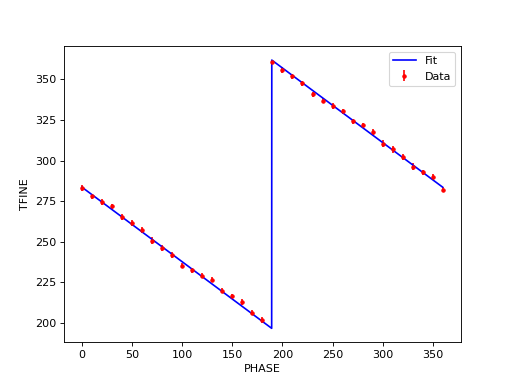

[-82.60225905 189.27690186 279.37049097]


<IPython.core.display.Javascript object>


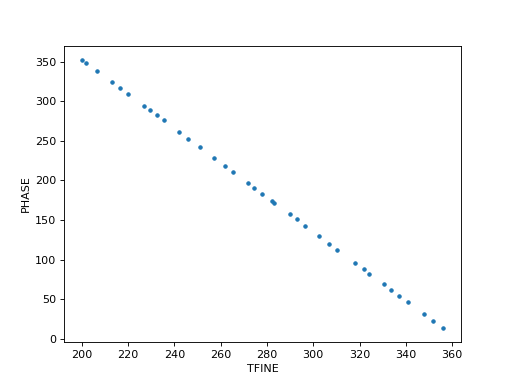

Text(0.5, 0, 'TFINE')

In [14]:
channel = 25
tac     = 0
ASIC = 'asic0'
#data = pd.read_hdf(path + "/data/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data = pd.read_hdf(path + "/data/" + "ASIC" + str(asic) + "_run11285.h5",key='tfine')
data['phase']=data['phase']

gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
print(coeff)

plt.figure()
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')
wp=TPcal.sawtooth_inv_corr(np.arange(200,400,0.01),*coeff)
plt.ylabel("PHASE")
plt.xlabel("TFINE")



# QDC CALIBRATION

# GAUSSIAN FITTING FOR EFINE DATA

<IPython.core.display.Javascript object>


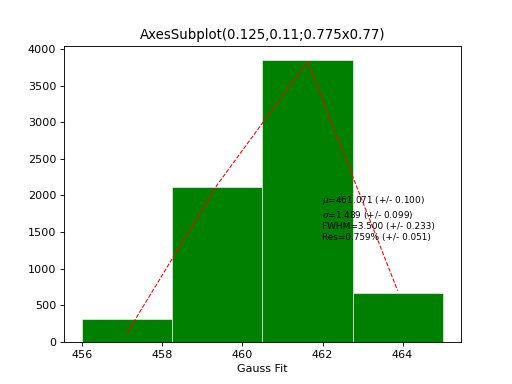

Fitting Problems
2 460.89085928489044
3 inf
4 0.10027988325719227
5 0 120 461.07100061661527 0.10027988325719227
[4.10306095e+03 4.61071001e+02 1.48935826e+00]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


In [33]:
#filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'
filename = path_data + "10897_qdc_ch5_asic0_0v.h5"
channel = 5
tac     = 0
phase   = 120

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] - 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

#coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,7,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

In [34]:
#filename = path + '/data' + '/asic'+str(asic)+'_qdc_tpulse.h5'
asic = 0
filename = path_data + "10897_qdc_ch5_asic0_0v.h5"
#channels = list(range(0,64))
#channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
channels = [5]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] - 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([asic,ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','tpulse','mu','sigma'])

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
5 0 0 0.0 0.0
Fitting Problems
5 0 10 0.0 0.0
Fitting Problems
5 0 20 0.0 0.0
Fitting Problems
5 0 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 40 1.0005702879954377 1.0005702879954377
Fitting Problems
5 0 50 27.37275740524332 0.0014214042907903074
Fitting Problems
5 0 60 88.985488033553 0.014744202319211204
Fitting Problems
5 0 70 175.553978973424 0.11320624488332784
Fitting Problems
5 0 80 238.1960358088773 0.02332131782207515
Fitting Problems
5 0 90 296.42231212019186 0.03004498982943883
Fitting Problems
5 0 100 351.47615984847243 0.04443687175272082
Fitting Problems
5 0 110 406.4500572639638 0.15006773553448133
Fitting Problems
5 0 120 461.0710

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 0 190 721.5508379626921 0.12606563803605753
Fitting Problems
5 0 200 725.2388085248706 0.3659351699664446
Fitting Problems
5 0 210 725.8250420640022 0.04808019700955428
Fitting Problems
5 0 220 726.5310112292036 0.20056465966920323
Fitting Problems
5 0 230 726.5254243489059 0.21455614701596065
Fitting Problems
5 0 240 726.5322184909811 0.08437372571905218
Fitting Problems
5 0 250 727.3359581326682 0.41553928446276067
Fitting Problems
5 0 260 726.3029675852307 0.20712676614974382
Fitting Problems
5 0 270 726.7868396996023 0.028776372215362486
Fitting Problems
5 0 280 726.3545901837952 0.08940472552777642
Fitting Problems
5 0 290 726.7392133898031 0.03245549040268948
Fitting Problems
5 1 0 0.0 0.0
Fitting Problems
5 1 10 0.0 0.0
Fitting Problems
5 1 20 0.0 0.0
Fitting Problems
5 1 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 40 1.0005702066999287 1.0005702066999287
Fitting Problems
5 1 50 26.72175384688518 0.002063992726256986
Fitting Problems
5 1 60 88.3167511268086 0.04139283295265464
Fitting Problems
5 1 70 174.98907037244575 0.06537349388376341


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
5 1 80 238.14934291680777 0.022097111649368343
Fitting Problems
5 1 90 296.29564837662286 0.024439223257586053
Fitting Problems
5 1 100 350.7407591820382 0.00621104519752593
Fitting Problems
5 1 110 406.4013263183509 0.18379909327197588
Fitting Problems
5 1 120 461.46554286327125 0.15621048458864975
Fitting Problems
5 1 130 514.3361144847814 0.018736021025421292
Fitting Problems
5 1 140 563.7998388851454 0.0027986024296681867
Fitting Problems
5 1 150 611.3393389197502 0.309845986936463
Fitting Problems
5 1 160 654.4576384729125 0.11872070025372661
Fitting Problems
5 1 170 688.9066035060537 0.02686370441490628
Fitting Problems
5 1 180 710.6864197342808 0.04622743584016475
Fitting Problems
5 1 190 721.842550435981 0.1946206216947252
Fitting Problems
5 1 200 725.0679149725065 0.5570948846368985
Fitting Problems
5 1 210 725.6841930563693 0.08496995403351283
Fitting Problems
5 1 220 726.4562723615642 0.39200409910240075
Fitting Problems
5 1 230 726.361865152032 0.6876033524

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 1 270 726.62135704353 0.04224479269995361
Fitting Problems
5 1 280 726.1329273505045 0.18044269764935397
Fitting Problems
5 1 290 726.505111277445 0.06590506209184407
Fitting Problems
5 2 0 0.0 0.0
Fitting Problems
5 2 10 0.0 0.0
Fitting Problems
5 2 20 0.0 0.0
Fitting Problems
5 2 30 0.0 0.0
Fitting Problems
5 2 40 1.0 1.0
Fitting Problems
5 2 50 26.847246184695095 0.0001935517840825136
Fitting Problems
5 2 60 87.48857837774054 0.0020173421772751578
Fitting Problems
5 2 70 173.74772401081614 0.0793419344382209
Fitting Problems
5 2 80 237.5732597685185 0.0027094201513806274
Fitting Problems
5 2 90 295.1982138147064 0.01168872099406085
Fitting Problems
5 2 100 349.75276865101756 0.02781364391099123
Fitting Problems
5 2 110 404.5930580280653 0.0003765011902064887
Fitting Problems
5 2 120 459.52568378274134 0.031200525922042345
Fitting Problems
5 2 130 513.0654455238778 0.01010673124306926
Fitting Problems
5 2 140 562.7464994486377 0.044710038305681994
Fitting Problems
5 2 150 609.66972

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 2 200 724.5399401874232 0.1261402615865529
Fitting Problems
5 2 210 725.5353494713804 0.16792475067430618
Fitting Problems
5 2 220 726.403190229567 0.8172614067863612
Fitting Problems
5 2 230 725.8475185595067 0.045926151118945296
Fitting Problems
5 2 240 726.3517980636856 0.28732336596828106
Fitting Problems
5 2 250 726.6698189020613 0.0744739244942012
Fitting Problems
5 2 260 726.4264411847968 0.2090623113928446
Fitting Problems
5 2 270 726.4897815239841 0.08130705132791495
Fitting Problems
5 2 280 725.9347478546946 0.26676049887847186
Fitting Problems
5 2 290 726.5885787394067 0.05444508040497436
Fitting Problems
5 3 0 0.0 0.0
Fitting Problems
5 3 10 0.0 0.0
Fitting Problems
5 3 20 0.0 0.0
Fitting Problems
5 3 30 0.0 0.0
Fitting Problems
5 3 40 0.999001996007984 0.999001996007984
Fitting Problems
5 3 50 25.89391719833523 0.00011634448561459238
Fitting Problems
5 3 60 84.76565542880765 0.022805331404466896
Fitting Problems
5 3 70 171.46196693659613 0.18116422575249597
Fitting Probl

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

In [35]:
storage = pd.HDFStore(path + '/asic'+str(asic)+'_efine_fitted_ch5_10897.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

<IPython.core.display.Javascript object>


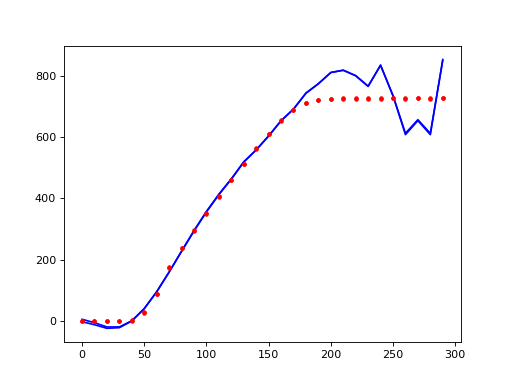

[-2.98469842e+00 -3.97041111e-02 -1.50510673e-01  6.36696944e-03
 -8.07658548e-05  4.79686888e-07 -1.36980797e-09  1.50925114e-12
 -8.08800138e-18 -6.16850437e-19] [ 5.01456486e+00 -8.69158646e-02 -1.62661332e-01  6.72498091e-03
 -8.48999777e-05  5.02875308e-07 -1.43277424e-09  1.57550717e-12
 -8.31368867e-18 -6.02708308e-19]


In [37]:
data = pd.read_hdf(path + '/asic'+str(asic)+'_efine_fitted_ch5_10896.h5',key='efine')
data2 = pd.read_hdf(path + '/asic'+str(asic)+'_efine_fitted_ch5_10897.h5',key='efine')
channel_id = 5
tac_id     = 0
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['channel_id']==9) & (data['tac_id']==0)]
#axis.plot(data_sel['tpulse'],data_sel['mu'])
a = TPcal.QDC_fit_p(data,channel_id,tac_id,plot=True,axis=axis)
b = TPcal.QDC_fit_p(data2,channel_id,tac_id,plot=True,axis=axis)
print(a,b)


In [ ]:
filename = path + '/asic'+str(asic)+'_efine_fitted_run10888.h5'
channels = list(range(0,64))
channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        spl_conf = TPcal.QDC_fit_p(data_tc,ch,tc,plot=False)
        res.append([asic,ch,tc,*spl_conf])

#df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','spl0','spl1','spl2','spl3',
#                                     'spl4','spl5','spl6','spl7','spl8','spl9'])
df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id',
                                     'c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])


In [ ]:
storage = pd.HDFStore(path + '/asic' +str(asic)+'_efine_cal_poly_HIGHGAIN.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [ ]:
filename = path + "/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,49,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [ ]:
filename = path +"/thr_asic0_t2_lsb58_baseline30_49v.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

res=[]

fig, axis = plt.subplots(16,4,figsize=(8,20))

for i in range(16):
    for j in range(4):
        if data[(data['channel_id']==(j+i*4))].size == 0:
            pass
        else:
            sol,fit=TPcal.Tn_fit(data,(j+i*4),thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([(j+i*4),sol,fit.coeff[0],fit.coeff[2]])
            axis[i,j].set_title("CHANNEL " +str(j+i*4))

plt.tight_layout()

df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,0,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [ ]:
storage = pd.HDFStore(path + '/asic0_thresholds_cal_49v.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# TDC COMPARISON

filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_210712_a.h5"
channel = 20
tac     = 0
tpulse  = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]

In [ ]:
filename = path + "/data/" + "tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"
channel = 20
tac = 0

channels = [channel] #channels = range(0,64)
tacs = [tac]         #tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
        print(delays)
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
for tc in tacs:
    df_tfine['phase']=df_tfine['phase']/1000.0
    gb,coeff = TPcal.TDC_fit(df_tfine,channel,tac, plot=True)
    res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
    print(coeff)
